In [56]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from scipy import stats

#functions
import wrangleag as w
import exploreag as exp



warnings.filterwarnings("ignore")

#evaluate
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from statsmodels.formula.api import ols
import sklearn.preprocessing

#feature engineering
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = w.zillow17()

In [3]:
df.head()

id  parcelid  airconditioningtypeid  architecturalstyletypeid  \
0  1087254  10711855                    NaN                       NaN   
1  1072280  10711877                    1.0                       NaN   
2  1340933  10711888                    1.0                       NaN   
3  1878109  10711910                    NaN                       NaN   
4  2190858  10711923                    NaN                       NaN   

   basementsqft  bathroomcnt  bedroomcnt  buildingclasstypeid  \
0           NaN          2.0         3.0                  NaN   
1           NaN          2.0         4.0                  NaN   
2           NaN          2.0         4.0                  NaN   
3           NaN          2.0         3.0                  NaN   
4           NaN          2.0         4.0                  NaN   

   buildingqualitytypeid  calculatedbathnbr  ...  censustractandblock  \
0                    8.0                2.0  ...         6.037113e+13   
1                    8.0                2.0  ...         6.037113e+13   
2                    8.0                2.0  ...         6.037113e+13   
3                    8.0                2.0  ...         6.037113e+13   
4                    8.0                2.0  ...         6.037113e+13   

   logerror  transactiondate  airconditioningdesc  architecturalstyledesc  \
0 -0.007357       2017-07-07                 None                    None   
1  0.021066       2017-08-29              Central                    None   
2  0.077174       2017-04-04              Central                    None   
3 -0.041238       2017-03-17                 None                    None   
4 -0.009496       2017-03-24                 None                    None   

   buildingclassdesc  heatingorsystemdesc        propertylandusedesc  \
0               None              Central  Single Family Residential   
1               None              Central  Single Family Residential   
2               None              Central  Single Family Residential   
3               None              Central  Single Family Residential   
4               None              Central  Single Family Residential   

   storydesc  typeconstructiondesc  
0       None                  None  
1       None                  None  
2       None                  None  
3       None                  None  
4       None                  None  

[5 rows x 68 columns]

In [4]:
df.calculatedfinishedsquarefeet.describe()

count    77374.000000
mean      1784.948497
std        954.265049
min        128.000000
25%       1182.000000
50%       1542.000000
75%       2112.000000
max      35640.000000
Name: calculatedfinishedsquarefeet, dtype: float64

(0.0, 2000.0)

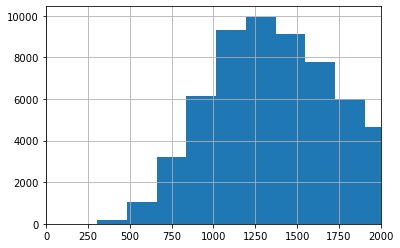

In [8]:
df.calculatedfinishedsquarefeet.hist(bins=200)
plt.xlim(0, 2000)

In [10]:
(df['calculatedfinishedsquarefeet']<350).sum()

12

In [ ]:
(df['calculatedfinishedsquarefeet']<350).sum()


~~31	Commercial/Office/Residential Mixed Used~~

~~46	Multi-Story Store~~

~~47	Store/Office (Mixed Use)~~

~~246	Duplex (2 Units, Any Combination)~~

~~247	Triplex (3 Units, Any Combination)~~

~~248	Quadruplex (4 Units, Any Combination)~~

260	Residential General: 2996

261	Single Family Residential

~~262	Rural Residence~~ NONE

263	Mobile Home

264	Townhouse

265	Cluster Home NULL, count: 186

266	Condominium

~~267	Cooperative~~ count: 12

~~268	Row House~~ NONE

269	Planned Unit Development

~~270	Residential Common Area~~

~~271	Timeshare~~

~~273	Bungalow~~ NONE

~~274	Zero Lot Line~~ NONE

275	Manufactured, Modular, Prefabricated Homes NULL, count:40

~~276	Patio Home~~ NONE

~~279	Inferred Single Family Residential~~

~~290	Vacant Land - General~~

~~291	Residential Vacant Land~~


In [4]:
df = df.set_index("parcelid")

In [5]:
df.head()

id  airconditioningtypeid  architecturalstyletypeid  \
parcelid                                                             
10711855  1087254                    NaN                       NaN   
10711877  1072280                    1.0                       NaN   
10711888  1340933                    1.0                       NaN   
10711910  1878109                    NaN                       NaN   
10711923  2190858                    NaN                       NaN   

          basementsqft  bathroomcnt  bedroomcnt  buildingclasstypeid  \
parcelid                                                               
10711855           NaN          2.0         3.0                  NaN   
10711877           NaN          2.0         4.0                  NaN   
10711888           NaN          2.0         4.0                  NaN   
10711910           NaN          2.0         3.0                  NaN   
10711923           NaN          2.0         4.0                  NaN   

          buildingqualitytypeid  calculatedbathnbr  decktypeid  ...  \
parcelid                                                        ...   
10711855                    8.0                2.0         NaN  ...   
10711877                    8.0                2.0         NaN  ...   
10711888                    8.0                2.0         NaN  ...   
10711910                    8.0                2.0         NaN  ...   
10711923                    8.0                2.0         NaN  ...   

          censustractandblock  logerror  transactiondate  airconditioningdesc  \
parcelid                                                                        
10711855         6.037113e+13 -0.007357       2017-07-07                 None   
10711877         6.037113e+13  0.021066       2017-08-29              Central   
10711888         6.037113e+13  0.077174       2017-04-04              Central   
10711910         6.037113e+13 -0.041238       2017-03-17                 None   
10711923         6.037113e+13 -0.009496       2017-03-24                 None   

          architecturalstyledesc  buildingclassdesc  heatingorsystemdesc  \
parcelid                                                                   
10711855                    None               None              Central   
10711877                    None               None              Central   
10711888                    None               None              Central   
10711910                    None               None              Central   
10711923                    None               None              Central   

                propertylandusedesc  storydesc  typeconstructiondesc  
parcelid                                                              
10711855  Single Family Residential       None                  None  
10711877  Single Family Residential       None                  None  
10711888  Single Family Residential       None                  None  
10711910  Single Family Residential       None                  None  
10711923  Single Family Residential       None                  None  

[5 rows x 67 columns]

In [6]:
df.to_csv(r'~/Codeup/codeup-data-science/zillow_clustering_project/notebooks/zillow.csv')

In [2]:
df = pd.read_csv('zillow.csv')

In [3]:
df.head()

parcelid       id  airconditioningtypeid  architecturalstyletypeid  \
0  10711855  1087254                    NaN                       NaN   
1  10711877  1072280                    1.0                       NaN   
2  10711888  1340933                    1.0                       NaN   
3  10711910  1878109                    NaN                       NaN   
4  10711923  2190858                    NaN                       NaN   

   basementsqft  bathroomcnt  bedroomcnt  buildingclasstypeid  \
0           NaN          2.0         3.0                  NaN   
1           NaN          2.0         4.0                  NaN   
2           NaN          2.0         4.0                  NaN   
3           NaN          2.0         3.0                  NaN   
4           NaN          2.0         4.0                  NaN   

   buildingqualitytypeid  calculatedbathnbr  ...  censustractandblock  \
0                    8.0                2.0  ...         6.037113e+13   
1                    8.0                2.0  ...         6.037113e+13   
2                    8.0                2.0  ...         6.037113e+13   
3                    8.0                2.0  ...         6.037113e+13   
4                    8.0                2.0  ...         6.037113e+13   

   logerror  transactiondate  airconditioningdesc  architecturalstyledesc  \
0 -0.007357       2017-07-07                  NaN                     NaN   
1  0.021066       2017-08-29              Central                     NaN   
2  0.077174       2017-04-04              Central                     NaN   
3 -0.041238       2017-03-17                  NaN                     NaN   
4 -0.009496       2017-03-24                  NaN                     NaN   

   buildingclassdesc  heatingorsystemdesc        propertylandusedesc  \
0                NaN              Central  Single Family Residential   
1                NaN              Central  Single Family Residential   
2                NaN              Central  Single Family Residential   
3                NaN              Central  Single Family Residential   
4                NaN              Central  Single Family Residential   

   storydesc  typeconstructiondesc  
0        NaN                   NaN  
1        NaN                   NaN  
2        NaN                   NaN  
3        NaN                   NaN  
4        NaN                   NaN  

[5 rows x 68 columns]

In [3]:
df.shape

(77574, 68)

In [4]:
single_use = [260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 273, 275, 276, 279]
df = df[df.propertylandusetypeid.isin(single_use)]

In [5]:
df.shape

(74270, 68)

In [6]:
#df = df[(df.bedroomcnt > 0) & (df.bathroomcnt > 0) & ((df.unitcnt<=1)|df.unitcnt.isnull())\
#            & (df.calculatedfinishedsquarefeet>500)]

In [7]:
#df.shape

(73561, 68)

In [6]:
df = df[(df.bedroomcnt > 0) & (df.bathroomcnt > 0) & ((df.unitcnt<=1)|df.unitcnt.isnull())\
            & (df.calculatedfinishedsquarefeet>350)]

In [7]:
df.shape

(73705, 68)

In [8]:
#z = w.drop_based_on_pct(df, .6, .7)

In [9]:
#z.shape

(73705, 34)

In [8]:
df = w.drop_based_on_pct(df, .6, .7)

In [9]:
df.shape

(73705, 34)

In [10]:
df['county'] = np.where(df.fips == 6037, 'Los_Angeles',
                       np.where(df.fips == 6059, 'Orange',
                               'Ventura'))

In [11]:
df.shape

(73705, 35)

In [12]:
df = df.drop(['id',
       'calculatedbathnbr', 'finishedsquarefeet12', 'fullbathcnt', 'heatingorsystemtypeid'
       ,'propertycountylandusecode', 'propertylandusetypeid','propertyzoningdesc',
        'censustractandblock', 'propertylandusedesc', 'heatingorsystemdesc'],axis=1)

In [13]:
df.shape

(73705, 24)

In [14]:
df.rename(columns={"bathroomcnt": "bathrooms", 
                   "bedroomcnt": "bedrooms",
                   "buildingqualitytypeid": "property_quality", 
                   "calculatedfinishedsquarefeet": "sqft",
                   "lotsizesquarefeet": "lot_sqft",
                   "regionidzip": "zip_code",
                   "landtaxvaluedollarcnt": "land_value",
                   "structuretaxvaluedollarcnt": "structure_value",
                   "taxvaluedollarcnt": "home_value",
                   "heatingorsystemdesc": "heating_system",
                  }, inplace=True)

In [15]:
df.shape

(73705, 24)

In [17]:
df.head(2)

parcelid  bathrooms  bedrooms  property_quality    sqft    fips  \
0  10711855        2.0       3.0               8.0  2107.0  6037.0   
1  10711877        2.0       4.0               8.0  1882.0  6037.0   

     latitude    longitude  lot_sqft  rawcensustractandblock  ...  unitcnt  \
0  34222559.0 -118617387.0    9158.0            6.037113e+07  ...      1.0   
1  34220261.0 -118616409.0    9035.0            6.037113e+07  ...      1.0   

   yearbuilt  structure_value  home_value  assessmentyear  land_value  \
0     1972.0         249655.0    624139.0          2016.0    374484.0   
1     1972.0         253000.0    660000.0          2016.0    407000.0   

   taxamount  logerror  transactiondate       county  
0    7659.36 -0.007357       2017-07-07  Los_Angeles  
1    8123.91  0.021066       2017-08-29  Los_Angeles  

[2 rows x 24 columns]

In [18]:
df.isnull().sum()

parcelid                      0
bathrooms                     0
bedrooms                      0
property_quality          26884
sqft                          0
fips                          0
latitude                      0
longitude                     0
lot_sqft                   8121
rawcensustractandblock        0
regionidcity               1437
regionidcounty                0
zip_code                     43
roomcnt                       0
unitcnt                   26570
yearbuilt                    35
structure_value              75
home_value                    1
assessmentyear                0
land_value                    1
taxamount                     5
logerror                      0
transactiondate               0
county                        0
dtype: int64

In [15]:
df[df['unitcnt'].isnull()].T

137          2168   \
parcelid                                    10717985     10794853   
id                                            642531      2385878   
bathrooms                                          3            2   
bedrooms                                           4            2   
property_quality                                   8            7   
calculatedbathnbr                                  3            2   
sqft                                            2478         1050   
finishedsquarefeet12                            2478         1050   
fips                                            6037         6037   
fullbathcnt                                        3            2   
heatingorsystemtypeid                              2            2   
latitude                                 3.42091e+07  3.41835e+07   
longitude                               -1.18658e+08 -1.18596e+08   
lot_sqft                                        9417       134581   
propertycountylandusecode                       0100         010C   
propertylandusetypeid                            261          266   
propertyzoningdesc                            LARE11         LAWC   
rawcensustractandblock                   6.03713e+07  6.03713e+07   
regionidcity                                   12447        12447   
regionidcounty                                  3101         3101   
zip_code                                       96339        96389   
roomcnt                                            0            0   
unitcnt                                          NaN          NaN   
yearbuilt                                       1995         2010   
structure_value                               301711       242340   
taxvaluedollarcnt                             464491       446709   
assessmentyear                                  2016         2016   
land_value                                    162780       204369   
taxamount                                    5801.39      5409.89   
censustractandblock                      6.03713e+13  6.03713e+13   
logerror                                   0.0119136    0.0208822   
transactiondate                           2017-06-30   2017-08-31   
heating_system                               Central      Central   
propertylandusedesc        Single Family Residential  Condominium   
county                                   Los_Angeles  Los_Angeles   

                                 2169         2170         2171         2172   \
parcelid                      10794855     10794876     10794889     10794891   
id                              223477      2520019      2251771      1192913   
bathrooms                            2            2            1            2   
bedrooms                             3            2            1            2   
property_quality                     7            7            7            7   
calculatedbathnbr                    2            2            1            2   
sqft                              1280         1050          640         1060   
finishedsquarefeet12              1280         1050          640         1060   
fips                              6037         6037         6037         6037   
fullbathcnt                          2            2            1            2   
heatingorsystemtypeid                2            2            2            2   
latitude                   3.41835e+07  3.41835e+07  3.41835e+07  3.41835e+07   
longitude                 -1.18596e+08 -1.18596e+08 -1.18596e+08 -1.18596e+08   
lot_sqft                        134581       134581       134581       134581   
propertycountylandusecode         010C         010C         010C         010C   
propertylandusetypeid              266          266          266          266   
propertyzoningdesc                LAWC         LAWC         LAWC         LAWC   
rawcensustractandblock     6.03713e+07  6.03713e+07  6.03713e+07  6.03713e+07   
regionidcity           

In [5]:
df['regionidcounty'].value_counts()

3101.0    50694
1286.0    20630
2061.0     6250
Name: regionidcounty, dtype: int64

In [17]:
df[df['unitcnt'].isnull()]

parcelid  bathrooms  bedrooms  property_quality    sqft    fips  \
137     10717985        3.0       4.0               8.0  2478.0  6037.0   
2168    10794853        2.0       2.0               7.0  1050.0  6037.0   
2169    10794855        2.0       3.0               7.0  1280.0  6037.0   
2170    10794876        2.0       2.0               7.0  1050.0  6037.0   
2171    10794889        1.0       1.0               7.0   640.0  6037.0   
...          ...        ...       ...               ...     ...     ...   
77544   93577187        2.0       2.0               NaN   900.0  6111.0   
77545  162960516        2.5       3.0               NaN  1449.0  6111.0   
77546  162960529        4.0       4.0               NaN  2459.0  6111.0   
77547  162960596        2.0       4.0               NaN  1379.0  6111.0   
77548  162960814        3.0       5.0               NaN  2754.0  6111.0   

         latitude    longitude  lot_sqft  rawcensustractandblock  ...  \
137    34209133.0 -118657791.0    9417.0            6.037134e+07  ...   
2168   34183500.0 -118596000.0  134581.0            6.037135e+07  ...   
2169   34183500.0 -118596000.0  134581.0            6.037135e+07  ...   
2170   34183500.0 -118596000.0  134581.0            6.037135e+07  ...   
2171   34183500.0 -118596000.0  134581.0            6.037135e+07  ...   
...           ...          ...       ...                     ...  ...   
77544  34212400.0 -119027000.0       NaN            6.111006e+07  ...   
77545  34273914.0 -119164501.0    6926.0            6.111001e+07  ...   
77546  34245590.0 -119169692.0    5400.0            6.111005e+07  ...   
77547  34219587.0 -119042663.0    7343.0            6.111006e+07  ...   
77548  34258186.0 -118731299.0    5742.0            6.111008e+07  ...   

       unitcnt  yearbuilt  structure_value  taxvaluedollarcnt  assessmentyear  \
137        NaN     1995.0         301711.0           464491.0          2016.0   
2168       NaN     2010.0         242340.0           446709.0          2016.0   
2169       NaN     2010.0         326268.0           466324.0          2016.0   
2170       NaN     2010.0         242340.0           448740.0          2016.0   
2171       NaN     2010.0         177272.0           253245.0          2016.0   
...        ...        ...              ...                ...             ...   
77544      NaN     2006.0         108211.0           309621.0          2016.0   
77545      NaN     1986.0         288913.0           481521.0          2016.0   
77546      NaN     2007.0         169000.0           479000.0          2016.0   
77547      NaN     1960.0         224567.0           449134.0          2016.0   
77548      NaN     2000.0         292666.0           487774.0          2016.0   

       land_value  taxamount  logerror  transactiondate       county  
137      162780.0    5801.39  0.011914       2017-06-30  Los_Angeles  
2168     204369.0    5409.89  0.020882       2017-08-31  Los_Angeles  
2169     140056.0    5653.42 -0.026507       2017-04-03  Los_Angeles  
2170     206400.0    5434.10  0.048805       2017-03-10  Los_Angeles  
2171      75973.0    3093.68 -0.002248       2017-08-22  Los_Angeles  
...           ...        ...       ...              ...          ...  
77544    201410.0    3280.22  0.018730       2017-03-15      Ventura  
77545    192608.0    5063.30  0.015797       2017-05-08      Ventura  
77546    310000.0   12285.88  0.007117       2017-05-26      Ventura  
77547    224567.0    4787.16  0.032018       2017-07-18      Ventura  
77548    195108.0    5602.90 -0.006995       2017-05-19      Ventura  

[26570 rows x 24 columns]

In [16]:
df[df['unitcnt'].isnull()].propertylandusetypeid.value_counts()

# 261 Single Family Residential
# 266 Condominium
# 265 Cluster Home
# 275 Manufactured, Modular, Prefabricated Homes
# 263 Mobile Home
# 269 Planned Unit Development

# let's change to 1!

261.0    18474
266.0     7714
265.0      335
275.0       35
263.0        7
269.0        5
Name: propertylandusetypeid, dtype: int64

In [16]:
df.unitcnt.fillna(1, inplace = True)

In [17]:
df.shape

(73705, 24)

In [21]:
df.isnull().sum()

parcelid                      0
bathrooms                     0
bedrooms                      0
property_quality          26884
sqft                          0
fips                          0
latitude                      0
longitude                     0
lot_sqft                   8121
rawcensustractandblock        0
regionidcity               1437
regionidcounty                0
zip_code                     43
roomcnt                       0
unitcnt                       0
yearbuilt                    35
structure_value              75
home_value                    1
assessmentyear                0
land_value                    1
taxamount                     5
logerror                      0
transactiondate               0
county                        0
dtype: int64

In [22]:
df.property_quality.value_counts(dropna = False)

NaN     26884
8.0     14488
6.0     12906
4.0      8234
7.0      5917
9.0      2264
5.0      1500
11.0      926
10.0      308
3.0       150
12.0      115
1.0        10
2.0         3
Name: property_quality, dtype: int64

<AxesSubplot:>

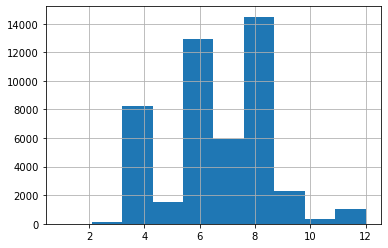

In [23]:
df.property_quality.hist()

In [23]:
df.property_quality.median()

7.0

In [24]:
df.property_quality.mean()

6.635548151470494

In [18]:
df.property_quality.fillna(7.0, inplace = True)

In [19]:
df.shape

(73705, 24)

In [27]:
df.isnull().sum()

parcelid                     0
bathrooms                    0
bedrooms                     0
property_quality             0
sqft                         0
fips                         0
latitude                     0
longitude                    0
lot_sqft                  8121
rawcensustractandblock       0
regionidcity              1437
regionidcounty               0
zip_code                    43
roomcnt                      0
unitcnt                      0
yearbuilt                   35
structure_value             75
home_value                   1
assessmentyear               0
land_value                   1
taxamount                    5
logerror                     0
transactiondate              0
county                       0
dtype: int64

(0.0, 40000.0)

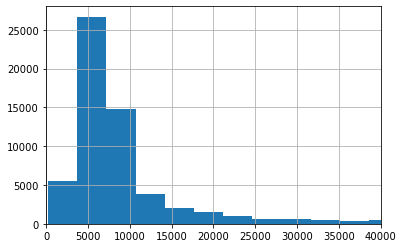

In [35]:
df.lot_sqft.hist(bins=2000)
plt.xlim(0, 40000)

In [28]:
df.lot_sqft.median()

7265.0

In [20]:
df.lot_sqft.fillna(7265, inplace = True)

In [21]:
df.shape

(73705, 24)

In [31]:
df.isnull().sum()

parcelid                     0
bathrooms                    0
bedrooms                     0
property_quality             0
sqft                         0
fips                         0
latitude                     0
longitude                    0
lot_sqft                     0
rawcensustractandblock       0
regionidcity              1437
regionidcounty               0
zip_code                    43
roomcnt                      0
unitcnt                      0
yearbuilt                   35
structure_value             75
home_value                   1
assessmentyear               0
land_value                   1
taxamount                    5
logerror                     0
transactiondate              0
county                       0
dtype: int64

In [42]:
(df.isnull().sum()).sum()

1597

In [47]:
df.regionidcity.value_counts()

12447.0     16345
46298.0      2306
54311.0      1881
5534.0       1872
52650.0      1664
            ...  
118880.0        5
10815.0         4
13311.0         4
21395.0         1
36078.0         1
Name: regionidcity, Length: 175, dtype: int64

In [48]:
(df.regionidcity.value_counts()).sum()

72268

In [49]:
(df.regionidcity.value_counts()).median()

211.0

In [22]:
df = df.dropna()

In [23]:
df.shape

(72153, 24)

## Outliers

<AxesSubplot:xlabel='home_value'>

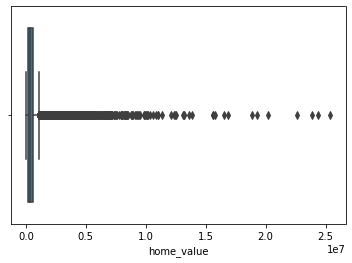

In [34]:
sns.boxplot(x="home_value", data=df)

<AxesSubplot:>

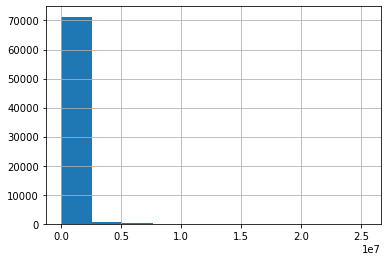

In [28]:
df.home_value.hist()

In [29]:
df.home_value.describe()

count    7.215300e+04
mean     4.868183e+05
std      6.254859e+05
min      3.254000e+03
25%      2.058180e+05
50%      3.568600e+05
75%      5.657670e+05
max      2.538125e+07
Name: home_value, dtype: float64

In [33]:
#(df.home_value > 10_000_000).sum()

31

In [32]:
(df.home_value > 5_000_000).sum()

190

In [34]:
#(df.home_value > 1_100_000).sum()

4858

In [35]:
#(df.home_value > 1_600_000).sum()

2308

In [24]:
#upper_bound, lower_bound = w.outlier(df, "home_value", 1.5)
#upper_bound, lower_bound

(1105690.5, -334105.5)

In [25]:
#upper_bound1, lower_bound1 = w.outlier(df, "home_value", 3)
#upper_bound1, lower_bound1

(1645614.0, -874029.0)

<AxesSubplot:xlabel='home_value'>

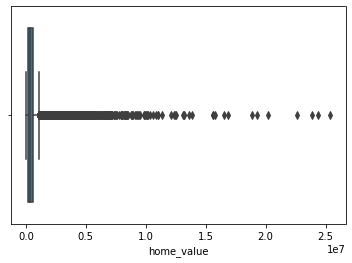

In [61]:
#OG
sns.boxplot(x="home_value", data=df)

<AxesSubplot:xlabel='home_value'>

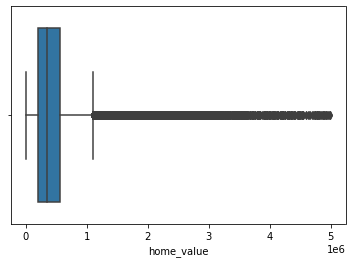

In [60]:
# final cut of outliers
sns.boxplot(x="home_value", data=df[df.home_value < 5000000])

<AxesSubplot:xlabel='home_value'>

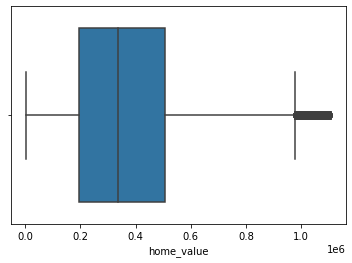

In [26]:
sns.boxplot(x="home_value", data=df[df.home_value < upper_bound])

<AxesSubplot:xlabel='home_value'>

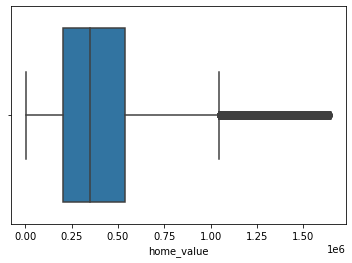

In [27]:
sns.boxplot(x="home_value", data=df[df.home_value < upper_bound1])

<AxesSubplot:xlabel='sqft'>

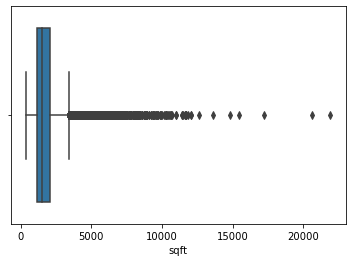

In [62]:
sns.boxplot(x="sqft", data=df)

(3000.0, 22000.0)

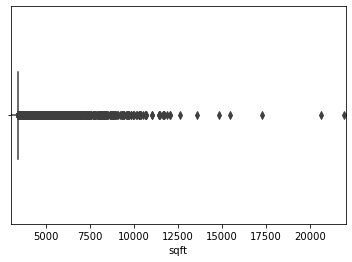

In [65]:
sns.boxplot(x="sqft", data=df)
plt.xlim(3000, 22000)

<AxesSubplot:xlabel='sqft'>

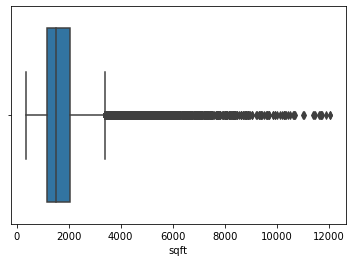

In [68]:
sns.boxplot(x="sqft", data=df[df.sqft < 12500])

<AxesSubplot:xlabel='sqft'>

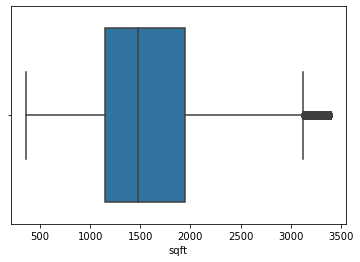

In [64]:
sns.boxplot(x="sqft", data=df[df.sqft < upper_bound2])

In [36]:
upper_bound2, lower_bound2 = w.outlier(df, "sqft", 1.5)
upper_bound2, lower_bound2

(3393.5, -162.5)

In [38]:
upper_bound3, lower_bound3 = w.outlier(df, "sqft", 3)
upper_bound3, lower_bound3

(4727.0, -1496.0)

<AxesSubplot:xlabel='sqft'>

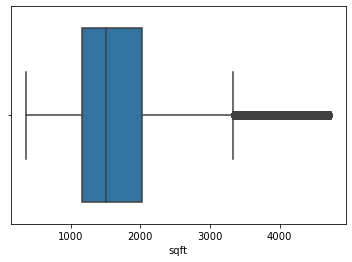

In [66]:
sns.boxplot(x="sqft", data=df[df.sqft < upper_bound3])


In [41]:
df.sqft.describe()

count    72153.000000
mean      1752.089241
std        922.803033
min        360.000000
25%       1171.000000
50%       1517.000000
75%       2060.000000
max      21929.000000
Name: sqft, dtype: float64

In [50]:
(df.sqft > 20000).sum()

2

In [57]:
(df.sqft > 12500).sum()

7

In [58]:
(df.sqft > 10000).sum()

34

In [51]:
(df.sqft > 7500).sum()

129

In [59]:
# outlier m=3
(df.sqft > 4727).sum()

971

In [69]:
df.shape

(72153, 24)

In [71]:
df = df[df.home_value < 5_000_000]

In [72]:
df.shape

(71962, 24)

In [ ]:
df = df[df.calculatedfinishedsquarefeet < 12500]

In [73]:
df.shape

(71962, 24)

In [74]:
df['home_age'] = 2021 - df.yearbuilt

In [75]:
df.head(2)

parcelid  bathrooms  bedrooms  property_quality    sqft    fips  \
0  10711855        2.0       3.0               8.0  2107.0  6037.0   
1  10711877        2.0       4.0               8.0  1882.0  6037.0   

     latitude    longitude  lot_sqft  rawcensustractandblock  ...  yearbuilt  \
0  34222559.0 -118617387.0    9158.0            6.037113e+07  ...     1972.0   
1  34220261.0 -118616409.0    9035.0            6.037113e+07  ...     1972.0   

   structure_value  home_value  assessmentyear  land_value  taxamount  \
0         249655.0    624139.0          2016.0    374484.0    7659.36   
1         253000.0    660000.0          2016.0    407000.0    8123.91   

   logerror  transactiondate       county  home_age  
0 -0.007357       2017-07-07  Los_Angeles      49.0  
1  0.021066       2017-08-29  Los_Angeles      49.0  

[2 rows x 25 columns]

In [76]:
df.shape

(71962, 25)

In [77]:
df['logerror_quartiles'] = pd.qcut(df.logerror, q=4, labels=['q1', 'q2', 'q3', 'q4'])

In [78]:
df.shape

(71962, 26)

# Test out wrangle function

In [2]:
df = w.clean_zillow()

TypeError: clean_zillow() missing 1 required positional argument: 'df'

In [5]:
df.shape

(71818, 25)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71818 entries, 10711855 to 162960814
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   bathrooms               71818 non-null  float64 
 1   bedrooms                71818 non-null  int64   
 2   property_quality        71818 non-null  int64   
 3   sqft                    71818 non-null  float64 
 4   fips                    71818 non-null  int64   
 5   latitude                71818 non-null  float64 
 6   longitude               71818 non-null  float64 
 7   lot_sqft                71818 non-null  float64 
 8   rawcensustractandblock  71818 non-null  float64 
 9   regionidcity            71818 non-null  float64 
 10  regionidcounty          71818 non-null  int64   
 11  zip_code                71818 non-null  int64   
 12  roomcnt                 71818 non-null  int64   
 13  unitcnt                 71818 non-null  int64   
 14  yearbuilt  

In [2]:
df, train, validate, test = w.wrangle_zillow()

In [3]:
train.shape, validate.shape, test.shape

((40217, 23), (17237, 23), (14364, 23))

In [4]:
df.head()

bathrooms  bedrooms  property_quality    sqft  fips    latitude  \
parcelid                                                                    
10711855        2.0         3                 8  2107.0  6037  34222559.0   
10711877        2.0         4                 8  1882.0  6037  34220261.0   
10711888        2.0         4                 8  1882.0  6037  34222491.0   
10711910        2.0         3                 8  1477.0  6037  34221864.0   
10711923        2.0         4                 8  1918.0  6037  34220619.0   

            longitude  lot_sqft  rawcensustractandblock  regionidcity  ...  \
parcelid                                                               ...   
10711855 -118617387.0    9158.0            6.037113e+07       12447.0  ...   
10711877 -118616409.0    9035.0            6.037113e+07       12447.0  ...   
10711888 -118616854.0    9800.0            6.037113e+07       12447.0  ...   
10711910 -118615739.0   11285.0            6.037113e+07       12447.0  ...   
10711923 -118615253.0   11239.0            6.037113e+07       12447.0  ...   

          yearbuilt  structure_value  home_value  land_value  taxamount  \
parcelid                                                                  
10711855       1972         249655.0    624139.0    374484.0    7659.36   
10711877       1972         253000.0    660000.0    407000.0    8123.91   
10711888       1972         257591.0    542923.0    285332.0    6673.24   
10711910       1960          57968.0     78031.0     20063.0    1116.46   
10711923       1960         167869.0    415459.0    247590.0    5239.85   

          logerror  transactiondate       county  home_age logerror_quartiles  
parcelid                                                                       
10711855 -0.007357       2017-07-07  Los_Angeles        49                 q2  
10711877  0.021066       2017-08-29  Los_Angeles        49                 q3  
10711888  0.077174       2017-04-04  Los_Angeles        49                 q4  
10711910 -0.041238       2017-03-17  Los_Angeles        61                 q1  
10711923 -0.009496       2017-03-24  Los_Angeles        61                 q2  

[5 rows x 23 columns]

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40217 entries, 14412168 to 12401020
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   bathrooms               40217 non-null  float64 
 1   bedrooms                40217 non-null  int64   
 2   property_quality        40217 non-null  int64   
 3   sqft                    40217 non-null  float64 
 4   fips                    40217 non-null  int64   
 5   latitude                40217 non-null  float64 
 6   longitude               40217 non-null  float64 
 7   lot_sqft                40217 non-null  float64 
 8   rawcensustractandblock  40217 non-null  float64 
 9   regionidcity            40217 non-null  float64 
 10  zip_code                40217 non-null  int64   
 11  roomcnt                 40217 non-null  int64   
 12  unitcnt                 40217 non-null  int64   
 13  yearbuilt               40217 non-null  int64   
 14  structure_va

In [4]:
train.columns.to_list()

['bathrooms',
 'bedrooms',
 'property_quality',
 'sqft',
 'fips',
 'latitude',
 'longitude',
 'lot_sqft',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'zip_code',
 'roomcnt',
 'unitcnt',
 'yearbuilt',
 'structure_value',
 'taxvaluedollarcnt',
 'assessmentyear',
 'land_value',
 'taxamount',
 'logerror',
 'transactiondate',
 'county',
 'home_age',
 'logerror_quartiles']

In [4]:
def features_target_split(df, target):
    '''
    splits each of the 3 samples into a dataframe with independent variables
    and a series with the dependent, or target variable. 
    The function returns 3 dataframes and 3 series:
    X_train (df) & y_train (series), X_validate & y_validate, X_test & y_test. 
    '''
    # Split with X and y
    X_train = train.drop(columns=[target])
    y_train = train[target]
    X_validate = validate.drop(columns=[target])
    y_validate = validate[target]
    X_test = test.drop(columns=[target])
    y_test = test[target]
    
    return X_train, y_train, X_validate, y_validate, X_test, y_test 

In [5]:
X_train, y_train, X_validate, y_validate, X_test, y_test = features_target_split(df, "logerror")

In [6]:
X_train.shape, y_train.shape, X_validate.shape, y_validate.shape, X_test.shape, y_test.shape

((40217, 22), (40217,), (17237, 22), (17237,), (14364, 22), (14364,))

In [7]:
object_cols = w.get_object_cols(df)
object_cols

['transactiondate', 'county', 'logerror_quartiles']

In [8]:
numeric_cols = w.get_numeric_X_cols(train, object_cols)
numeric_cols

['bathrooms',
 'bedrooms',
 'property_quality',
 'sqft',
 'fips',
 'latitude',
 'longitude',
 'lot_sqft',
 'rawcensustractandblock',
 'regionidcity',
 'zip_code',
 'roomcnt',
 'unitcnt',
 'yearbuilt',
 'structure_value',
 'home_value',
 'land_value',
 'taxamount',
 'logerror',
 'home_age']

In [9]:
numeric_cols = ['bathrooms',
 'bedrooms',
 'property_quality',
 'sqft',
 'fips',
 'latitude',
 'longitude',
 'lot_sqft',
 'rawcensustractandblock',
 'regionidcity',
 'zip_code',
 'roomcnt',
 'unitcnt',
 'yearbuilt',
 'structure_value',
 'home_value',
 'land_value',
 'taxamount',
 'home_age']

In [10]:
def Standard_Scaler(X_train, X_validate, X_test):
    """
    Takes in X_train, X_validate and X_test dfs with numeric values only
    Returns scaler, X_train_scaled, X_validate_scaled, X_test_scaled dfs
    """
    scaler = sklearn.preprocessing.StandardScaler().fit(X_train[numeric_cols])
    
    X_train_scaled = pd.DataFrame(scaler.transform(X_train[numeric_cols]), index = X_train.index, columns = numeric_cols)
    X_validate_scaled = pd.DataFrame(scaler.transform(X_validate[numeric_cols]), index = X_validate.index, columns = numeric_cols)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test[numeric_cols]), index = X_test.index, columns = numeric_cols)
                                 
    return scaler, X_train_scaled, X_validate_scaled, X_test_scaled

In [17]:
def Robust_Scaler(X_train, X_validate, X_test):
    """
    Takes in X_train, X_validate and X_test dfs with numeric values only
    Returns scaler, X_train_scaled, X_validate_scaled, X_test_scaled dfs
    """
    scaler = sklearn.preprocessing.RobustScaler().fit(X_train[numeric_cols])
    
    X_train_scaled = pd.DataFrame(scaler.transform(X_train[numeric_cols]), index = X_train.index, columns = numeric_cols)
    X_validate_scaled = pd.DataFrame(scaler.transform(X_validate[numeric_cols]), index = X_validate.index, columns = numeric_cols)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test[numeric_cols]), index = X_test.index, columns = numeric_cols)
                                 
    return scaler, X_train_scaled, X_validate_scaled, X_test_scaled

In [11]:
scaler, X_train_scaled, X_validate_scaled, X_test_scaled = Standard_Scaler(X_train, X_validate, X_test)

In [18]:
scaler, X_train_scaled, X_validate_scaled, X_test_scaled = Robust_Scaler(X_train, X_validate, X_test)

In [12]:
X_train_scaled.shape, X_validate_scaled.shape, X_test_scaled.shape

((40217, 19), (17237, 19), (14364, 19))

In [13]:
# Create a list of variables to loop through visualizing & testing.
binary_vars = []
categorical_vars = ['transactiondate', 'county']

quant_vars = ['bathrooms',
 'bedrooms',
 'property_quality',
 'sqft',
 'fips',
 'latitude',
 'longitude',
 'lot_sqft',
 'rawcensustractandblock',
 'regionidcity',
 'zip_code',
 'roomcnt',
 'unitcnt',
 'yearbuilt',
 'structure_value',
 'home_value',
 'land_value',
 'taxamount',
 'home_age']
categorical_target = 'logerror_quartiles'
continuous_target = 'logerror'

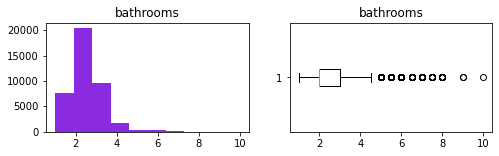

count    40217.000000
mean         2.275170
std          0.915119
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: bathrooms, dtype: float64


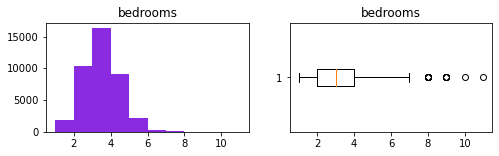

count    40217.000000
mean         3.018947
std          0.995184
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64


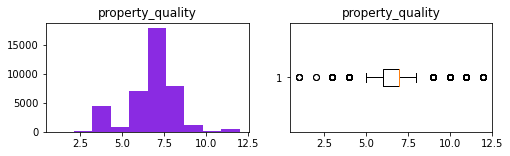

count    40217.000000
mean         6.757341
std          1.343420
min          1.000000
25%          6.000000
50%          7.000000
75%          7.000000
max         12.000000
Name: property_quality, dtype: float64


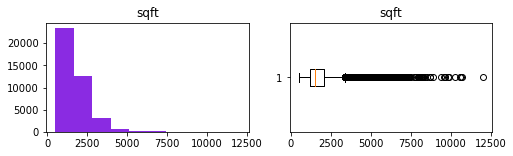

count    40217.000000
mean      1741.929930
std        871.555272
min        501.000000
25%       1175.000000
50%       1520.000000
75%       2056.000000
max      12039.000000
Name: sqft, dtype: float64


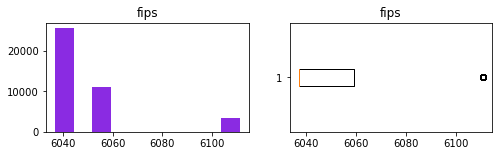

count    40217.000000
mean      6049.409677
std         21.160898
min       6037.000000
25%       6037.000000
50%       6037.000000
75%       6059.000000
max       6111.000000
Name: fips, dtype: float64


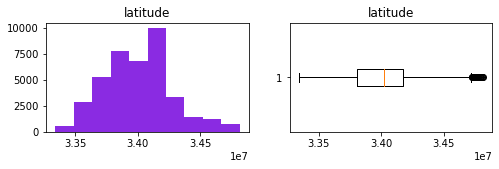

count    4.021700e+04
mean     3.400659e+07
std      2.676633e+05
min      3.333953e+07
25%      3.380933e+07
50%      3.401992e+07
75%      3.417680e+07
max      3.481877e+07
Name: latitude, dtype: float64


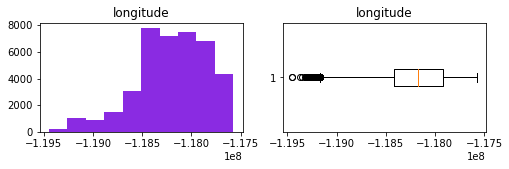

count    4.021700e+04
mean    -1.182006e+08
std      3.649757e+05
min     -1.194484e+08
25%     -1.184185e+08
50%     -1.181688e+08
75%     -1.179180e+08
max     -1.175724e+08
Name: longitude, dtype: float64


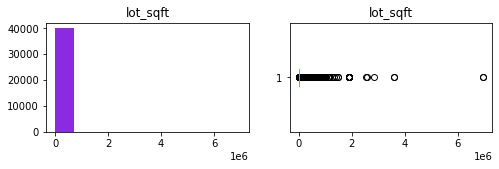

count    4.021700e+04
mean     2.722022e+04
std      1.040614e+05
min      2.360000e+02
25%      5.982000e+03
50%      7.265000e+03
75%      1.061000e+04
max      6.971010e+06
Name: lot_sqft, dtype: float64


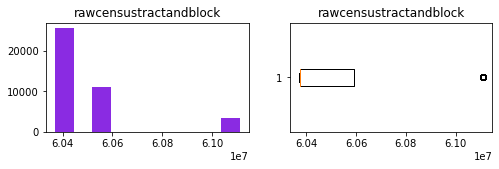

count    4.021700e+04
mean     6.049712e+07
std      2.100283e+05
min      6.037101e+07
25%      6.037400e+07
50%      6.037621e+07
75%      6.059052e+07
max      6.111009e+07
Name: rawcensustractandblock, dtype: float64


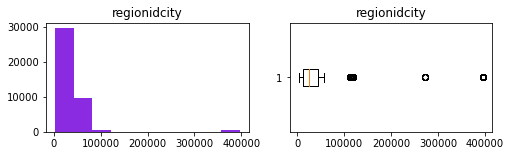

count     40217.000000
mean      33486.285153
std       46013.356420
min        3491.000000
25%       12447.000000
50%       25218.000000
75%       45457.000000
max      396556.000000
Name: regionidcity, dtype: float64


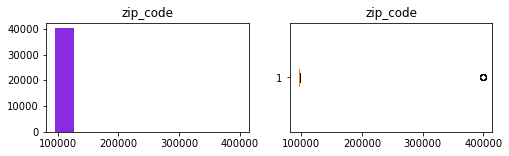

count     40217.000000
mean      96609.404879
std        4019.904032
min       95982.000000
25%       96208.000000
50%       96403.000000
75%       96989.000000
max      399675.000000
Name: zip_code, dtype: float64


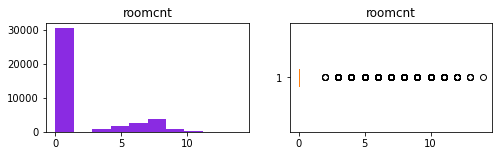

count    40217.000000
mean         1.566726
std          2.887112
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         14.000000
Name: roomcnt, dtype: float64


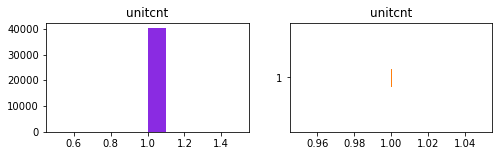

count    40217.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: unitcnt, dtype: float64


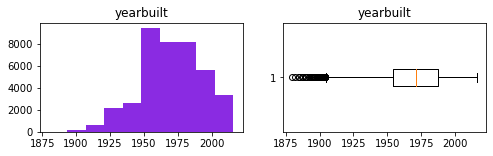

count    40217.000000
mean      1969.605540
std         22.896358
min       1880.000000
25%       1954.000000
50%       1971.000000
75%       1987.000000
max       2016.000000
Name: yearbuilt, dtype: float64


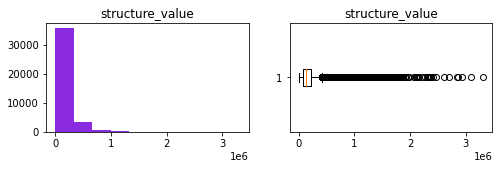

count    4.021700e+04
mean     1.824453e+05
std      1.803248e+05
min      4.400000e+01
25%      8.455700e+04
50%      1.357970e+05
75%      2.147000e+05
max      3.316500e+06
Name: structure_value, dtype: float64


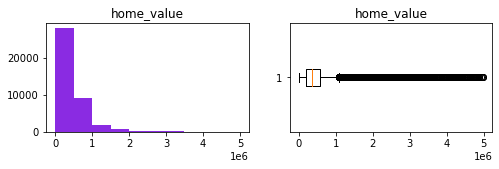

count    4.021700e+04
mean     4.678602e+05
std      4.604321e+05
min      3.254000e+03
25%      2.065220e+05
50%      3.557580e+05
75%      5.640000e+05
max      4.993132e+06
Name: home_value, dtype: float64


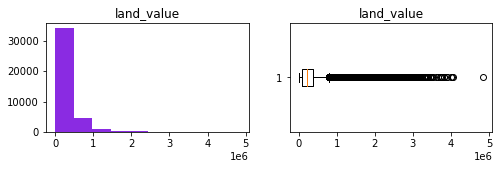

count    4.021700e+04
mean     2.854149e+05
std      3.288270e+05
min      1.610000e+02
25%      8.389100e+04
50%      2.030500e+05
75%      3.648620e+05
max      4.847224e+06
Name: land_value, dtype: float64


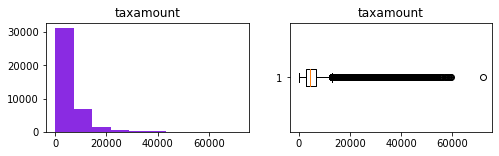

count    40217.000000
mean      5710.821932
std       5340.768100
min         19.920000
25%       2698.650000
50%       4399.440000
75%       6805.940000
max      72122.200000
Name: taxamount, dtype: float64


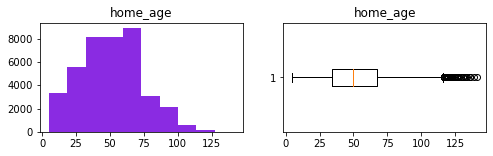

count    40217.000000
mean        51.394460
std         22.896358
min          5.000000
25%         34.000000
50%         50.000000
75%         67.000000
max        141.000000
Name: home_age, dtype: float64


In [20]:
#Standard Scaler
exp.explore_univariate(train, binary_vars, quant_vars)

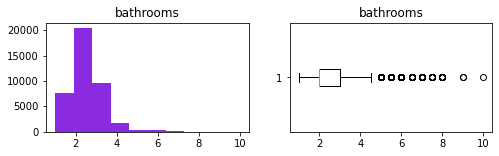

count    40217.000000
mean         2.275170
std          0.915119
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: bathrooms, dtype: float64


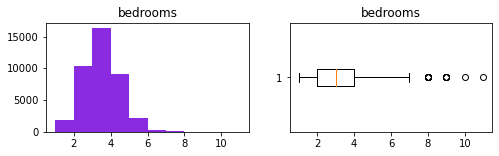

count    40217.000000
mean         3.018947
std          0.995184
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64


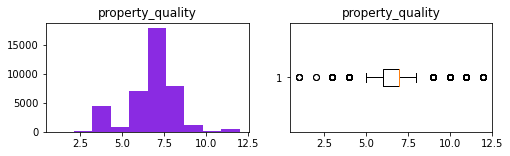

count    40217.000000
mean         6.757341
std          1.343420
min          1.000000
25%          6.000000
50%          7.000000
75%          7.000000
max         12.000000
Name: property_quality, dtype: float64


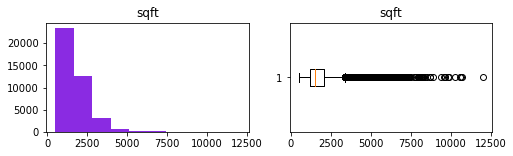

count    40217.000000
mean      1741.929930
std        871.555272
min        501.000000
25%       1175.000000
50%       1520.000000
75%       2056.000000
max      12039.000000
Name: sqft, dtype: float64


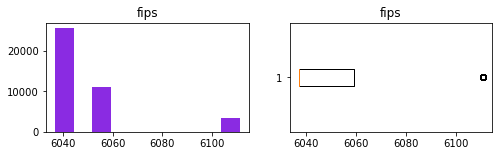

count    40217.000000
mean      6049.409677
std         21.160898
min       6037.000000
25%       6037.000000
50%       6037.000000
75%       6059.000000
max       6111.000000
Name: fips, dtype: float64


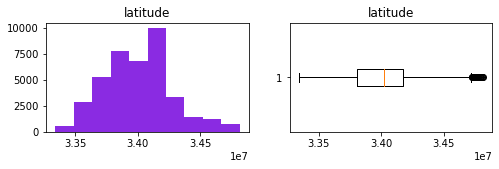

count    4.021700e+04
mean     3.400659e+07
std      2.676633e+05
min      3.333953e+07
25%      3.380933e+07
50%      3.401992e+07
75%      3.417680e+07
max      3.481877e+07
Name: latitude, dtype: float64


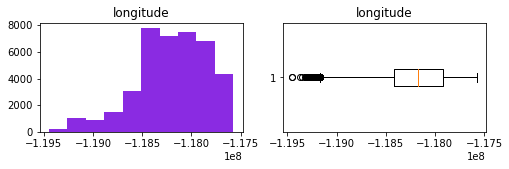

count    4.021700e+04
mean    -1.182006e+08
std      3.649757e+05
min     -1.194484e+08
25%     -1.184185e+08
50%     -1.181688e+08
75%     -1.179180e+08
max     -1.175724e+08
Name: longitude, dtype: float64


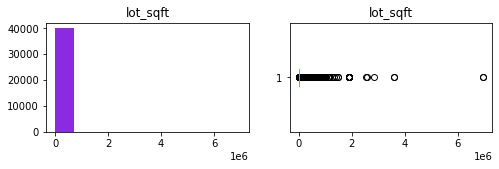

count    4.021700e+04
mean     2.722022e+04
std      1.040614e+05
min      2.360000e+02
25%      5.982000e+03
50%      7.265000e+03
75%      1.061000e+04
max      6.971010e+06
Name: lot_sqft, dtype: float64


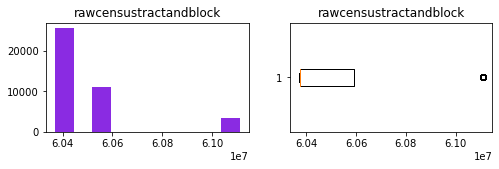

count    4.021700e+04
mean     6.049712e+07
std      2.100283e+05
min      6.037101e+07
25%      6.037400e+07
50%      6.037621e+07
75%      6.059052e+07
max      6.111009e+07
Name: rawcensustractandblock, dtype: float64


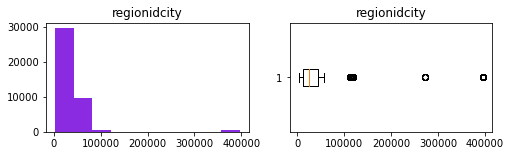

count     40217.000000
mean      33486.285153
std       46013.356420
min        3491.000000
25%       12447.000000
50%       25218.000000
75%       45457.000000
max      396556.000000
Name: regionidcity, dtype: float64


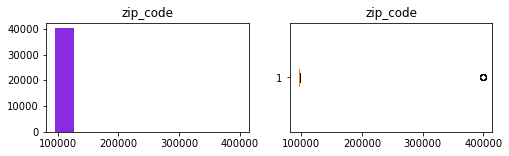

count     40217.000000
mean      96609.404879
std        4019.904032
min       95982.000000
25%       96208.000000
50%       96403.000000
75%       96989.000000
max      399675.000000
Name: zip_code, dtype: float64


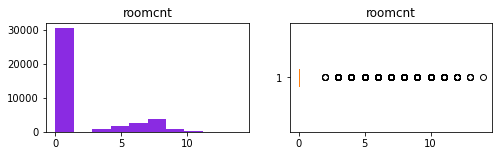

count    40217.000000
mean         1.566726
std          2.887112
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         14.000000
Name: roomcnt, dtype: float64


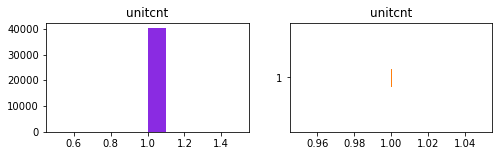

count    40217.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: unitcnt, dtype: float64


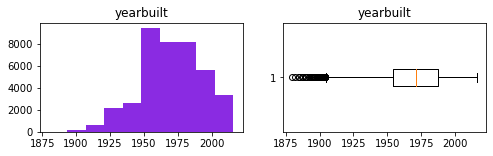

count    40217.000000
mean      1969.605540
std         22.896358
min       1880.000000
25%       1954.000000
50%       1971.000000
75%       1987.000000
max       2016.000000
Name: yearbuilt, dtype: float64


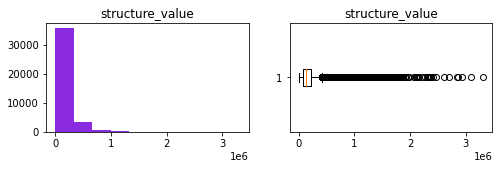

count    4.021700e+04
mean     1.824453e+05
std      1.803248e+05
min      4.400000e+01
25%      8.455700e+04
50%      1.357970e+05
75%      2.147000e+05
max      3.316500e+06
Name: structure_value, dtype: float64


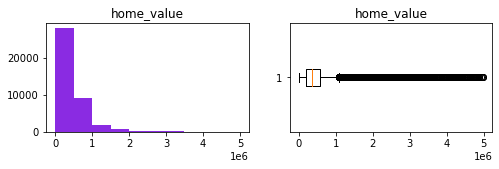

count    4.021700e+04
mean     4.678602e+05
std      4.604321e+05
min      3.254000e+03
25%      2.065220e+05
50%      3.557580e+05
75%      5.640000e+05
max      4.993132e+06
Name: home_value, dtype: float64


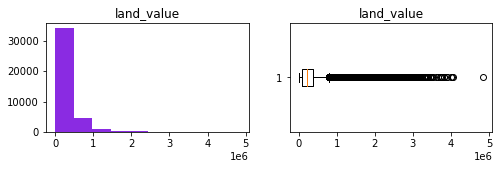

count    4.021700e+04
mean     2.854149e+05
std      3.288270e+05
min      1.610000e+02
25%      8.389100e+04
50%      2.030500e+05
75%      3.648620e+05
max      4.847224e+06
Name: land_value, dtype: float64


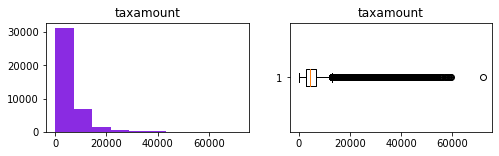

count    40217.000000
mean      5710.821932
std       5340.768100
min         19.920000
25%       2698.650000
50%       4399.440000
75%       6805.940000
max      72122.200000
Name: taxamount, dtype: float64


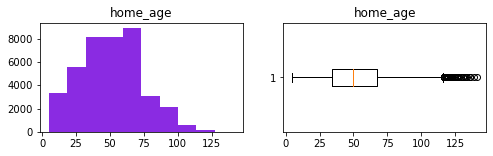

count    40217.000000
mean        51.394460
std         22.896358
min          5.000000
25%         34.000000
50%         50.000000
75%         67.000000
max        141.000000
Name: home_age, dtype: float64


In [16]:
#ROBUST Scaler
exp.explore_univariate(train, binary_vars, quant_vars)

bathrooms 
____________________



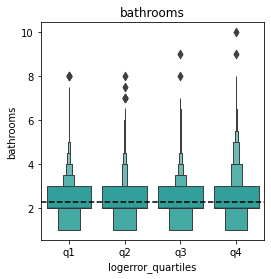

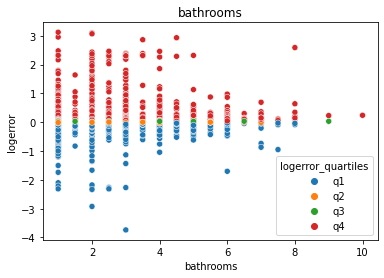

logerror_quartiles            q1            q2            q3           q4
count               10163.000000  10051.000000  10013.000000  9990.000000
mean                    2.170422      2.259875      2.298512     2.373724
std                     0.893008      0.822338      0.854224     1.061548
min                     1.000000      1.000000      1.000000     1.000000
25%                     2.000000      2.000000      2.000000     2.000000
50%                     2.000000      2.000000      2.000000     2.000000
75%                     3.000000      3.000000      3.000000     3.000000
max                     8.000000      8.000000      9.000000    10.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.06673338207840891, pvalue=6.266119567138522e-41)

____________________

bedrooms 
____________________



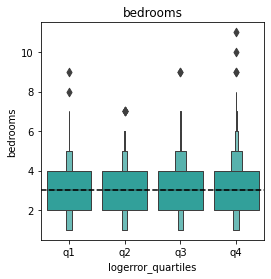

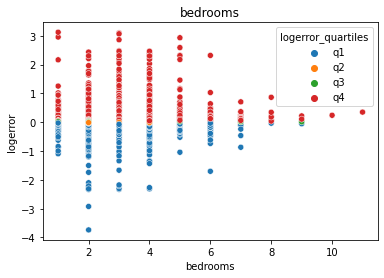

logerror_quartiles            q1            q2            q3           q4
count               10163.000000  10051.000000  10013.000000  9990.000000
mean                    2.932697      3.004079      3.037052     3.103504
std                     0.966877      0.948045      0.981208     1.073203
min                     1.000000      1.000000      1.000000     1.000000
25%                     2.000000      2.000000      2.000000     2.000000
50%                     3.000000      3.000000      3.000000     3.000000
75%                     4.000000      4.000000      4.000000     4.000000
max                     9.000000      7.000000      9.000000    11.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.055904310883562056, pvalue=3.2683767812594527e-29)

____________________

property_quality 
____________________



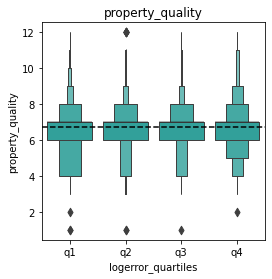

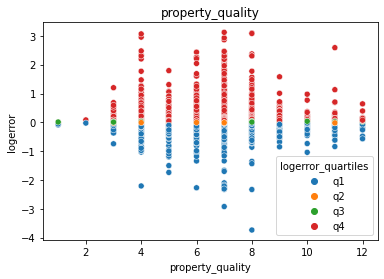

logerror_quartiles            q1            q2            q3           q4
count               10163.000000  10051.000000  10013.000000  9990.000000
mean                    6.672046      6.794747      6.810147     6.753554
std                     1.419628      1.242272      1.260992     1.434499
min                     1.000000      1.000000      1.000000     2.000000
25%                     6.000000      6.000000      6.000000     6.000000
50%                     7.000000      7.000000      7.000000     7.000000
75%                     7.000000      7.000000      7.000000     7.000000
max                    12.000000     12.000000     12.000000    12.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.01677093511778174, pvalue=0.0007698734676090994)

____________________

sqft 
____________________



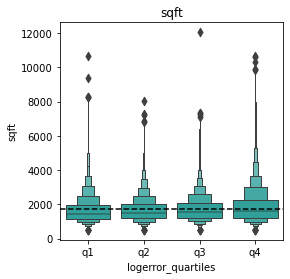

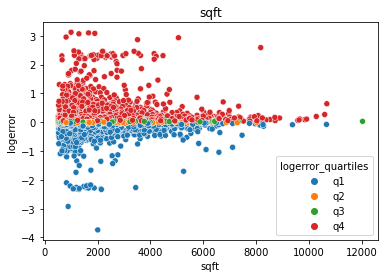

logerror_quartiles            q1            q2            q3            q4
count               10163.000000  10051.000000  10013.000000   9990.000000
mean                 1663.380891   1679.959507   1733.371417   1892.766266
std                   829.096554    754.952529    790.454458   1061.244566
min                   501.000000    501.000000    504.000000    504.000000
25%                  1135.000000   1175.000000   1196.000000   1202.000000
50%                  1450.000000   1500.000000   1546.000000   1593.000000
75%                  1933.000000   1997.000000   2062.000000   2279.750000
max                 10671.000000   8021.000000  12039.000000  10686.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.07909512992996794, pvalue=7.887655447957083e-57)

____________________

fips 
____________________



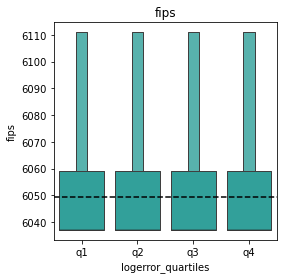

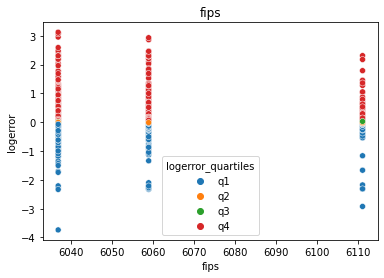

logerror_quartiles            q1            q2            q3           q4
count               10163.000000  10051.000000  10013.000000  9990.000000
mean                 6047.804093   6050.829072   6050.148906  6048.874074
std                    20.311230     21.799480     21.186007    21.204111
min                  6037.000000   6037.000000   6037.000000  6037.000000
25%                  6037.000000   6037.000000   6037.000000  6037.000000
50%                  6037.000000   6037.000000   6037.000000  6037.000000
75%                  6059.000000   6059.000000   6059.000000  6059.000000
max                  6111.000000   6111.000000   6111.000000  6111.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.017240091369801053, pvalue=0.0005451963668865634)

____________________

latitude 
____________________



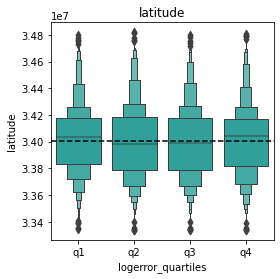

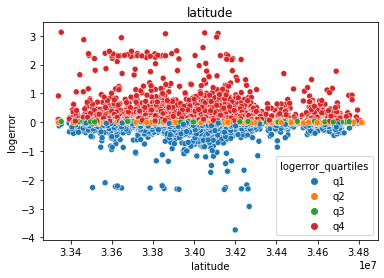

logerror_quartiles            q1            q2            q3            q4
count               1.016300e+04  1.005100e+04  1.001300e+04  9.990000e+03
mean                3.401898e+07  3.400133e+07  3.399557e+07  3.401034e+07
std                 2.579385e+05  2.806781e+05  2.711094e+05  2.598157e+05
min                 3.334429e+07  3.333953e+07  3.334062e+07  3.333983e+07
25%                 3.383377e+07  3.379082e+07  3.379123e+07  3.382053e+07
50%                 3.403459e+07  3.398690e+07  3.399025e+07  3.404188e+07
75%                 3.417671e+07  3.418573e+07  3.417554e+07  3.417166e+07
max                 3.479686e+07  3.481877e+07  3.479581e+07  3.480696e+07 


Spearman's Correlation Test:
 SpearmanrResult(correlation=-0.0079499097117483, pvalue=0.11087678924626355)

____________________

longitude 
____________________



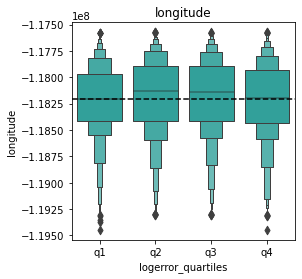

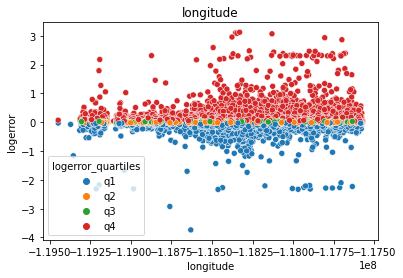

logerror_quartiles            q1            q2            q3            q4
count               1.016300e+04  1.005100e+04  1.001300e+04  9.990000e+03
mean               -1.182214e+08 -1.181797e+08 -1.181824e+08 -1.182187e+08
std                 3.420108e+05  3.779326e+05  3.716617e+05  3.655174e+05
min                -1.194479e+08 -1.193049e+08 -1.193048e+08 -1.194484e+08
25%                -1.184139e+08 -1.184130e+08 -1.184137e+08 -1.184292e+08
50%                -1.182028e+08 -1.181283e+08 -1.181426e+08 -1.181917e+08
75%                -1.179701e+08 -1.178910e+08 -1.178910e+08 -1.179343e+08
max                -1.175765e+08 -1.175724e+08 -1.175734e+08 -1.175728e+08 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.00867058386934224, pvalue=0.08207120869819703)

____________________

lot_sqft 
____________________



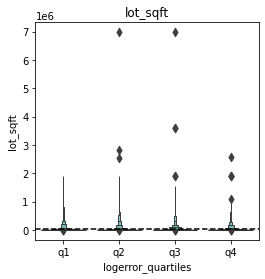

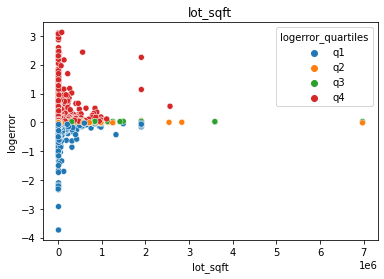

logerror_quartiles            q1            q2            q3            q4
count               1.016300e+04  1.005100e+04  1.001300e+04  9.990000e+03
mean                2.724292e+04  2.757390e+04  2.841502e+04  2.564374e+04
std                 8.799871e+04  1.164356e+05  1.215664e+05  8.522105e+04
min                 2.360000e+02  4.800000e+02  4.350000e+02  4.350000e+02
25%                 6.000000e+03  5.913000e+03  5.911000e+03  5.997000e+03
50%                 7.265000e+03  7.265000e+03  7.265000e+03  7.265000e+03
75%                 1.090900e+04  9.727500e+03  1.012700e+04  1.200000e+04
max                 1.904165e+06  6.971010e+06  6.971010e+06  2.562259e+06 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.006670234286665326, pvalue=0.18101581884020737)

____________________

rawcensustractandblock 
____________________



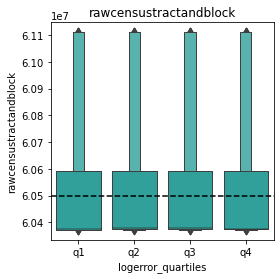

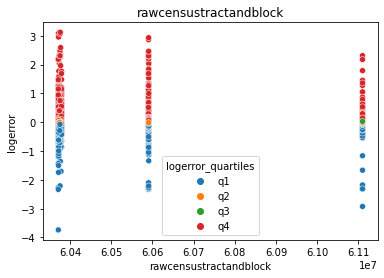

logerror_quartiles            q1            q2            q3            q4
count               1.016300e+04  1.005100e+04  1.001300e+04  9.990000e+03
mean                6.048119e+07  6.051128e+07  6.050444e+07  6.049176e+07
std                 2.016178e+05  2.163115e+05  2.102357e+05  2.105287e+05
min                 6.037101e+07  6.037101e+07  6.037101e+07  6.037101e+07
25%                 6.037276e+07  6.037405e+07  6.037403e+07  6.037300e+07
50%                 6.037574e+07  6.037900e+07  6.037671e+07  6.037577e+07
75%                 6.059042e+07  6.059053e+07  6.059052e+07  6.059042e+07
max                 6.111009e+07  6.111009e+07  6.111009e+07  6.111009e+07 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.008946983252136895, pvalue=0.07277742890410707)

____________________

regionidcity 
____________________



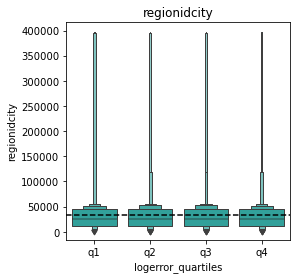

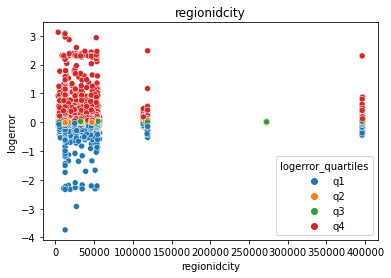

logerror_quartiles             q1             q2             q3             q4
count                10163.000000   10051.000000   10013.000000    9990.000000
mean                 34467.983666   33025.526017   33398.838210   33038.807107
std                  51405.110997   43041.551886   44483.529352   44577.378488
min                   3491.000000    3491.000000    3491.000000    3491.000000
25%                  12447.000000   12447.000000   12447.000000   12447.000000
50%                  24832.000000   25458.000000   25218.000000   25218.000000
75%                  45457.000000   44833.000000   45457.000000   45457.000000
max                 396556.000000  396556.000000  396556.000000  396556.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.007689189898252936, pvalue=0.12307879714280608)

____________________

zip_code 
____________________



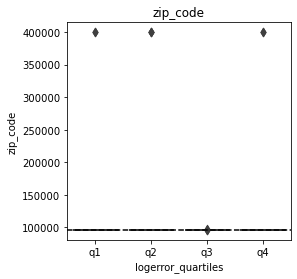

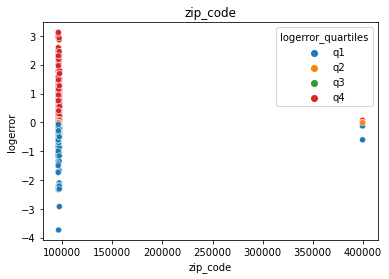

logerror_quartiles             q1             q2            q3             q4
count                10163.000000   10051.000000  10013.000000    9990.000000
mean                 96571.089147   96692.733658  96581.879257   96592.135536
std                   4272.998559    5251.630828    405.941171    4308.321793
min                  95982.000000   95982.000000  95982.000000   95982.000000
25%                  96166.000000   96236.000000  96229.000000   96193.000000
50%                  96374.000000   96464.000000  96436.000000   96385.000000
75%                  96978.000000   96998.000000  96993.000000   96982.000000
max                 399675.000000  399675.000000  97344.000000  399675.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.020449759392420566, pvalue=4.107782639685135e-05)

____________________

roomcnt 
____________________



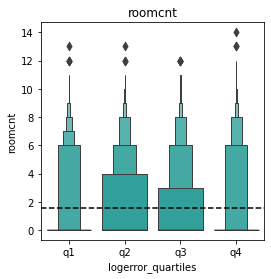

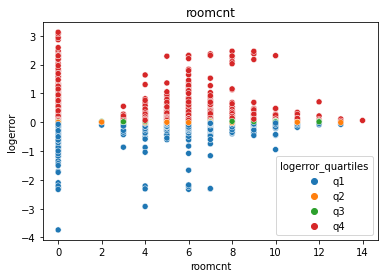

logerror_quartiles            q1            q2            q3           q4
count               10163.000000  10051.000000  10013.000000  9990.000000
mean                    1.400079      1.650284      1.653051     1.565666
std                     2.751166      2.936708      2.948633     2.902501
min                     0.000000      0.000000      0.000000     0.000000
25%                     0.000000      0.000000      0.000000     0.000000
50%                     0.000000      0.000000      0.000000     0.000000
75%                     0.000000      4.000000      3.000000     0.000000
max                    13.000000     13.000000     12.000000    14.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.019332840300300032, pvalue=0.00010562913443466072)

____________________

unitcnt 
____________________



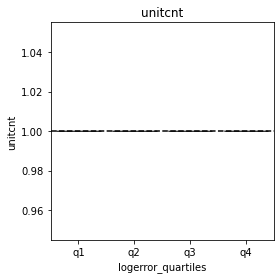

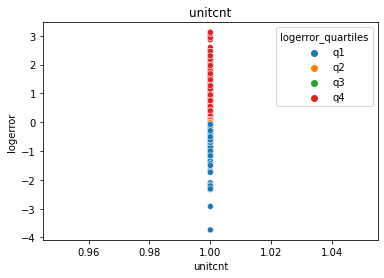

logerror_quartiles       q1       q2       q3      q4
count               10163.0  10051.0  10013.0  9990.0
mean                    1.0      1.0      1.0     1.0
std                     0.0      0.0      0.0     0.0
min                     1.0      1.0      1.0     1.0
25%                     1.0      1.0      1.0     1.0
50%                     1.0      1.0      1.0     1.0
75%                     1.0      1.0      1.0     1.0
max                     1.0      1.0      1.0     1.0 


Spearman's Correlation Test:
 SpearmanrResult(correlation=nan, pvalue=nan)

____________________

yearbuilt 
____________________



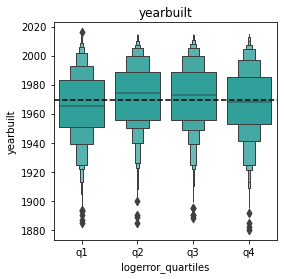

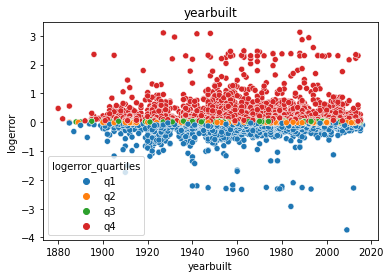

logerror_quartiles            q1            q2            q3           q4
count               10163.000000  10051.000000  10013.000000  9990.000000
mean                 1965.694972   1972.836036   1972.416758  1967.515916
std                    23.258743     21.560305     22.087398    23.775393
min                  1885.000000   1885.000000   1888.000000  1880.000000
25%                  1951.000000   1956.000000   1956.000000  1953.000000
50%                  1965.000000   1974.000000   1973.000000  1968.000000
75%                  1983.000000   1989.000000   1989.000000  1985.000000
max                  2016.000000   2015.000000   2015.000000  2015.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.029921899579794357, pvalue=1.9520473451788685e-09)

____________________

structure_value 
____________________



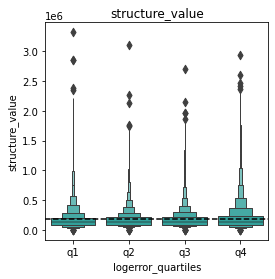

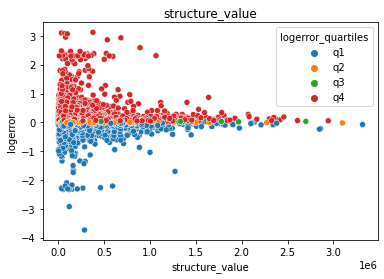

logerror_quartiles            q1            q2            q3            q4
count               1.016300e+04  1.005100e+04  1.001300e+04  9.990000e+03
mean                1.731508e+05  1.740084e+05  1.809504e+05  2.018876e+05
std                 1.770824e+05  1.465156e+05  1.602233e+05  2.261525e+05
min                 4.400000e+01  1.810000e+02  1.015000e+03  1.320000e+02
25%                 7.951350e+04  9.006200e+04  8.921100e+04  7.992075e+04
50%                 1.280700e+05  1.384940e+05  1.411240e+05  1.354415e+05
75%                 2.023165e+05  2.102060e+05  2.182420e+05  2.316088e+05
max                 3.316500e+06  3.097672e+06  2.698828e+06  2.943209e+06 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.03073596965649902, pvalue=7.043393436554154e-10)

____________________

home_value 
____________________



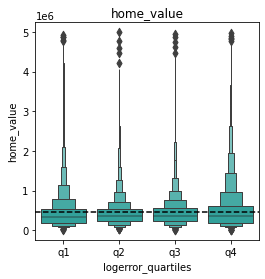

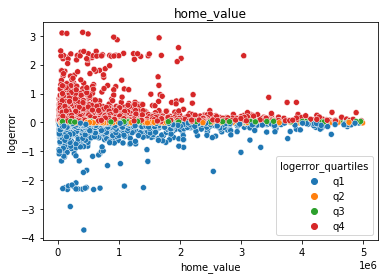

logerror_quartiles            q1            q2            q3            q4
count               1.016300e+04  1.005100e+04  1.001300e+04  9.990000e+03
mean                4.590893e+05  4.392099e+05  4.544521e+05  5.190472e+05
std                 4.789855e+05  3.673792e+05  4.031498e+05  5.636558e+05
min                 1.382000e+04  1.961600e+04  1.050400e+04  3.254000e+03
25%                 1.919490e+05  2.233615e+05  2.208150e+05  1.883318e+05
50%                 3.380000e+05  3.641000e+05  3.690050e+05  3.500310e+05
75%                 5.411270e+05  5.436520e+05  5.630000e+05  6.209435e+05
max                 4.932794e+06  4.993132e+06  4.961367e+06  4.973709e+06 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.021972277560047798, pvalue=1.0493107880573382e-05)

____________________

land_value 
____________________



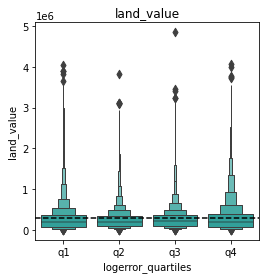

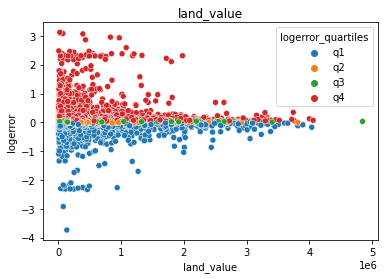

logerror_quartiles            q1            q2            q3            q4
count               1.016300e+04  1.005100e+04  1.001300e+04  9.990000e+03
mean                2.859385e+05  2.652015e+05  2.735017e+05  3.171597e+05
std                 3.507248e+05  2.661128e+05  2.876959e+05  3.929572e+05
min                 1.196000e+03  4.747000e+03  3.906000e+03  1.610000e+02
25%                 7.502000e+04  9.514800e+04  9.100000e+04  7.418500e+04
50%                 1.935310e+05  2.081260e+05  2.088580e+05  1.987185e+05
75%                 3.562370e+05  3.518215e+05  3.620000e+05  3.999500e+05
max                 4.038200e+06  3.817340e+06  4.847224e+06  4.061000e+06 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.012391072633872948, pvalue=0.012957118100605536)

____________________

taxamount 
____________________



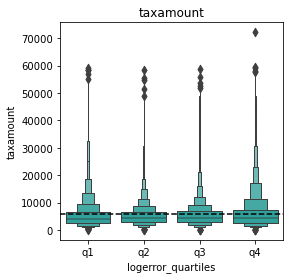

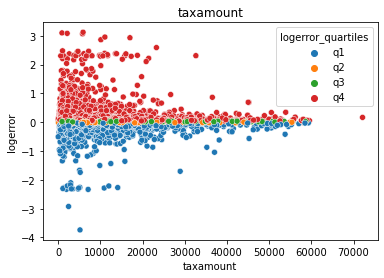

logerror_quartiles            q1            q2            q3            q4
count               10163.000000  10051.000000  10013.000000   9990.000000
mean                 5602.021070   5384.961915   5569.203681   6291.300986
std                  5534.607759   4253.355957   4723.400044   6529.615560
min                    19.920000     51.260000     61.820000     49.180000
25%                  2555.075000   2899.890000   2845.700000   2477.625000
50%                  4178.840000   4501.080000   4538.950000   4323.685000
75%                  6564.450000   6558.930000   6825.660000   7445.992500
max                 59284.110000  58207.140000  58634.770000  72122.200000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.02052236745205755, pvalue=3.856759855655328e-05)

____________________

home_age 
____________________



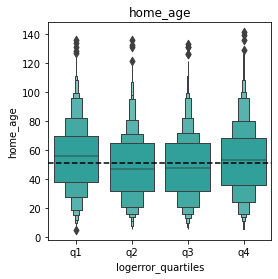

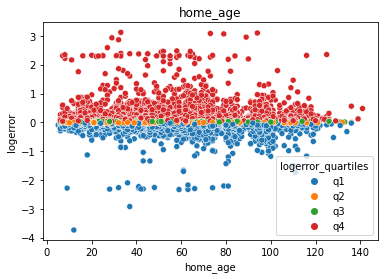

logerror_quartiles            q1            q2            q3           q4
count               10163.000000  10051.000000  10013.000000  9990.000000
mean                   55.305028     48.163964     48.583242    53.484084
std                    23.258743     21.560305     22.087398    23.775393
min                     5.000000      6.000000      6.000000     6.000000
25%                    38.000000     32.000000     32.000000    36.000000
50%                    56.000000     47.000000     48.000000    53.000000
75%                    70.000000     65.000000     65.000000    68.000000
max                   136.000000    136.000000    133.000000   141.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=-0.029921899579794357, pvalue=1.9520473451788685e-09)

____________________



In [14]:
#Standard Scaler
exp.explore_bivariate(train, categorical_target, continuous_target, binary_vars, quant_vars)

In [16]:
scaler

StandardScaler()

bathrooms 
____________________



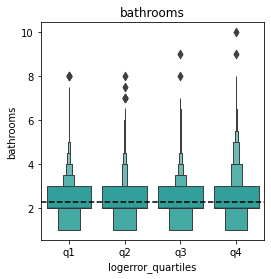

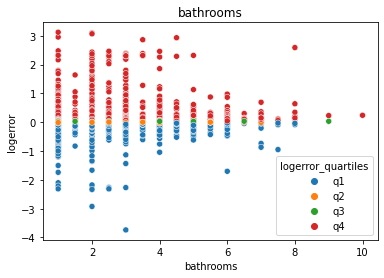

logerror_quartiles            q1            q2            q3           q4
count               10163.000000  10051.000000  10013.000000  9990.000000
mean                    2.170422      2.259875      2.298512     2.373724
std                     0.893008      0.822338      0.854224     1.061548
min                     1.000000      1.000000      1.000000     1.000000
25%                     2.000000      2.000000      2.000000     2.000000
50%                     2.000000      2.000000      2.000000     2.000000
75%                     3.000000      3.000000      3.000000     3.000000
max                     8.000000      8.000000      9.000000    10.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.06673338207840891, pvalue=6.266119567138522e-41)

____________________

bedrooms 
____________________



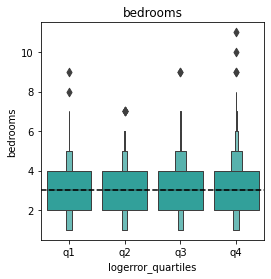

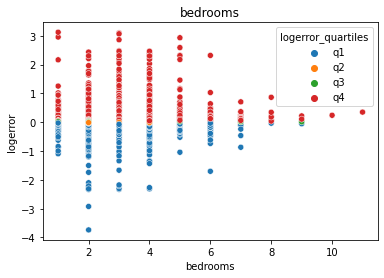

logerror_quartiles            q1            q2            q3           q4
count               10163.000000  10051.000000  10013.000000  9990.000000
mean                    2.932697      3.004079      3.037052     3.103504
std                     0.966877      0.948045      0.981208     1.073203
min                     1.000000      1.000000      1.000000     1.000000
25%                     2.000000      2.000000      2.000000     2.000000
50%                     3.000000      3.000000      3.000000     3.000000
75%                     4.000000      4.000000      4.000000     4.000000
max                     9.000000      7.000000      9.000000    11.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.055904310883562056, pvalue=3.2683767812594527e-29)

____________________

property_quality 
____________________



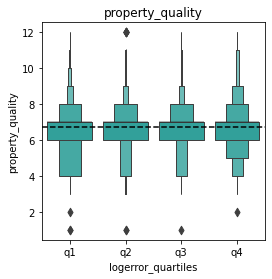

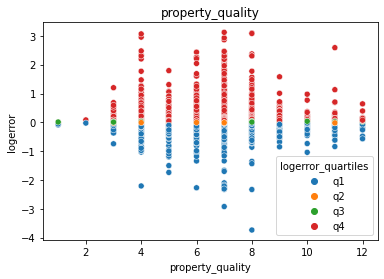

logerror_quartiles            q1            q2            q3           q4
count               10163.000000  10051.000000  10013.000000  9990.000000
mean                    6.672046      6.794747      6.810147     6.753554
std                     1.419628      1.242272      1.260992     1.434499
min                     1.000000      1.000000      1.000000     2.000000
25%                     6.000000      6.000000      6.000000     6.000000
50%                     7.000000      7.000000      7.000000     7.000000
75%                     7.000000      7.000000      7.000000     7.000000
max                    12.000000     12.000000     12.000000    12.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.01677093511778174, pvalue=0.0007698734676090994)

____________________

sqft 
____________________



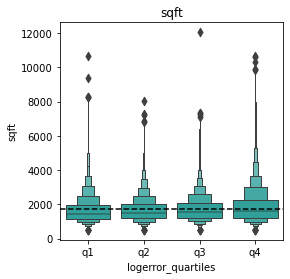

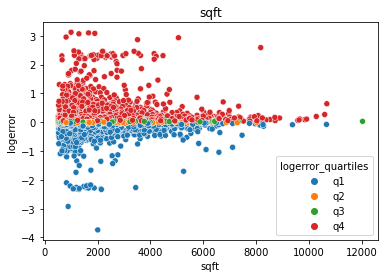

logerror_quartiles            q1            q2            q3            q4
count               10163.000000  10051.000000  10013.000000   9990.000000
mean                 1663.380891   1679.959507   1733.371417   1892.766266
std                   829.096554    754.952529    790.454458   1061.244566
min                   501.000000    501.000000    504.000000    504.000000
25%                  1135.000000   1175.000000   1196.000000   1202.000000
50%                  1450.000000   1500.000000   1546.000000   1593.000000
75%                  1933.000000   1997.000000   2062.000000   2279.750000
max                 10671.000000   8021.000000  12039.000000  10686.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.07909512992996794, pvalue=7.887655447957083e-57)

____________________

fips 
____________________



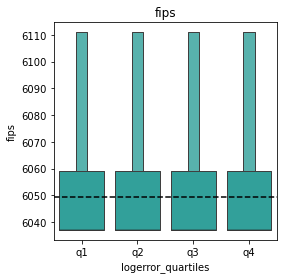

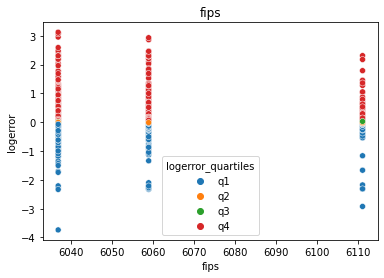

logerror_quartiles            q1            q2            q3           q4
count               10163.000000  10051.000000  10013.000000  9990.000000
mean                 6047.804093   6050.829072   6050.148906  6048.874074
std                    20.311230     21.799480     21.186007    21.204111
min                  6037.000000   6037.000000   6037.000000  6037.000000
25%                  6037.000000   6037.000000   6037.000000  6037.000000
50%                  6037.000000   6037.000000   6037.000000  6037.000000
75%                  6059.000000   6059.000000   6059.000000  6059.000000
max                  6111.000000   6111.000000   6111.000000  6111.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.017240091369801053, pvalue=0.0005451963668865634)

____________________

latitude 
____________________



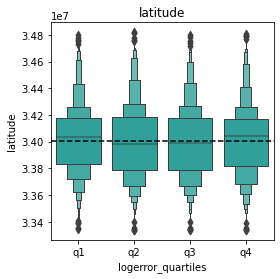

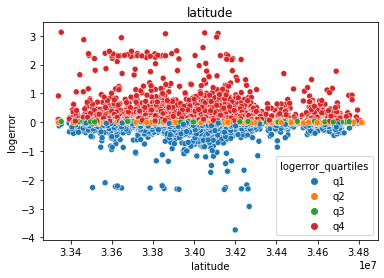

logerror_quartiles            q1            q2            q3            q4
count               1.016300e+04  1.005100e+04  1.001300e+04  9.990000e+03
mean                3.401898e+07  3.400133e+07  3.399557e+07  3.401034e+07
std                 2.579385e+05  2.806781e+05  2.711094e+05  2.598157e+05
min                 3.334429e+07  3.333953e+07  3.334062e+07  3.333983e+07
25%                 3.383377e+07  3.379082e+07  3.379123e+07  3.382053e+07
50%                 3.403459e+07  3.398690e+07  3.399025e+07  3.404188e+07
75%                 3.417671e+07  3.418573e+07  3.417554e+07  3.417166e+07
max                 3.479686e+07  3.481877e+07  3.479581e+07  3.480696e+07 


Spearman's Correlation Test:
 SpearmanrResult(correlation=-0.0079499097117483, pvalue=0.11087678924626355)

____________________

longitude 
____________________



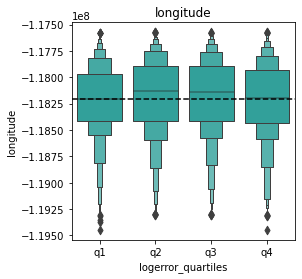

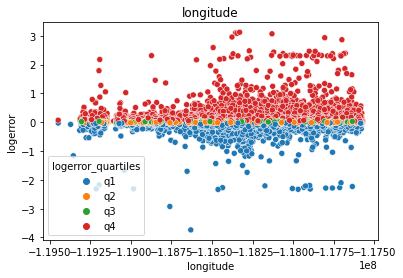

logerror_quartiles            q1            q2            q3            q4
count               1.016300e+04  1.005100e+04  1.001300e+04  9.990000e+03
mean               -1.182214e+08 -1.181797e+08 -1.181824e+08 -1.182187e+08
std                 3.420108e+05  3.779326e+05  3.716617e+05  3.655174e+05
min                -1.194479e+08 -1.193049e+08 -1.193048e+08 -1.194484e+08
25%                -1.184139e+08 -1.184130e+08 -1.184137e+08 -1.184292e+08
50%                -1.182028e+08 -1.181283e+08 -1.181426e+08 -1.181917e+08
75%                -1.179701e+08 -1.178910e+08 -1.178910e+08 -1.179343e+08
max                -1.175765e+08 -1.175724e+08 -1.175734e+08 -1.175728e+08 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.00867058386934224, pvalue=0.08207120869819703)

____________________

lot_sqft 
____________________



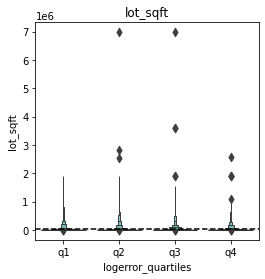

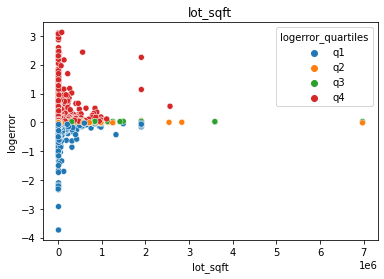

logerror_quartiles            q1            q2            q3            q4
count               1.016300e+04  1.005100e+04  1.001300e+04  9.990000e+03
mean                2.724292e+04  2.757390e+04  2.841502e+04  2.564374e+04
std                 8.799871e+04  1.164356e+05  1.215664e+05  8.522105e+04
min                 2.360000e+02  4.800000e+02  4.350000e+02  4.350000e+02
25%                 6.000000e+03  5.913000e+03  5.911000e+03  5.997000e+03
50%                 7.265000e+03  7.265000e+03  7.265000e+03  7.265000e+03
75%                 1.090900e+04  9.727500e+03  1.012700e+04  1.200000e+04
max                 1.904165e+06  6.971010e+06  6.971010e+06  2.562259e+06 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.006670234286665326, pvalue=0.18101581884020737)

____________________

rawcensustractandblock 
____________________



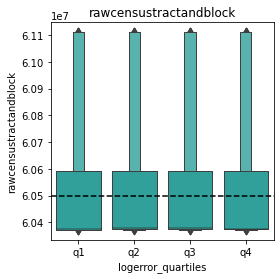

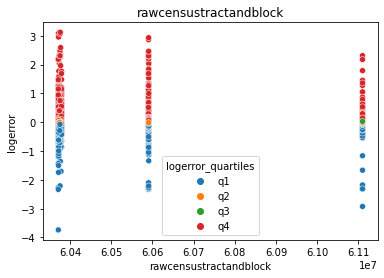

logerror_quartiles            q1            q2            q3            q4
count               1.016300e+04  1.005100e+04  1.001300e+04  9.990000e+03
mean                6.048119e+07  6.051128e+07  6.050444e+07  6.049176e+07
std                 2.016178e+05  2.163115e+05  2.102357e+05  2.105287e+05
min                 6.037101e+07  6.037101e+07  6.037101e+07  6.037101e+07
25%                 6.037276e+07  6.037405e+07  6.037403e+07  6.037300e+07
50%                 6.037574e+07  6.037900e+07  6.037671e+07  6.037577e+07
75%                 6.059042e+07  6.059053e+07  6.059052e+07  6.059042e+07
max                 6.111009e+07  6.111009e+07  6.111009e+07  6.111009e+07 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.008946983252136895, pvalue=0.07277742890410707)

____________________

regionidcity 
____________________



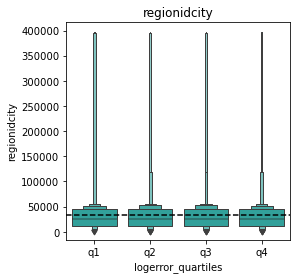

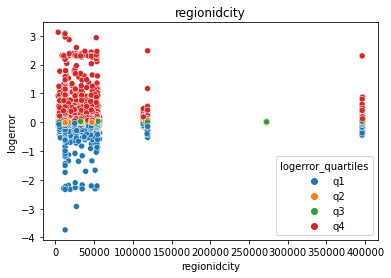

logerror_quartiles             q1             q2             q3             q4
count                10163.000000   10051.000000   10013.000000    9990.000000
mean                 34467.983666   33025.526017   33398.838210   33038.807107
std                  51405.110997   43041.551886   44483.529352   44577.378488
min                   3491.000000    3491.000000    3491.000000    3491.000000
25%                  12447.000000   12447.000000   12447.000000   12447.000000
50%                  24832.000000   25458.000000   25218.000000   25218.000000
75%                  45457.000000   44833.000000   45457.000000   45457.000000
max                 396556.000000  396556.000000  396556.000000  396556.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.007689189898252936, pvalue=0.12307879714280608)

____________________

zip_code 
____________________



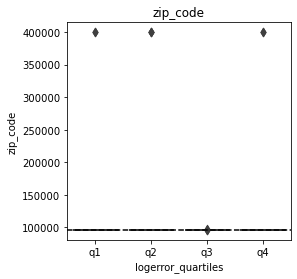

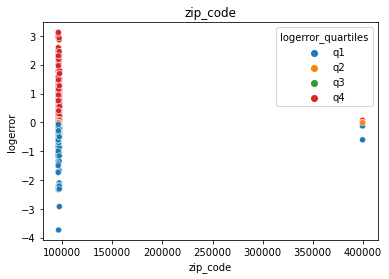

logerror_quartiles             q1             q2            q3             q4
count                10163.000000   10051.000000  10013.000000    9990.000000
mean                 96571.089147   96692.733658  96581.879257   96592.135536
std                   4272.998559    5251.630828    405.941171    4308.321793
min                  95982.000000   95982.000000  95982.000000   95982.000000
25%                  96166.000000   96236.000000  96229.000000   96193.000000
50%                  96374.000000   96464.000000  96436.000000   96385.000000
75%                  96978.000000   96998.000000  96993.000000   96982.000000
max                 399675.000000  399675.000000  97344.000000  399675.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.020449759392420566, pvalue=4.107782639685135e-05)

____________________

roomcnt 
____________________



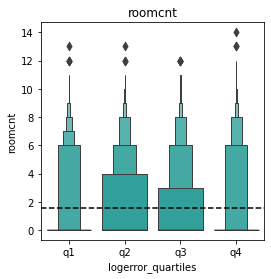

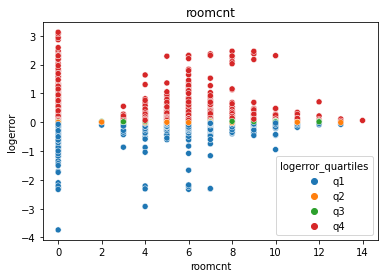

logerror_quartiles            q1            q2            q3           q4
count               10163.000000  10051.000000  10013.000000  9990.000000
mean                    1.400079      1.650284      1.653051     1.565666
std                     2.751166      2.936708      2.948633     2.902501
min                     0.000000      0.000000      0.000000     0.000000
25%                     0.000000      0.000000      0.000000     0.000000
50%                     0.000000      0.000000      0.000000     0.000000
75%                     0.000000      4.000000      3.000000     0.000000
max                    13.000000     13.000000     12.000000    14.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.019332840300300032, pvalue=0.00010562913443466072)

____________________

unitcnt 
____________________



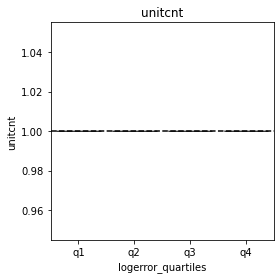

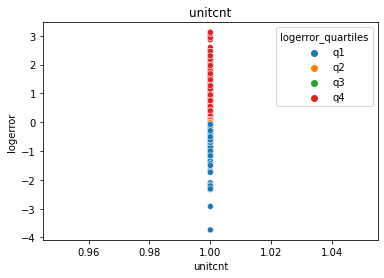

logerror_quartiles       q1       q2       q3      q4
count               10163.0  10051.0  10013.0  9990.0
mean                    1.0      1.0      1.0     1.0
std                     0.0      0.0      0.0     0.0
min                     1.0      1.0      1.0     1.0
25%                     1.0      1.0      1.0     1.0
50%                     1.0      1.0      1.0     1.0
75%                     1.0      1.0      1.0     1.0
max                     1.0      1.0      1.0     1.0 


Spearman's Correlation Test:
 SpearmanrResult(correlation=nan, pvalue=nan)

____________________

yearbuilt 
____________________



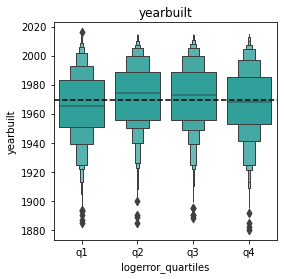

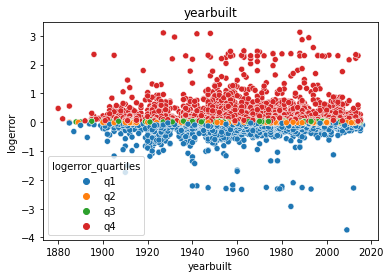

logerror_quartiles            q1            q2            q3           q4
count               10163.000000  10051.000000  10013.000000  9990.000000
mean                 1965.694972   1972.836036   1972.416758  1967.515916
std                    23.258743     21.560305     22.087398    23.775393
min                  1885.000000   1885.000000   1888.000000  1880.000000
25%                  1951.000000   1956.000000   1956.000000  1953.000000
50%                  1965.000000   1974.000000   1973.000000  1968.000000
75%                  1983.000000   1989.000000   1989.000000  1985.000000
max                  2016.000000   2015.000000   2015.000000  2015.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.029921899579794357, pvalue=1.9520473451788685e-09)

____________________

structure_value 
____________________



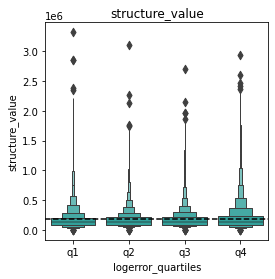

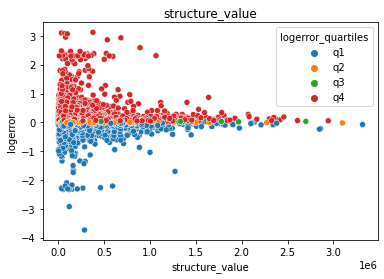

logerror_quartiles            q1            q2            q3            q4
count               1.016300e+04  1.005100e+04  1.001300e+04  9.990000e+03
mean                1.731508e+05  1.740084e+05  1.809504e+05  2.018876e+05
std                 1.770824e+05  1.465156e+05  1.602233e+05  2.261525e+05
min                 4.400000e+01  1.810000e+02  1.015000e+03  1.320000e+02
25%                 7.951350e+04  9.006200e+04  8.921100e+04  7.992075e+04
50%                 1.280700e+05  1.384940e+05  1.411240e+05  1.354415e+05
75%                 2.023165e+05  2.102060e+05  2.182420e+05  2.316088e+05
max                 3.316500e+06  3.097672e+06  2.698828e+06  2.943209e+06 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.03073596965649902, pvalue=7.043393436554154e-10)

____________________

home_value 
____________________



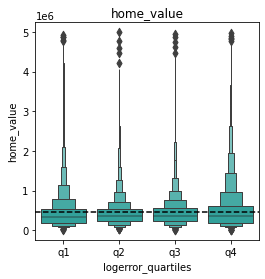

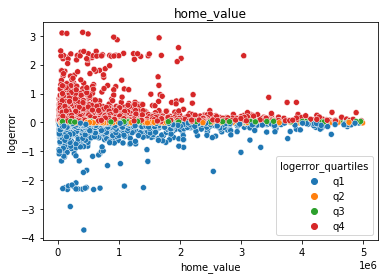

logerror_quartiles            q1            q2            q3            q4
count               1.016300e+04  1.005100e+04  1.001300e+04  9.990000e+03
mean                4.590893e+05  4.392099e+05  4.544521e+05  5.190472e+05
std                 4.789855e+05  3.673792e+05  4.031498e+05  5.636558e+05
min                 1.382000e+04  1.961600e+04  1.050400e+04  3.254000e+03
25%                 1.919490e+05  2.233615e+05  2.208150e+05  1.883318e+05
50%                 3.380000e+05  3.641000e+05  3.690050e+05  3.500310e+05
75%                 5.411270e+05  5.436520e+05  5.630000e+05  6.209435e+05
max                 4.932794e+06  4.993132e+06  4.961367e+06  4.973709e+06 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.021972277560047798, pvalue=1.0493107880573382e-05)

____________________

land_value 
____________________



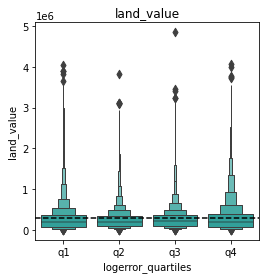

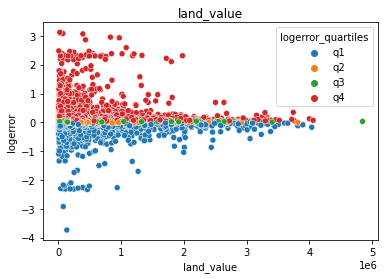

logerror_quartiles            q1            q2            q3            q4
count               1.016300e+04  1.005100e+04  1.001300e+04  9.990000e+03
mean                2.859385e+05  2.652015e+05  2.735017e+05  3.171597e+05
std                 3.507248e+05  2.661128e+05  2.876959e+05  3.929572e+05
min                 1.196000e+03  4.747000e+03  3.906000e+03  1.610000e+02
25%                 7.502000e+04  9.514800e+04  9.100000e+04  7.418500e+04
50%                 1.935310e+05  2.081260e+05  2.088580e+05  1.987185e+05
75%                 3.562370e+05  3.518215e+05  3.620000e+05  3.999500e+05
max                 4.038200e+06  3.817340e+06  4.847224e+06  4.061000e+06 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.012391072633872948, pvalue=0.012957118100605536)

____________________

taxamount 
____________________



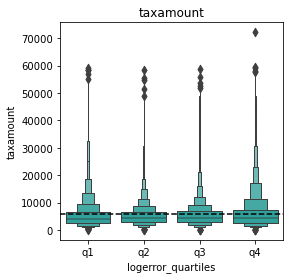

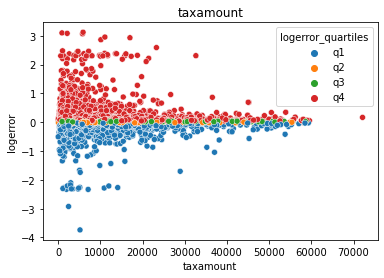

logerror_quartiles            q1            q2            q3            q4
count               10163.000000  10051.000000  10013.000000   9990.000000
mean                 5602.021070   5384.961915   5569.203681   6291.300986
std                  5534.607759   4253.355957   4723.400044   6529.615560
min                    19.920000     51.260000     61.820000     49.180000
25%                  2555.075000   2899.890000   2845.700000   2477.625000
50%                  4178.840000   4501.080000   4538.950000   4323.685000
75%                  6564.450000   6558.930000   6825.660000   7445.992500
max                 59284.110000  58207.140000  58634.770000  72122.200000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.02052236745205755, pvalue=3.856759855655328e-05)

____________________

home_age 
____________________



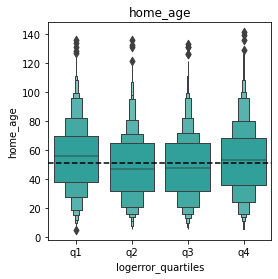

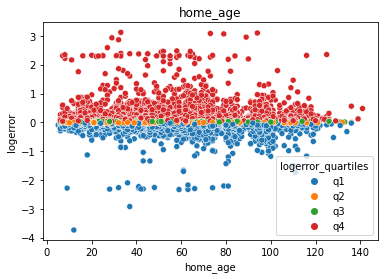

logerror_quartiles            q1            q2            q3           q4
count               10163.000000  10051.000000  10013.000000  9990.000000
mean                   55.305028     48.163964     48.583242    53.484084
std                    23.258743     21.560305     22.087398    23.775393
min                     5.000000      6.000000      6.000000     6.000000
25%                    38.000000     32.000000     32.000000    36.000000
50%                    56.000000     47.000000     48.000000    53.000000
75%                    70.000000     65.000000     65.000000    68.000000
max                   136.000000    136.000000    133.000000   141.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=-0.029921899579794357, pvalue=1.9520473451788685e-09)

____________________



In [20]:
#ROBUST Scaler
exp.explore_bivariate(train, categorical_target, continuous_target, binary_vars, quant_vars)

In [15]:
scaler

StandardScaler()

<AxesSubplot:>

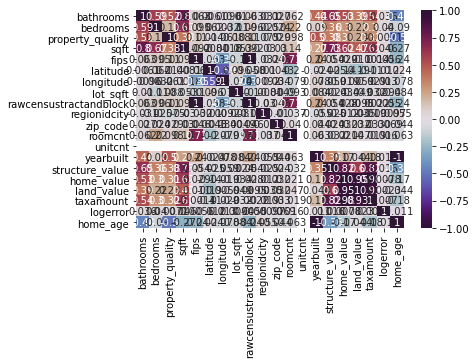

In [17]:
sns.heatmap(train.corr(), cmap='twilight_shifted', annot=True)

<AxesSubplot:>

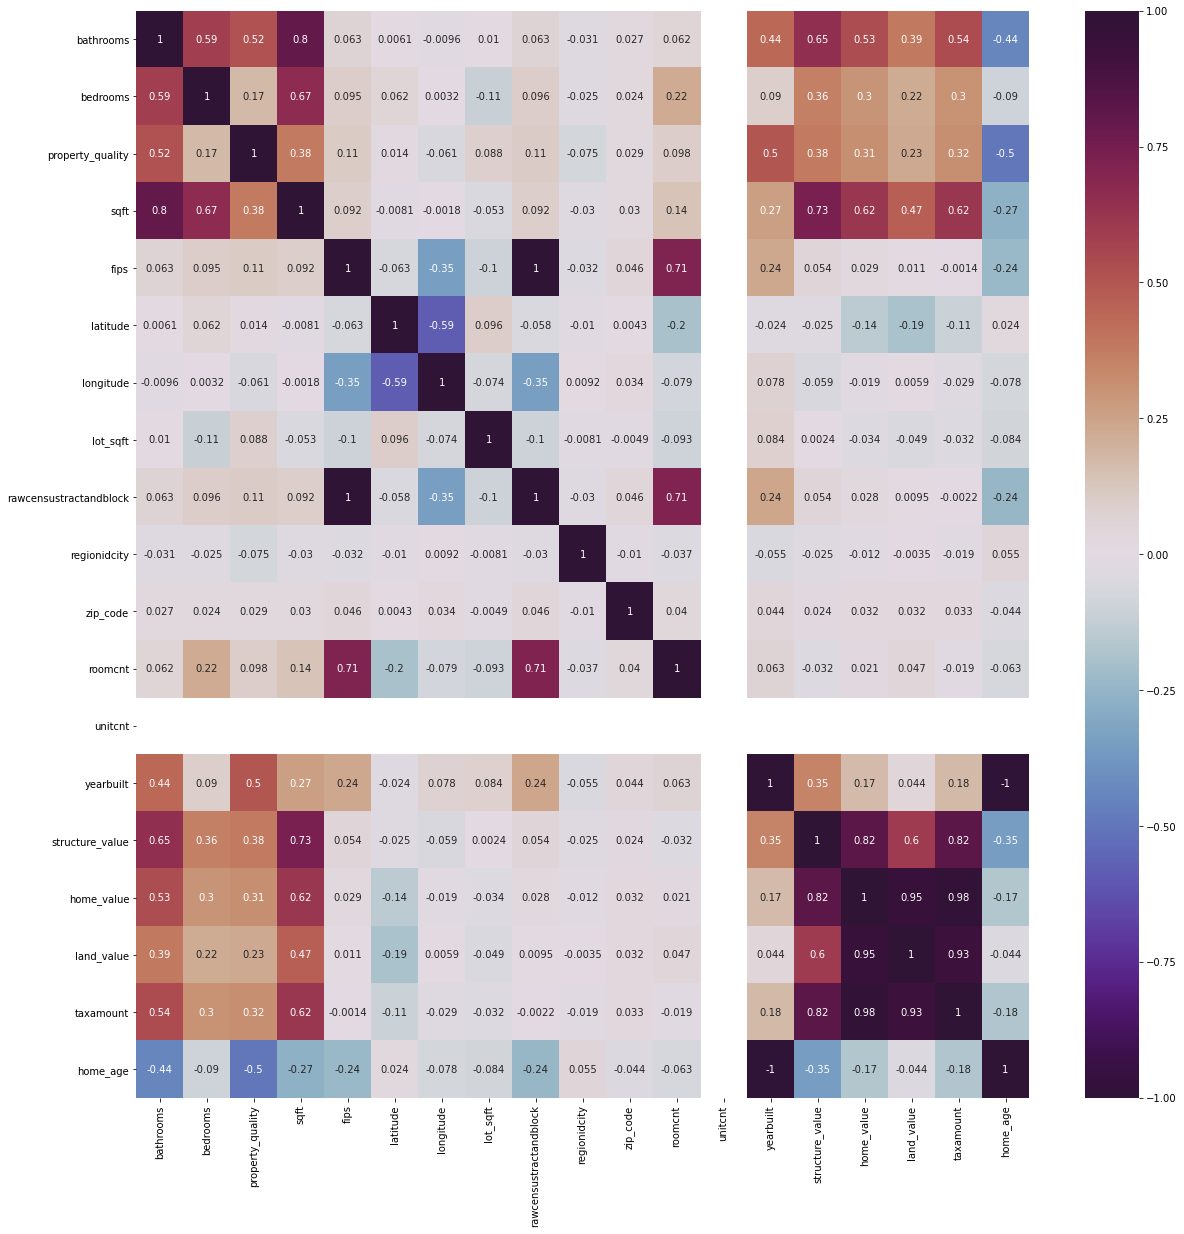

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train_scaled.corr(), cmap='twilight_shifted', annot=True)

In [26]:
numeric_cols

['bathrooms',
 'bedrooms',
 'property_quality',
 'sqft',
 'fips',
 'latitude',
 'longitude',
 'lot_sqft',
 'rawcensustractandblock',
 'regionidcity',
 'zip_code',
 'roomcnt',
 'unitcnt',
 'yearbuilt',
 'structure_value',
 'home_value',
 'land_value',
 'taxamount',
 'home_age']

In [27]:
cols = ['bathrooms',
 'bedrooms',
 'property_quality',
 'sqft',
 'fips',
 'latitude',
 'longitude',
 'lot_sqft',
 'rawcensustractandblock',
 'regionidcity',
 'zip_code',
 'roomcnt',
 'unitcnt',
 'yearbuilt',
 'structure_value',
 'home_value',
 'land_value',
 'taxamount']

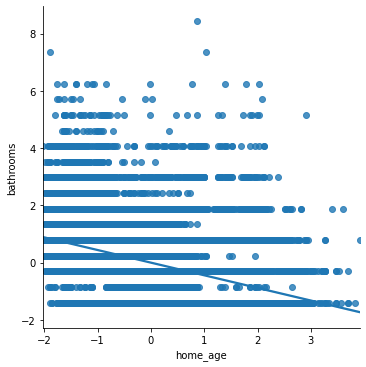

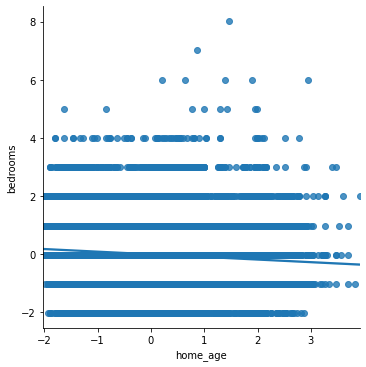

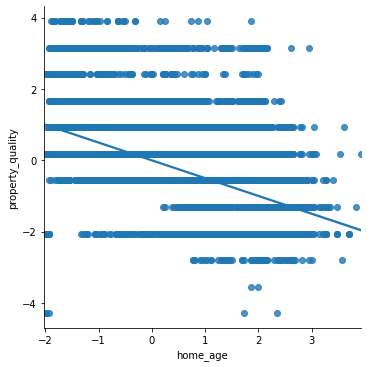

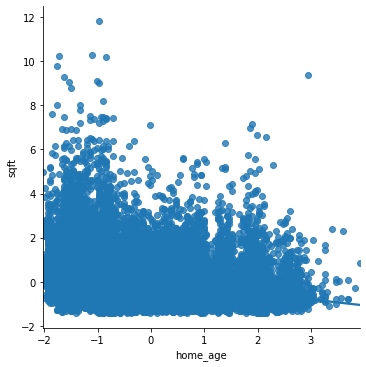

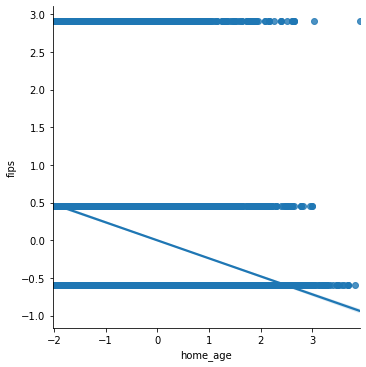

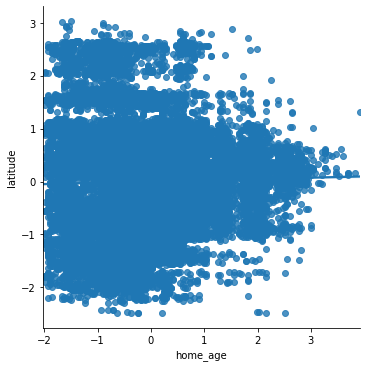

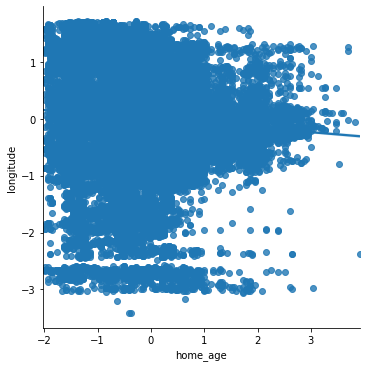

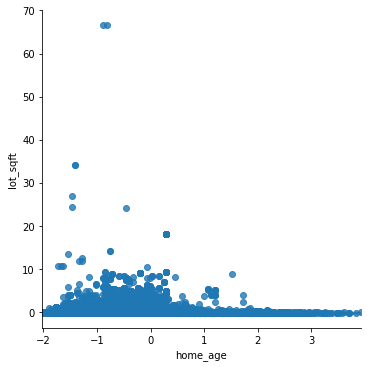

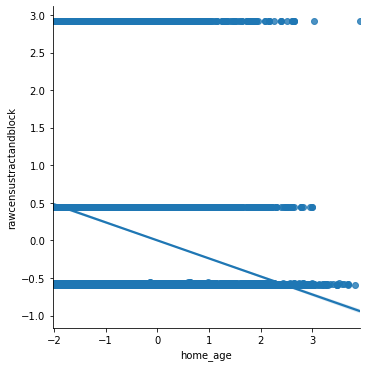

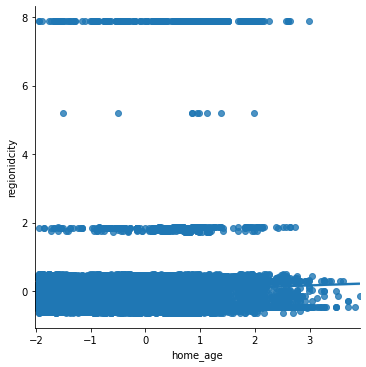

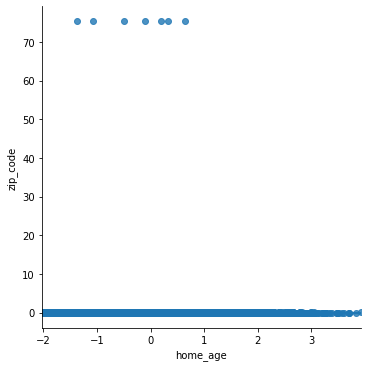

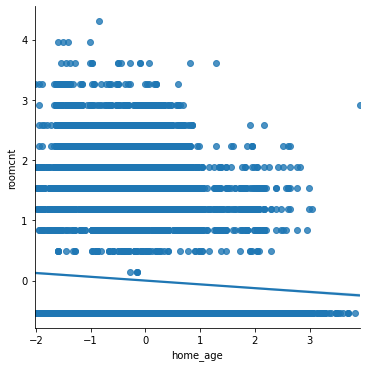

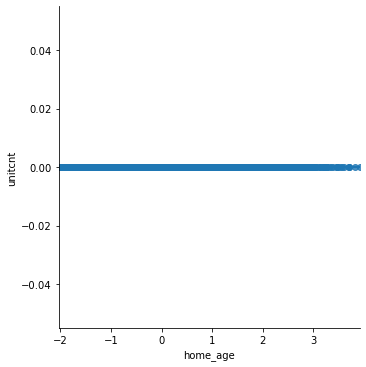

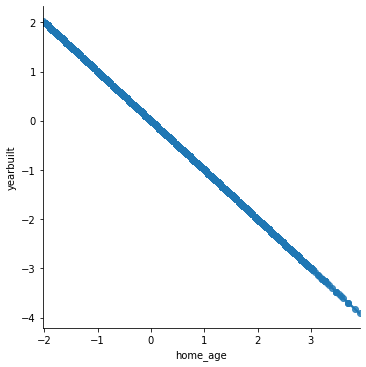

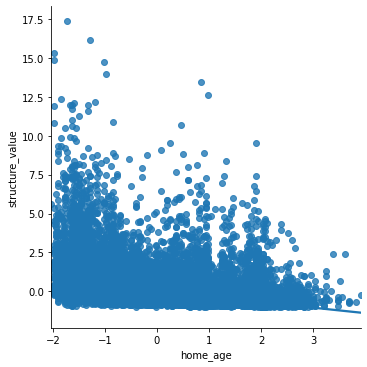

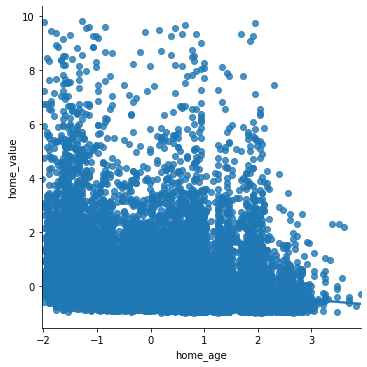

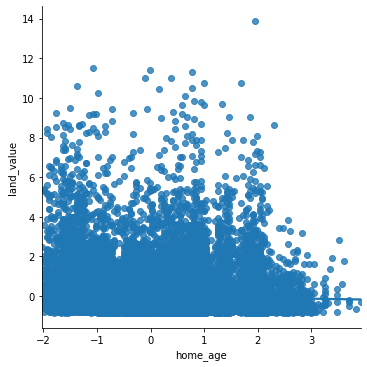

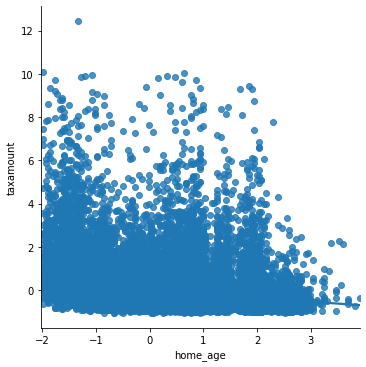

In [43]:
for col in cols:
    g = sns.lmplot(x='home_age', y=col, data=X_train_scaled)

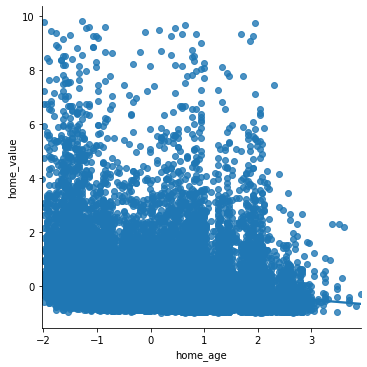

In [42]:
sns.lmplot(x='home_age', y='home_value', data=X_train_scaled)

In [50]:
cols = ['bathrooms',
 'bedrooms',
 'property_quality',
 'sqft',
 'fips',
 'latitude',
 'longitude',
 'rawcensustractandblock',
 'regionidcity',
 'zip_code',
 'roomcnt',
 'unitcnt',
 'yearbuilt',
 'structure_value',
 'home_value',
 'land_value',
 'taxamount',
 'home_age']

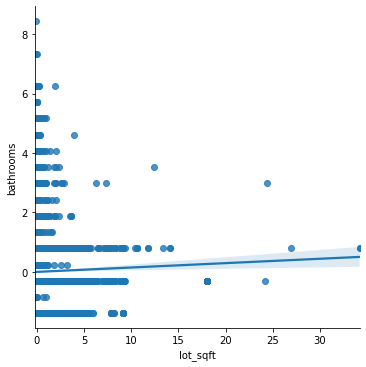

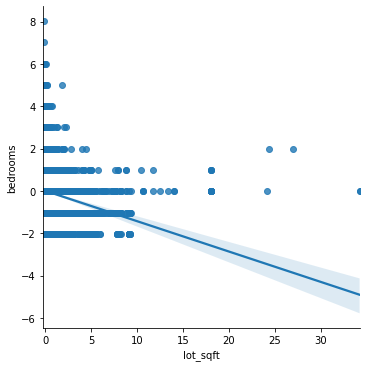

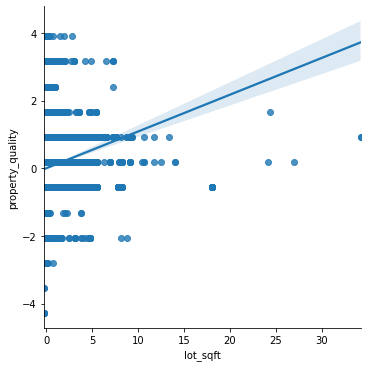

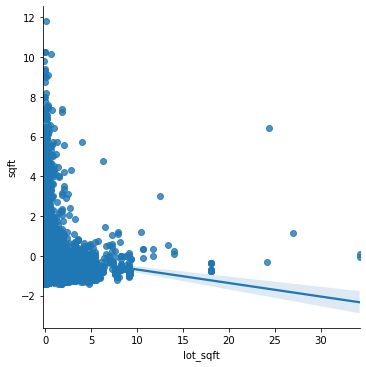

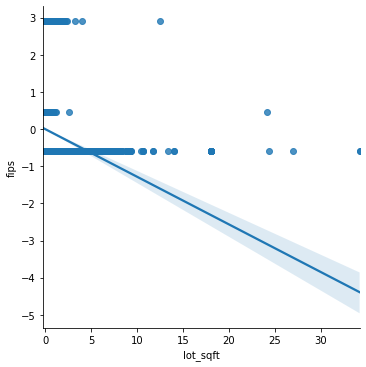

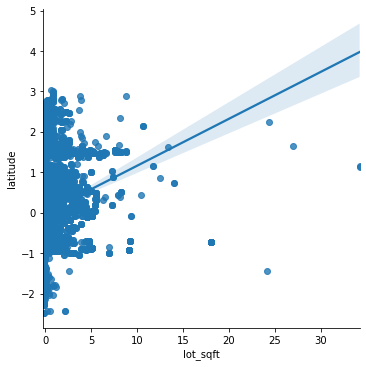

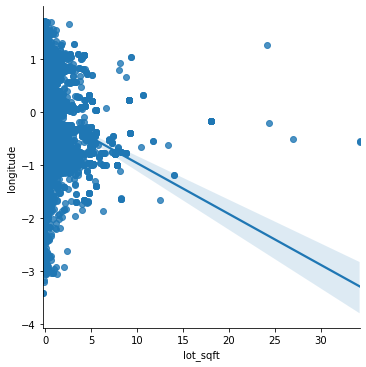

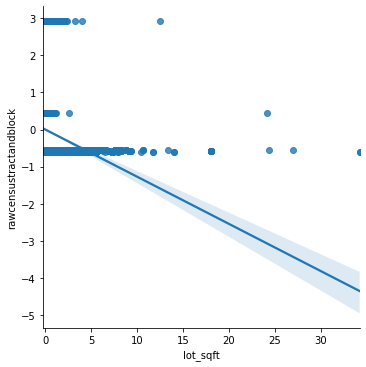

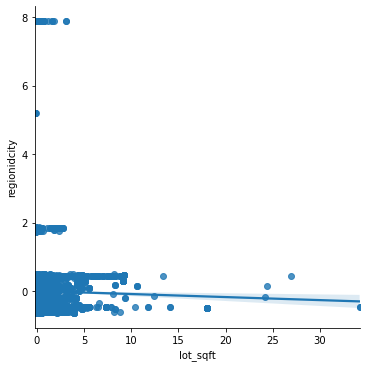

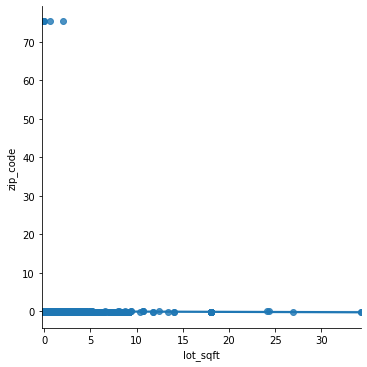

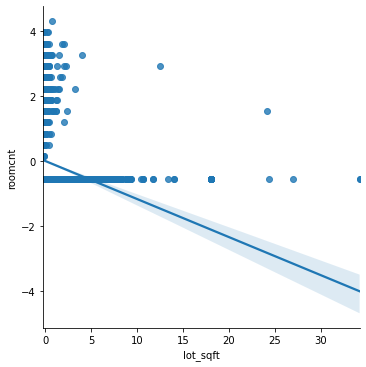

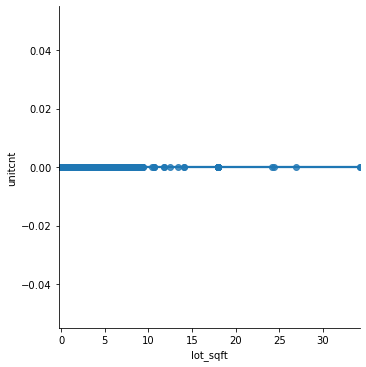

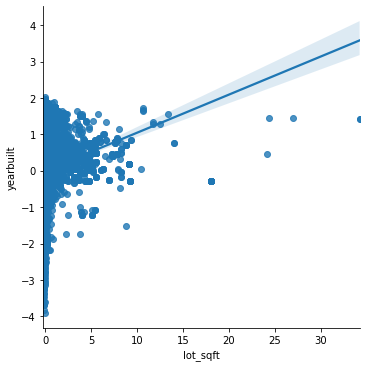

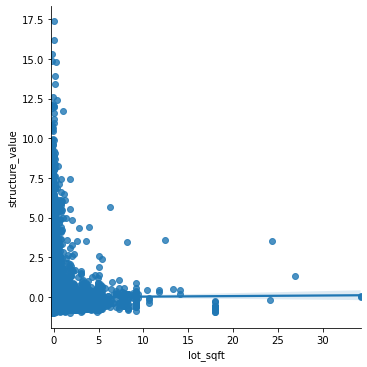

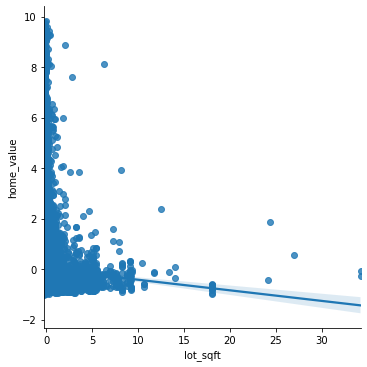

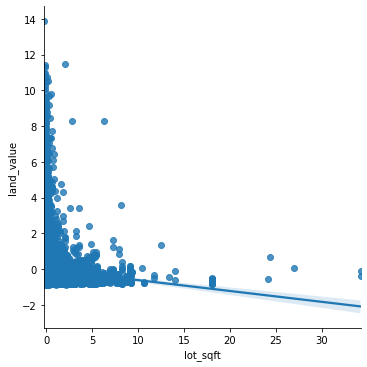

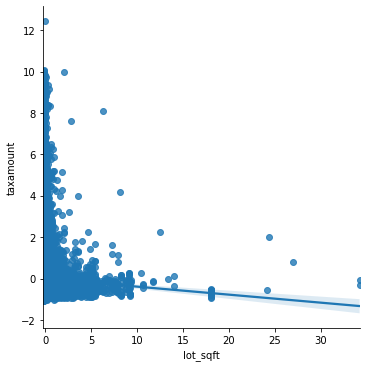

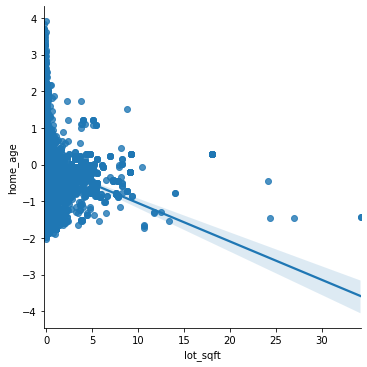

In [51]:
for col in cols:
    g = sns.lmplot(x='lot_sqft', y=col, data=X_train_scaled[X_train_scaled.lot_sqft < 40])

In [47]:
cols = ['bathrooms',
 'bedrooms',
 'property_quality',
 'sqft',
 'fips',
 'latitude',
 'longitude',
 'lot_sqft',
 'rawcensustractandblock',
 'regionidcity',
 'zip_code',
 'roomcnt',
 'unitcnt',
 'yearbuilt',
 'structure_value',
 'land_value',
 'taxamount',
 'home_age']

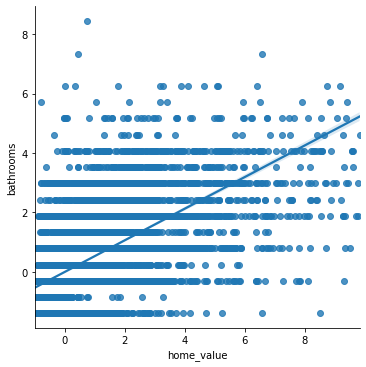

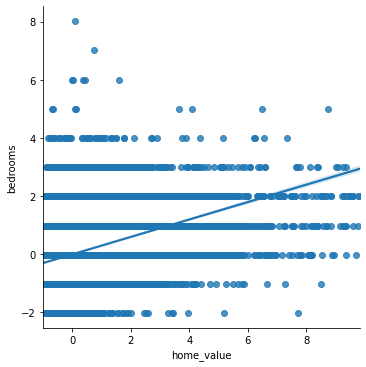

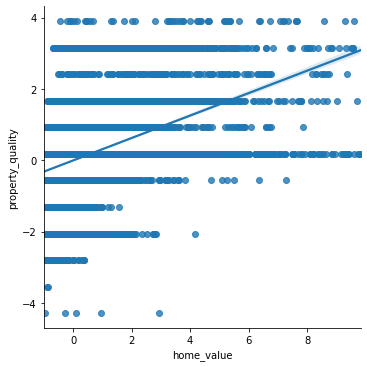

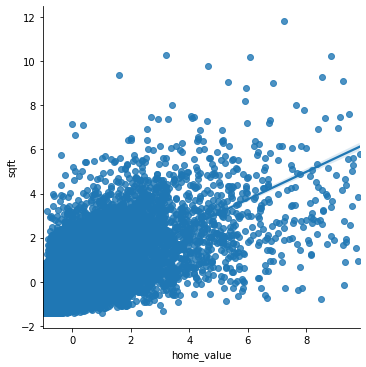

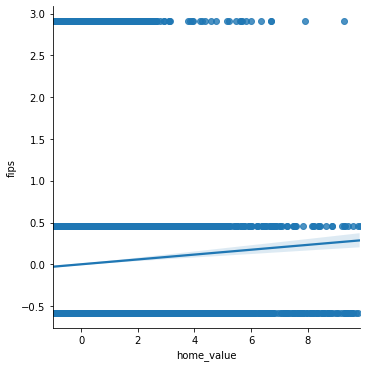

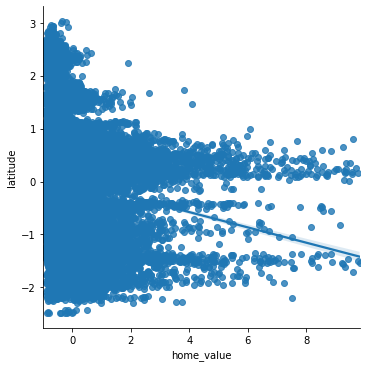

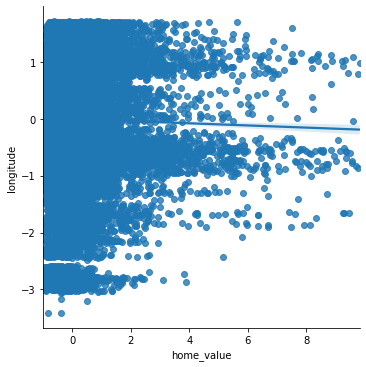

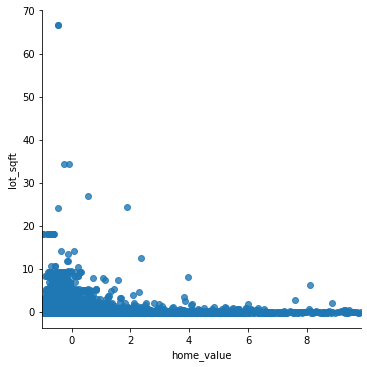

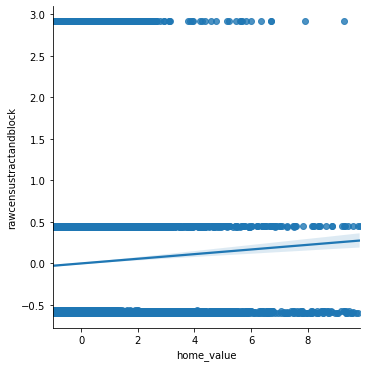

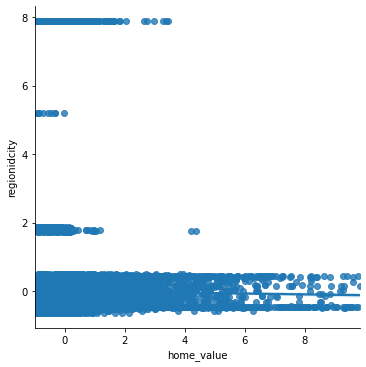

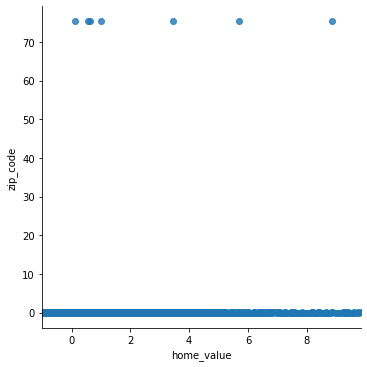

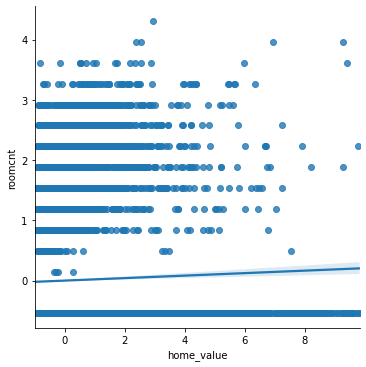

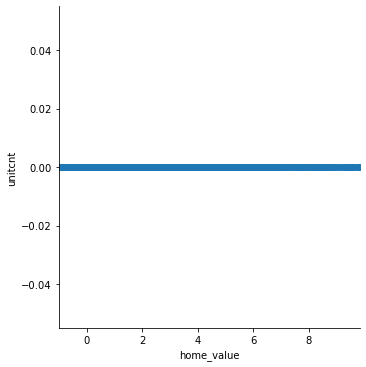

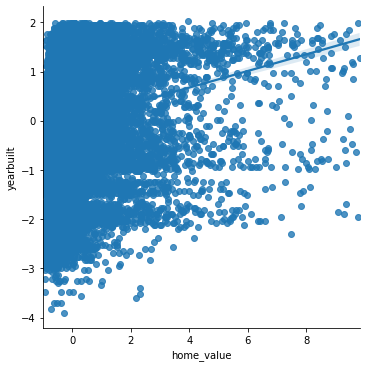

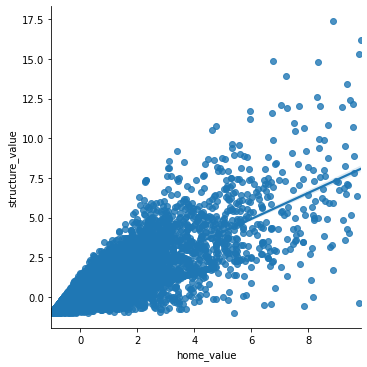

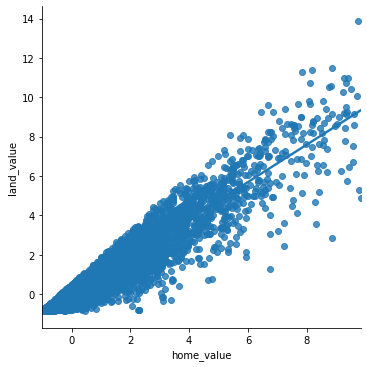

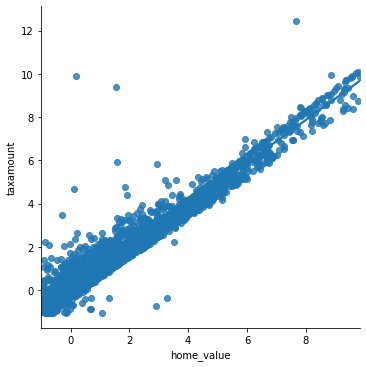

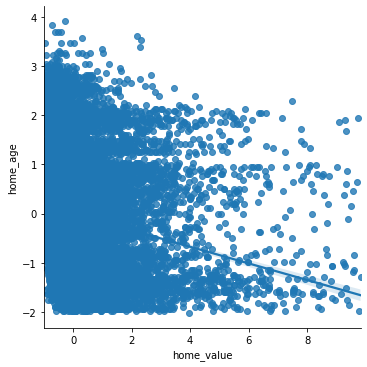

In [48]:
for col in cols:
    g = sns.lmplot(x='home_value', y=col, data=X_train_scaled)

features to pair:
- `home_age` & `home_value`
- `home_age` & `sqft`
- `lot_sqft`& `sqft`
- `home_value` & `sqft`

### Clustering

#### `home_age` & `home_value`

In [72]:
X = df[['home_age', 'home_value']]

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

k =2 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

93083.96628572787

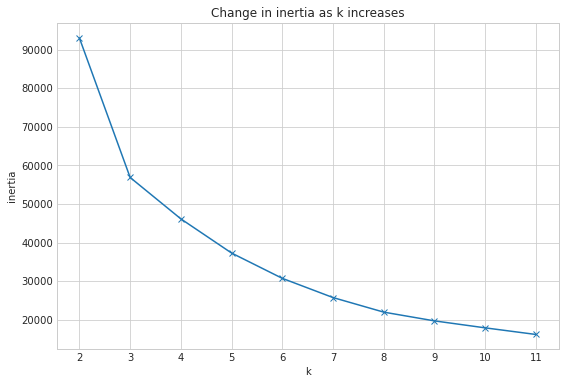

In [73]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [236]:
# define independent variables for k-means
# this is creating a 2col df of the features
X = df[['home_age', 'home_value']]
X.head(2)

home_age  home_value
parcelid                      
10711855        49    624139.0
10711877        49    660000.0

In [237]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [238]:
X_scaled.head(2)

home_age  home_value
10711855 -0.106145    0.341716
10711877 -0.106145    0.420021

In [239]:
#define the thing
kmeans = KMeans(n_clusters=5)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([1, 1, 1, ..., 4, 1, 4], dtype=int32)

In [240]:
# make a new column names cluster in X_scaled dataframe

X_scaled['cluster'] = kmeans.predict(X_scaled)
X_scaled['cluster'] = 'cluster_' + X_scaled.cluster.astype(str)
X_scaled.head()

home_age  home_value    cluster
10711855 -0.106145    0.341716  cluster_1
10711877 -0.106145    0.420021  cluster_1
10711888 -0.106145    0.164374  cluster_1
10711910  0.417773   -0.850755  cluster_1
10711923  0.417773   -0.113954  cluster_1

In [61]:
X_scaled['cluster'] = 'cluster_' + X_scaled.cluster.astype(str)
X_scaled.head()

home_age  home_value    cluster
10711855 -0.106145    0.341716  cluster_0
10711877 -0.106145    0.420021  cluster_0
10711888 -0.106145    0.164374  cluster_0
10711910  0.417773   -0.850755  cluster_0
10711923  0.417773   -0.113954  cluster_1

In [241]:
# Cluster Centers aka centroids. The output is scaled!!
kmeans.cluster_centers_

array([[-0.48664038,  1.52189861],
       [ 0.42846234, -0.36715474],
       [-0.2451262 ,  5.09124221],
       [ 1.80017551, -0.19171823],
       [-0.88970979, -0.157607  ]])

In [242]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

home_age  home_value
0 -0.486640    1.521899
1  0.428462   -0.367155
2 -0.245126    5.091242
3  1.800176   -0.191718
4 -0.889710   -0.157607

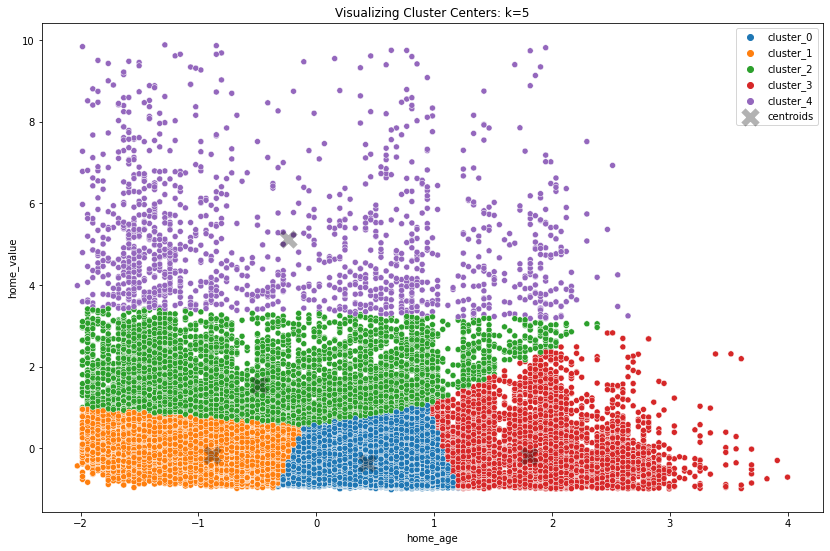

In [71]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'home_age', y = 'home_value', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'home_age', y = 'home_value', ax = plt.gca(), color ='k', alpha = 0.3, s = 200, marker = 'x', label = 'centroids', lw=6)

plt.title('Visualizing Cluster Centers: k=5')
plt.legend();

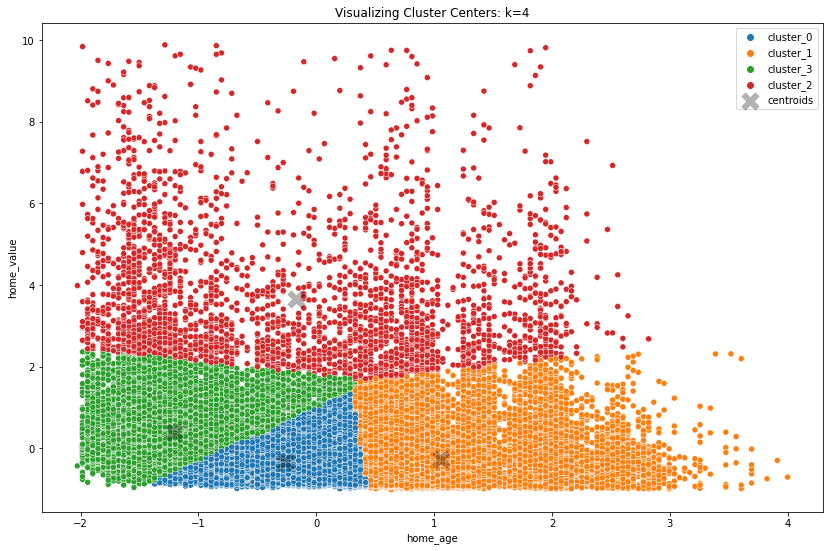

In [63]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'home_age', y = 'home_value', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'home_age', y = 'home_value', ax = plt.gca(), color ='k', alpha = 0.3, s = 200, marker = 'x', label = 'centroids', lw=6)

plt.title('Visualizing Cluster Centers: k=4')
plt.legend();

#### `home_age` & `sqft`

In [74]:
X = df[['home_age', 'sqft']]

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

k =2 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

89344.24929784537

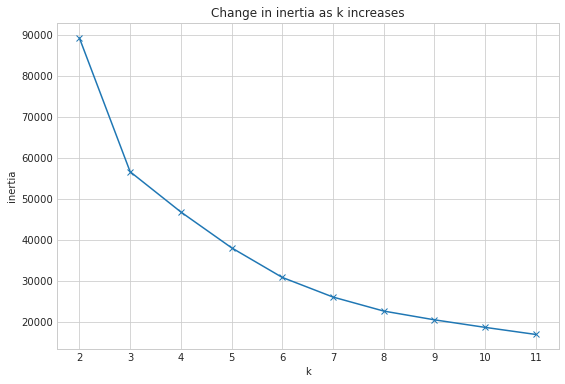

In [75]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [344]:
# define independent variables for k-means
# this is creating a 2col df of the features
X = df[['home_age', 'sqft']]
X.head(2)

home_age    sqft
parcelid                  
10711855        49  2107.0
10711877        49  1882.0

In [345]:
# Scale the X

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [349]:
X_scaled.shape

(71818, 2)

In [346]:
X_scaled.head(2)

home_age      sqft
10711855 -0.106145  0.417978
10711877 -0.106145  0.160339

In [347]:
#define the thing
kmeans = KMeans(n_clusters=6)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([5, 5, 5, ..., 0, 1, 0], dtype=int32)

In [350]:
# make a new column names cluster in X_scaled dataframe

df['cluster'] = kmeans.predict(X_scaled)
df.head(2)

In [350]:
#X_train['cluster'] = kmeans.predict(X_scaled)

#X_train_scaled['cluster'] = kmeans.predict(X_scaled)

#X_scaled['cluster'] = kmeans.predict(X_scaled)
#X_scaled['cluster'] = 'cluster_' + X_scaled.cluster.astype(str)
#X_scaled.head()



bathrooms  bedrooms  property_quality    sqft  fips    latitude  \
parcelid                                                                    
10711855        2.0         3                 8  2107.0  6037  34222559.0   
10711877        2.0         4                 8  1882.0  6037  34220261.0   

            longitude  lot_sqft  rawcensustractandblock  regionidcity  ...  \
parcelid                                                               ...   
10711855 -118617387.0    9158.0            6.037113e+07       12447.0  ...   
10711877 -118616409.0    9035.0            6.037113e+07       12447.0  ...   

          structure_value  home_value  land_value  taxamount  logerror  \
parcelid                                                                 
10711855         249655.0    624139.0    374484.0    7659.36 -0.007357   
10711877         253000.0    660000.0    407000.0    8123.91  0.021066   

          transactiondate       county  home_age  logerror_quartiles cluster  
parcelid                                                                      
10711855       2017-07-07  Los_Angeles        49                  q2       5  
10711877       2017-08-29  Los_Angeles        49                  q3       5  

[2 rows x 24 columns]

In [328]:
X_train_scaled.head(2)

bathrooms  bedrooms  property_quality      sqft      fips  latitude  \
parcelid                                                                        
14412168   0.245687 -0.019039           0.18063 -0.362494  0.453215 -1.799118   
14613733   0.245687 -1.023891           0.18063 -0.501328  0.453215 -1.639367   

          longitude  lot_sqft  rawcensustractandblock  regionidcity  ...  \
parcelid                                                             ...   
14412168   1.392472 -0.201040                0.444227     -0.174458  ...   
14613733   1.317247 -0.230186                0.445194      0.078233  ...   

          veteran_avghome  lghome  smlot_smhome  smlot_avghome  smlot_lghome  \
parcelid                                                                       
14412168                0       1             1              0             0   
14613733                0       1             1              0             0   

          mdlot  lglot  xllot  lsxsqftcluster  cluster  
parcelid                                                
14412168      0      0      0               0        1  
14613733      0      0      0               0        1  

[2 rows x 33 columns]

In [252]:
# Cluster Centers aka centroids. The output is scaled!!
kmeans.cluster_centers_

array([[-1.26778755,  0.55797883],
       [ 0.62939892, -0.46869466],
       [-1.00030607,  3.01970876],
       [ 1.90455732, -0.42779961],
       [ 0.24923498,  0.85446349],
       [-0.56597529, -0.56342569]])

In [253]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

home_age      sqft
0 -1.267788  0.557979
1  0.629399 -0.468695
2 -1.000306  3.019709
3  1.904557 -0.427800
4  0.249235  0.854463
5 -0.565975 -0.563426

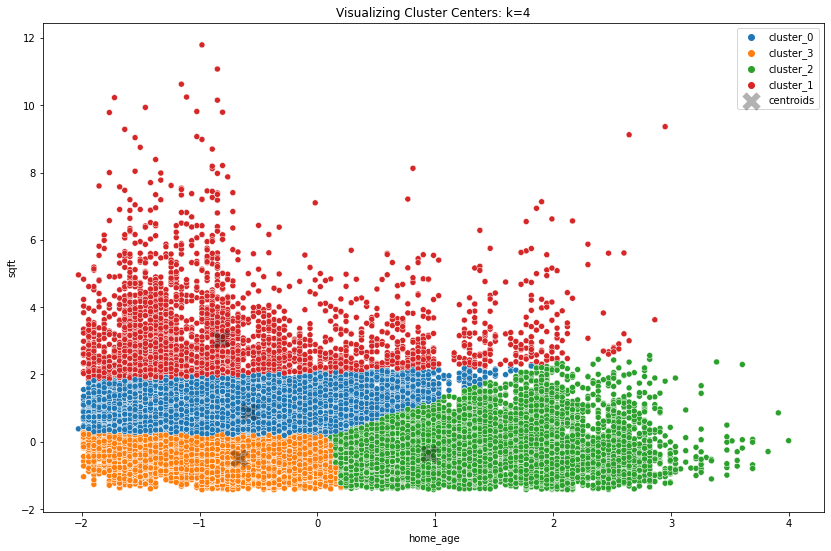

In [99]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'home_age', y = 'sqft', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'home_age', y = 'sqft', ax = plt.gca(), color ='k', alpha = 0.3, s = 200, marker = 'x', label = 'centroids', lw=6)

plt.title('Visualizing Cluster Centers: k=4')
plt.legend();

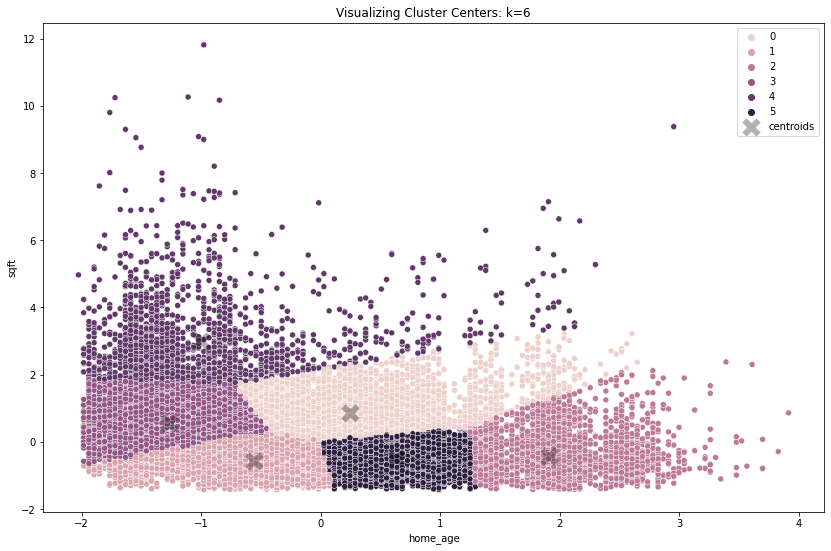

In [199]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'home_age', y = 'sqft', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'home_age', y = 'sqft', ax = plt.gca(), color ='k', alpha = 0.3, s = 200, marker = 'x', label = 'centroids', lw=6)

plt.title('Visualizing Cluster Centers: k=6')
plt.legend();

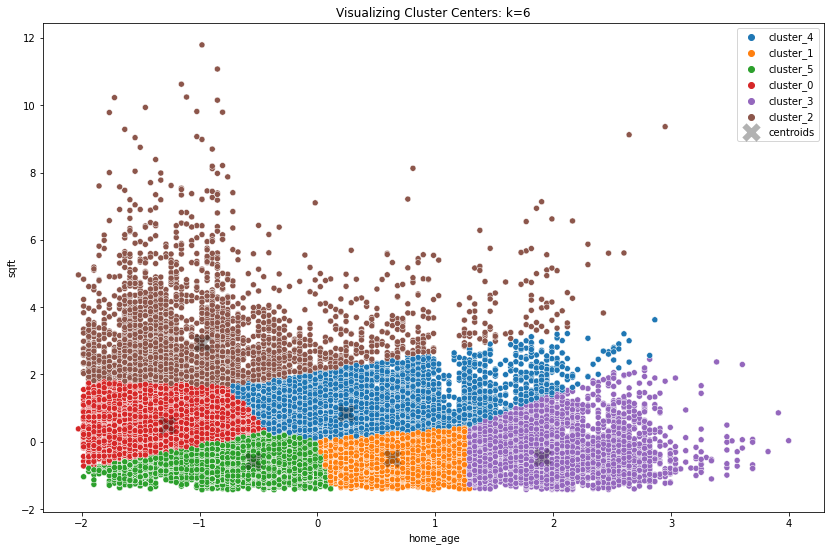

In [91]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'home_age', y = 'sqft', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'home_age', y = 'sqft', ax = plt.gca(), color ='k', alpha = 0.3, s = 200, marker = 'x', label = 'centroids', lw=6)

plt.title('Visualizing Cluster Centers: k=6')
plt.legend();

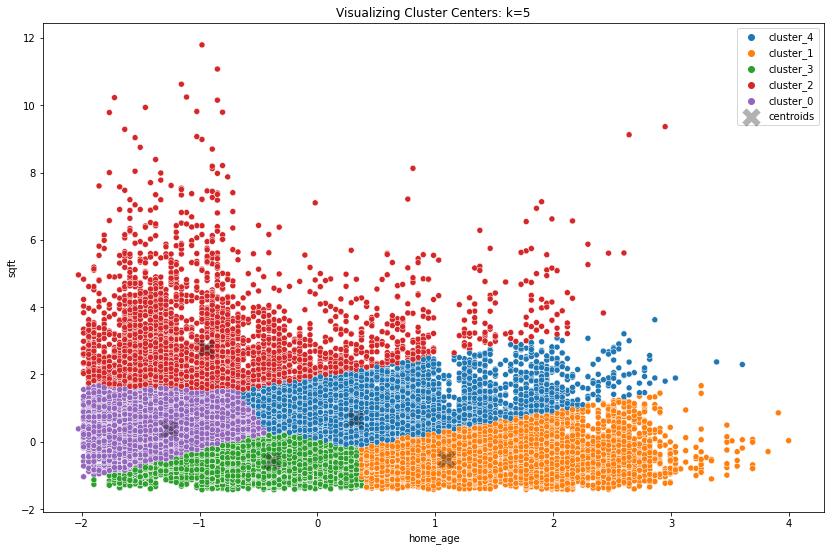

In [83]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'home_age', y = 'sqft', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'home_age', y = 'sqft', ax = plt.gca(), color ='k', alpha = 0.3, s = 200, marker = 'x', label = 'centroids', lw=6)

plt.title('Visualizing Cluster Centers: k=5')
plt.legend();

#### `lot_sqft`& `sqft`


In [100]:
X = df[['lot_sqft', 'sqft']]

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

k =2 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

99327.23311561046

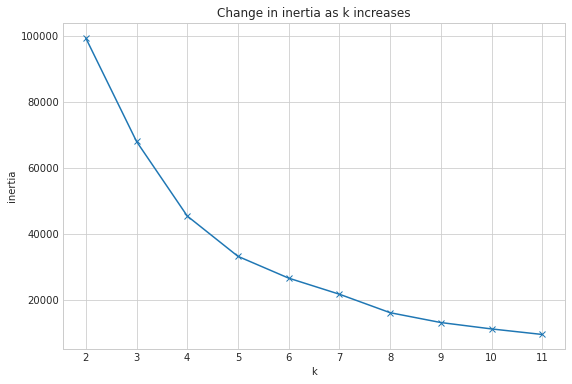

In [101]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [254]:
X_train.head(2)

bathrooms  bedrooms  property_quality    sqft  fips    latitude  \
parcelid                                                                    
14412168        2.5         3                 7  1426.0  6059  33525042.0   
14613733        2.5         2                 7  1305.0  6059  33567801.0   

            longitude  lot_sqft  rawcensustractandblock  regionidcity  ...  \
parcelid                                                               ...   
14412168 -117692408.0    6300.0            6.059042e+07       25459.0  ...   
14613733 -117719863.0    3267.0            6.059063e+07       37086.0  ...   

          yearbuilt  structure_value  home_value  land_value  taxamount  \
parcelid                                                                  
14412168       1987         172674.0    692000.0    519326.0    7021.26   
14613733       1995         152831.0    405348.0    252517.0    4071.24   

          transactiondate  county  home_age logerror_quartiles cluster  
parcelid                                                                
14412168       2017-05-05  Orange        34                 q3       5  
14613733       2017-06-28  Orange        26                 q3       5  

[2 rows x 23 columns]

In [318]:
# define independent variables for k-means
# this is creating a 2col df of the features
X = X_train_scaled[['lot_sqft', 'sqft']]
X.head(2)

lot_sqft      sqft
parcelid                    
14412168 -0.201040 -0.362494
14613733 -0.230186 -0.501328

In [351]:
# define independent variables for k-means
# this is creating a 2col df of the features
X = df[['lot_sqft', 'sqft']]
X.head(2)

lot_sqft    sqft
parcelid                  
10711855    9158.0  2107.0
10711877    9035.0  1882.0

In [352]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [353]:
X_scaled.head(2)

lot_sqft      sqft
10711855 -0.156969  0.417978
10711877 -0.158007  0.160339

In [354]:
#define the thing
kmeans = KMeans(n_clusters=6)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([1, 1, 1, ..., 1, 0, 1], dtype=int32)

In [355]:
# make a new column names cluster in X_scaled dataframe

df['lsxsqftcluster'] = kmeans.predict(X_scaled)
df.head(2)

bathrooms  bedrooms  property_quality    sqft  fips    latitude  \
parcelid                                                                    
10711855        2.0         3                 8  2107.0  6037  34222559.0   
10711877        2.0         4                 8  1882.0  6037  34220261.0   

            longitude  lot_sqft  rawcensustractandblock  regionidcity  ...  \
parcelid                                                               ...   
10711855 -118617387.0    9158.0            6.037113e+07       12447.0  ...   
10711877 -118616409.0    9035.0            6.037113e+07       12447.0  ...   

          home_value  land_value  taxamount  logerror  transactiondate  \
parcelid                                                                 
10711855    624139.0    374484.0    7659.36 -0.007357       2017-07-07   
10711877    660000.0    407000.0    8123.91  0.021066       2017-08-29   

               county  home_age  logerror_quartiles  cluster lsxsqftcluster  
parcelid                                                                     
10711855  Los_Angeles        49                  q2        5              1  
10711877  Los_Angeles        49                  q3        5              1  

[2 rows x 25 columns]

In [321]:
# make a new column names cluster in X_scaled dataframe

X_train['lsxsqftcluster'] = kmeans.predict(X_scaled)

X_train_scaled['lsxsqftcluster'] = kmeans.predict(X_scaled)

X_scaled['lsxsqftcluster'] = kmeans.predict(X_scaled)

X_scaled.head()

lot_sqft      sqft  lsxsqftcluster
14412168 -0.201040 -0.362494               0
14613733 -0.230186 -0.501328               0
13001890 -0.195966  0.050565               3
14606294 -0.191766 -0.633278               0
11624931 -0.202962  0.080398               3

In [322]:
X_train_scaled.head(2)

bathrooms  bedrooms  property_quality      sqft      fips  latitude  \
parcelid                                                                        
14412168   0.245687 -0.019039           0.18063 -0.362494  0.453215 -1.799118   
14613733   0.245687 -1.023891           0.18063 -0.501328  0.453215 -1.639367   

          longitude  lot_sqft  rawcensustractandblock  regionidcity  ...  \
parcelid                                                             ...   
14412168   1.392472 -0.201040                0.444227     -0.174458  ...   
14613733   1.317247 -0.230186                0.445194      0.078233  ...   

          young_avghome  veteran_avghome  lghome  smlot_smhome  smlot_avghome  \
parcelid                                                                        
14412168              0                0       1             1              0   
14613733              0                0       1             1              0   

          smlot_lghome  mdlot  lglot  xllot  lsxsqftcluster  
parcelid                                                     
14412168             0      0      0      0               0  
14613733             0      0      0      0               0  

[2 rows x 32 columns]

In [261]:
# Cluster Centers aka centroids. The output is scaled!!
kmeans.cluster_centers_

array([[-1.27632878e-01, -5.49611904e-01],
       [-1.50809059e-01,  6.26452740e-01],
       [-7.34885622e-02,  2.72503188e+00],
       [ 1.01516598e+01, -3.03756557e-01],
       [ 6.67286121e+01,  3.67968270e-02],
       [ 2.69227872e+00, -5.63667479e-01]])

In [262]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

lot_sqft      sqft
0  -0.127633 -0.549612
1  -0.150809  0.626453
2  -0.073489  2.725032
3  10.151660 -0.303757
4  66.728612  0.036797
5   2.692279 -0.563667

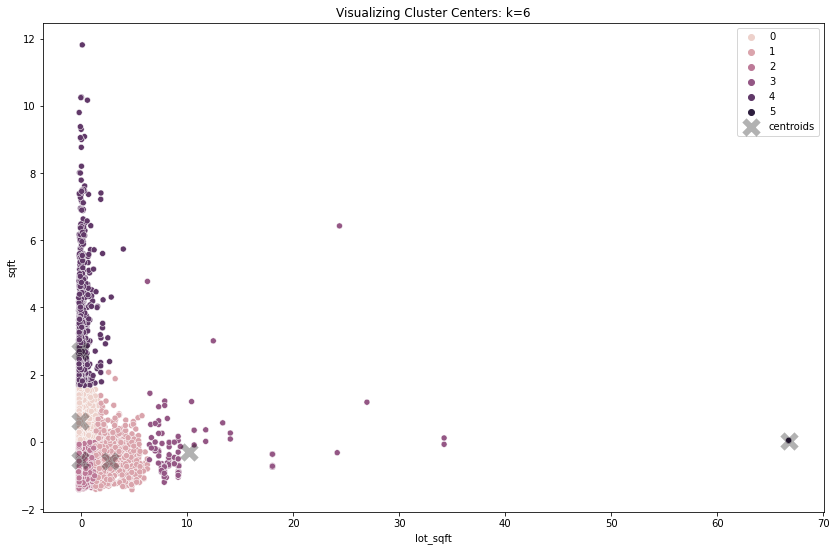

In [210]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'lot_sqft', y = 'sqft', data = X_scaled, hue = 'lsxsqftcluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'lot_sqft', y = 'sqft', ax = plt.gca(), color ='k', alpha = 0.3, s = 200, marker = 'x', label = 'centroids', lw=6)

plt.title('Visualizing Cluster Centers: k=6')
plt.legend();

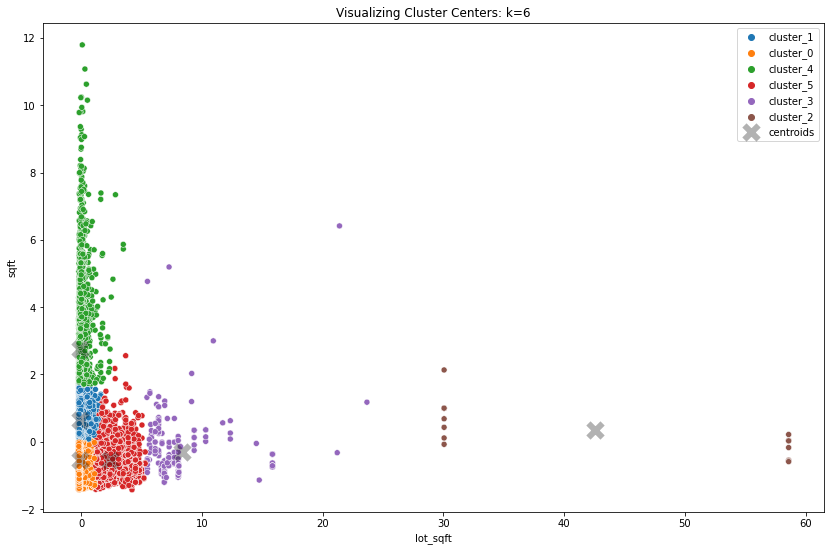

In [117]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'lot_sqft', y = 'sqft', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'lot_sqft', y = 'sqft', ax = plt.gca(), color ='k', alpha = 0.3, s = 200, marker = 'x', label = 'centroids', lw=6)

plt.title('Visualizing Cluster Centers: k=6')
plt.legend();

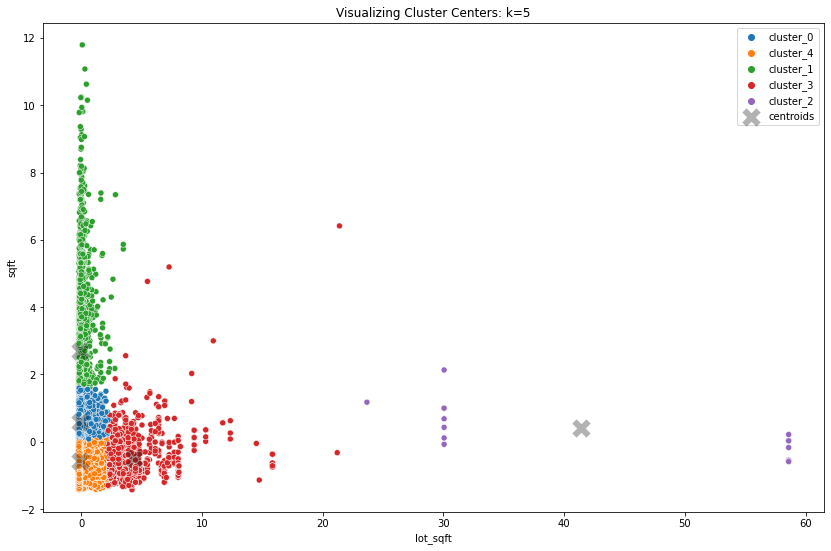

In [109]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'lot_sqft', y = 'sqft', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'lot_sqft', y = 'sqft', ax = plt.gca(), color ='k', alpha = 0.3, s = 200, marker = 'x', label = 'centroids', lw=6)

plt.title('Visualizing Cluster Centers: k=5')
plt.legend();

#### `home_value` & `sqft`

In [119]:
X = df[['home_value', 'sqft']]

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

k =2 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

73360.85154493185

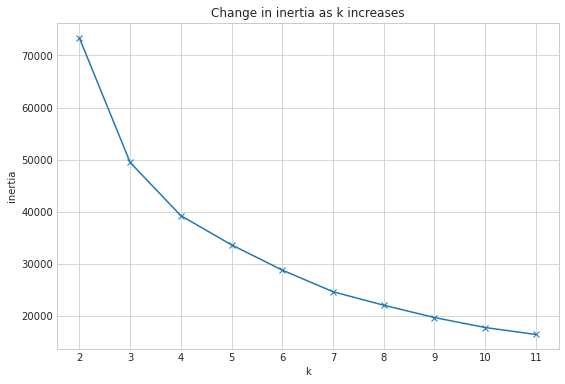

In [120]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [137]:
# define independent variables for k-means
# this is creating a 2col df of the features
X = df[['home_value', 'sqft']]
X.head(2)

home_value    sqft
parcelid                    
10711855    624139.0  2107.0
10711877    660000.0  1882.0

In [138]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [139]:
X_scaled.head(2)

home_value      sqft
10711855    0.341716  0.417978
10711877    0.420021  0.160339

In [140]:
#define the thing
kmeans = KMeans(n_clusters=6)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([5, 5, 5, ..., 3, 5, 3], dtype=int32)

In [141]:
# make a new column names cluster in X_scaled dataframe

X_scaled['cluster'] = kmeans.predict(X_scaled)
X_scaled['cluster'] = 'cluster_' + X_scaled.cluster.astype(str)
X_scaled.head()

home_value      sqft    cluster
10711855    0.341716  0.417978  cluster_5
10711877    0.420021  0.160339  cluster_5
10711888    0.164374  0.160339  cluster_5
10711910   -0.850755 -0.303412  cluster_1
10711923   -0.113954  0.201561  cluster_5

In [142]:
# Cluster Centers aka centroids. The output is scaled!!
kmeans.cluster_centers_

array([[ 1.81843783,  0.52070699],
       [-0.51704897, -0.6986785 ],
       [ 1.66260863,  2.72218901],
       [ 0.17870192,  1.10937631],
       [ 5.50372754,  3.27723367],
       [-0.06512543, -0.03632508]])

In [143]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

home_value      sqft
0    1.818438  0.520707
1   -0.517049 -0.698678
2    1.662609  2.722189
3    0.178702  1.109376
4    5.503728  3.277234
5   -0.065125 -0.036325

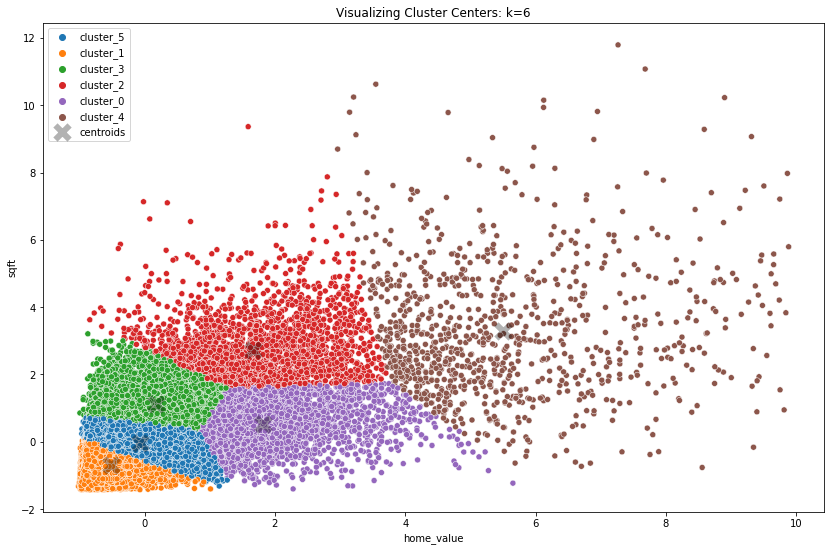

In [144]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'home_value', y = 'sqft', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'home_value', y = 'sqft', ax = plt.gca(), color ='k', alpha = 0.3, s = 200, marker = 'x', label = 'centroids', lw=6)

plt.title('Visualizing Cluster Centers: k=6')
plt.legend();

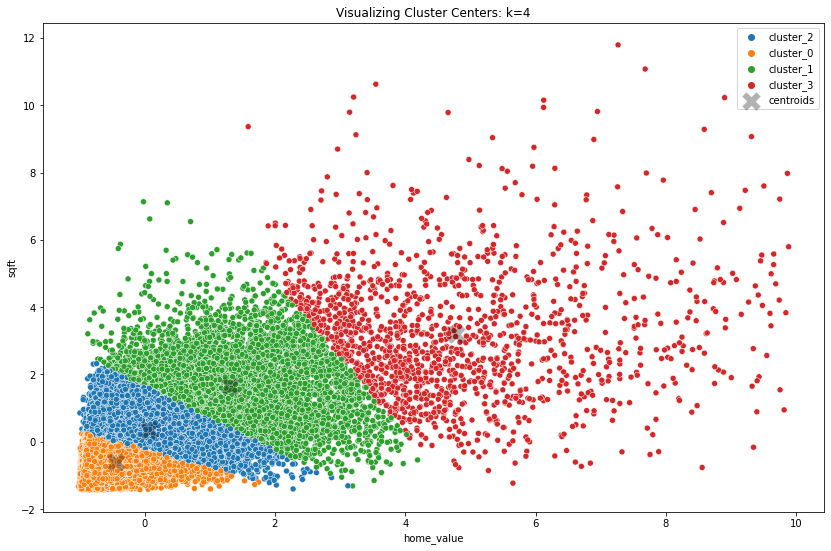

In [136]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'home_value', y = 'sqft', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'home_value', y = 'sqft', ax = plt.gca(), color ='k', alpha = 0.3, s = 200, marker = 'x', label = 'centroids', lw=6)

plt.title('Visualizing Cluster Centers: k=4')
plt.legend();

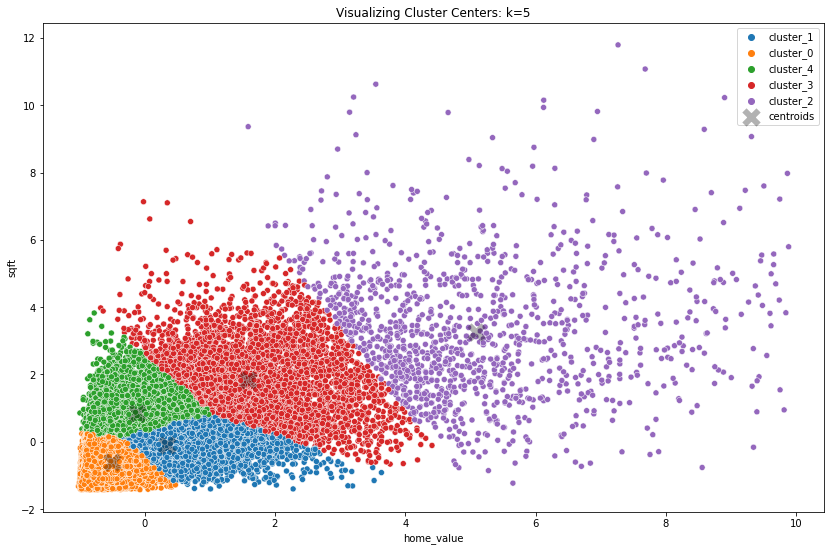

In [128]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'home_value', y = 'sqft', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'home_value', y = 'sqft', ax = plt.gca(), color ='k', alpha = 0.3, s = 200, marker = 'x', label = 'centroids', lw=6)

plt.title('Visualizing Cluster Centers: k=5')
plt.legend();

In [145]:
X_train_scaled.head(2)

bathrooms  bedrooms  property_quality      sqft      fips  latitude  \
parcelid                                                                        
14412168   0.245687 -0.019039           0.18063 -0.362494  0.453215 -1.799118   
14613733   0.245687 -1.023891           0.18063 -0.501328  0.453215 -1.639367   

          longitude  lot_sqft  rawcensustractandblock  regionidcity  zip_code  \
parcelid                                                                        
14412168   1.392472 -0.201040                0.444227     -0.174458  0.093933   
14613733   1.317247 -0.230186                0.445194      0.078233  0.090699   

           roomcnt  unitcnt  yearbuilt  structure_value  home_value  \
parcelid                                                              
14412168 -0.542668      0.0   0.759714        -0.054188    0.486809   
14613733 -0.542668      0.0   1.109119        -0.164230   -0.135770   

          land_value  taxamount  home_age  
parcelid                                   
14412168    0.711359   0.245368 -0.759714  
14613733   -0.100047  -0.306997 -1.109119

In [146]:
X_scaled.head()

home_value      sqft    cluster
10711855    0.341716  0.417978  cluster_5
10711877    0.420021  0.160339  cluster_5
10711888    0.164374  0.160339  cluster_5
10711910   -0.850755 -0.303412  cluster_1
10711923   -0.113954  0.201561  cluster_5

In [263]:
X_train.head(2)

bathrooms  bedrooms  property_quality    sqft  fips    latitude  \
parcelid                                                                    
14412168        2.5         3                 7  1426.0  6059  33525042.0   
14613733        2.5         2                 7  1305.0  6059  33567801.0   

            longitude  lot_sqft  rawcensustractandblock  regionidcity  ...  \
parcelid                                                               ...   
14412168 -117692408.0    6300.0            6.059042e+07       25459.0  ...   
14613733 -117719863.0    3267.0            6.059063e+07       37086.0  ...   

          structure_value  home_value  land_value  taxamount  transactiondate  \
parcelid                                                                        
14412168         172674.0    692000.0    519326.0    7021.26       2017-05-05   
14613733         152831.0    405348.0    252517.0    4071.24       2017-06-28   

          county  home_age  logerror_quartiles cluster lsxsqftcluster  
parcelid                                                               
14412168  Orange        34                  q3       5              0  
14613733  Orange        26                  q3       5              0  

[2 rows x 24 columns]

In [275]:
cluster_dummies = pd.get_dummies(X_train.cluster, prefix='homeagexsqft')

In [283]:
cluster_dummies = cluster_dummies.rename(columns={"homeagexsqft_0": "young_smhome", "homeagexsqft_1": "middleaged_smhome", "homeagexsqft_2": "old_smhome", "homeagexsqft_3": "young_avghome", "homeagexsqft_4": "veteran_avghome", "homeagexsqft_5": "lghome"})

In [284]:
cluster_dummies

young_smhome  middleaged_smhome  old_smhome  young_avghome  \
parcelid                                                               
14412168             0                  0           0              0   
14613733             0                  0           0              0   
13001890             0                  0           0              0   
14606294             0                  0           0              0   
11624931             0                  0           0              1   
...                ...                ...         ...            ...   
12156787             0                  1           0              0   
13834740             0                  1           0              0   
12127048             0                  1           0              0   
11877531             0                  0           0              0   
12401020             0                  0           0              0   

          veteran_avghome  lghome  
parcelid                           
14412168                0       1  
14613733                0       1  
13001890                0       1  
14606294                0       1  
11624931                0       0  
...                   ...     ...  
12156787                0       0  
13834740                0       0  
12127048                0       0  
11877531                1       0  
12401020                1       0  

[40217 rows x 6 columns]

In [277]:
lsxsqftcluster_dummies = pd.get_dummies(X_train.lsxsqftcluster, prefix='lotsizexsqft')

In [281]:
lsxsqftcluster_dummies = lsxsqftcluster_dummies.rename(columns={"lotsizexsqft_0": "smlot_smhome", "lotsizexsqft_1": "smlot_avghome", "lotsizexsqft_2": "smlot_lghome", "lotsizexsqft_3": "mdlot", "lotsizexsqft_4": "lglot", "lotsizexsqft_5": "xllot"})

In [282]:
lsxsqftcluster_dummies

smlot_smhome  smlot_avghome  smlot_lghome  mdlot  lglot  xllot
parcelid                                                                
14412168             1              0             0      0      0      0
14613733             1              0             0      0      0      0
13001890             0              1             0      0      0      0
14606294             1              0             0      0      0      0
11624931             0              1             0      0      0      0
...                ...            ...           ...    ...    ...    ...
12156787             1              0             0      0      0      0
13834740             1              0             0      0      0      0
12127048             1              0             0      0      0      0
11877531             0              1             0      0      0      0
12401020             0              1             0      0      0      0

[40217 rows x 6 columns]

In [286]:
# append dummy df cols to the original df. 
X_train = pd.concat([X_train, cluster_dummies, lsxsqftcluster_dummies], axis=1)

In [287]:
X_train = X_train.drop(['lsxsqftcluster', 'cluster'], axis=1)

In [288]:
X_train.head(2).T

parcelid                   14412168     14613733
bathrooms                       2.5          2.5
bedrooms                          3            2
property_quality                  7            7
sqft                           1426         1305
fips                           6059         6059
latitude                 3.3525e+07  3.35678e+07
longitude              -1.17692e+08  -1.1772e+08
lot_sqft                       6300         3267
rawcensustractandblock  6.05904e+07  6.05906e+07
regionidcity                  25459        37086
zip_code                      96987        96974
roomcnt                           0            0
unitcnt                           1            1
yearbuilt                      1987         1995
structure_value              172674       152831
home_value                   692000       405348
land_value                   519326       252517
taxamount                   7021.26      4071.24
transactiondate          2017-05-05   2017-06-28
county                       Orange       Orange
home_age                         34           26
logerror_quartiles               q3           q3
young_smhome                      0            0
middleaged_smhome                 0            0
old_smhome                        0            0
young_avghome                     0            0
veteran_avghome                   0            0
lghome                            1            1
smlot_smhome                      1            1
smlot_avghome                     0            0
smlot_lghome                      0            0
mdlot                             0            0
lglot                             0            0
xllot                             0            0

In [356]:
cluster_dummies1 = pd.get_dummies(df.cluster, prefix='homeagexsqft')

In [357]:
cluster_dummies1 = cluster_dummies1.rename(columns={"homeagexsqft_0": "young_smhome", "homeagexsqft_1": "middleaged_smhome", "homeagexsqft_2": "old_smhome", "homeagexsqft_3": "young_avghome", "homeagexsqft_4": "veteran_avghome", "homeagexsqft_5": "lghome"})

In [358]:
cluster_dummies1

young_smhome  middleaged_smhome  old_smhome  young_avghome  \
parcelid                                                                
10711855              0                  0           0              0   
10711877              0                  0           0              0   
10711888              0                  0           0              0   
10711910              0                  1           0              0   
10711923              0                  0           0              0   
...                 ...                ...         ...            ...   
93577187              0                  0           0              1   
162960516             0                  0           0              1   
162960529             1                  0           0              0   
162960596             0                  1           0              0   
162960814             1                  0           0              0   

           veteran_avghome  lghome  
parcelid                            
10711855                 0       1  
10711877                 0       1  
10711888                 0       1  
10711910                 0       0  
10711923                 0       1  
...                    ...     ...  
93577187                 0       0  
162960516                0       0  
162960529                0       0  
162960596                0       0  
162960814                0       0  

[71818 rows x 6 columns]

In [359]:
lsxsqftcluster_dummies1 = pd.get_dummies(df.lsxsqftcluster, prefix='lotsizexsqft')

In [360]:
lsxsqftcluster_dummies1 = lsxsqftcluster_dummies1.rename(columns={"lotsizexsqft_0": "smlot_smhome", "lotsizexsqft_1": "smlot_avghome", "lotsizexsqft_2": "smlot_lghome", "lotsizexsqft_3": "mdlot", "lotsizexsqft_4": "lglot", "lotsizexsqft_5": "xllot"})

In [361]:
lsxsqftcluster_dummies1

smlot_smhome  smlot_avghome  smlot_lghome  mdlot  lglot  xllot
parcelid                                                                 
10711855              0              1             0      0      0      0
10711877              0              1             0      0      0      0
10711888              0              1             0      0      0      0
10711910              1              0             0      0      0      0
10711923              0              1             0      0      0      0
...                 ...            ...           ...    ...    ...    ...
93577187              1              0             0      0      0      0
162960516             1              0             0      0      0      0
162960529             0              1             0      0      0      0
162960596             1              0             0      0      0      0
162960814             0              1             0      0      0      0

[71818 rows x 6 columns]

In [362]:
# append dummy df cols to the original df. 
df = pd.concat([df, cluster_dummies1, lsxsqftcluster_dummies1], axis=1)

In [363]:
df.head(2).T

parcelid                   10711855     10711877
bathrooms                         2            2
bedrooms                          3            4
property_quality                  8            8
sqft                           2107         1882
fips                           6037         6037
latitude                3.42226e+07  3.42203e+07
longitude              -1.18617e+08 -1.18616e+08
lot_sqft                       9158         9035
rawcensustractandblock  6.03711e+07  6.03711e+07
regionidcity                  12447        12447
zip_code                      96339        96339
roomcnt                           0            0
unitcnt                           1            1
yearbuilt                      1972         1972
structure_value              249655       253000
home_value                   624139       660000
land_value                   374484       407000
taxamount                   7659.36      8123.91
logerror                -0.00735729    0.0210663
transactiondate          2017-07-07   2017-08-29
county                  Los_Angeles  Los_Angeles
home_age                         49           49
logerror_quartiles               q2           q3
cluster                           5            5
lsxsqftcluster                    1            1
young_smhome                      0            0
middleaged_smhome                 0            0
old_smhome                        0            0
young_avghome                     0            0
veteran_avghome                   0            0
lghome                            1            1
smlot_smhome                      0            0
smlot_avghome                     1            1
smlot_lghome                      0            0
mdlot                             0            0
lglot                             0            0
xllot                             0            0

In [365]:
def get_object_cols(df):
    '''
    This function takes in a dataframe and identifies the columns that are object types
    and returns a list of those column names. 
    '''
    # create a mask of columns whether they are object type or not
    mask = np.array((df.dtypes == "object") | (df.dtypes == "category"))

        
    # get a list of the column names that are objects (from the mask)
    object_cols = df.iloc[:, mask].columns.tolist()
    
    return object_cols

In [366]:
def get_numeric_X_cols(train, object_cols):
    '''
    takes in a dataframe and list of object column names
    and returns a list of all other columns names, the non-objects. 
    '''
    numeric_cols = [col for col in train.columns.values if col not in object_cols]
    
    return numeric_cols

In [367]:
def Standard_Scaler(X_train, X_validate, X_test):
    """
    Takes in X_train, X_validate and X_test dfs with numeric values only
    Returns scaler, X_train_scaled, X_validate_scaled, X_test_scaled dfs
    """
    scaler = sklearn.preprocessing.StandardScaler().fit(X_train[numeric_cols])
    
    X_train_scaled = pd.DataFrame(scaler.transform(X_train[numeric_cols]), index = X_train.index, columns = numeric_cols)
    X_validate_scaled = pd.DataFrame(scaler.transform(X_validate[numeric_cols]), index = X_validate.index, columns = numeric_cols)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test[numeric_cols]), index = X_test.index, columns = numeric_cols)
                                 
    return scaler, X_train_scaled, X_validate_scaled, X_test_scaled

In [368]:
object_cols = get_object_cols(df)
object_cols

['transactiondate', 'county', 'logerror_quartiles']

In [369]:
df, train, validate, test = w.split_zillow(df)

In [370]:
numeric_cols = get_numeric_X_cols(train, object_cols)

In [371]:
numeric_cols

['bathrooms',
 'bedrooms',
 'property_quality',
 'sqft',
 'fips',
 'latitude',
 'longitude',
 'lot_sqft',
 'rawcensustractandblock',
 'regionidcity',
 'zip_code',
 'roomcnt',
 'unitcnt',
 'yearbuilt',
 'structure_value',
 'home_value',
 'land_value',
 'taxamount',
 'logerror',
 'home_age',
 'cluster',
 'lsxsqftcluster',
 'young_smhome',
 'middleaged_smhome',
 'old_smhome',
 'young_avghome',
 'veteran_avghome',
 'lghome',
 'smlot_smhome',
 'smlot_avghome',
 'smlot_lghome',
 'mdlot',
 'lglot',
 'xllot']

In [372]:
numeric_cols = ['bathrooms',
 'bedrooms',
 'property_quality',
 'sqft',
 'fips',
 'latitude',
 'longitude',
 'lot_sqft',
 'rawcensustractandblock',
 'regionidcity',
 'zip_code',
 'roomcnt',
 'unitcnt',
 'yearbuilt',
 'structure_value',
 'home_value',
 'land_value',
 'taxamount',
 'home_age',
 'cluster',
 'lsxsqftcluster',
 'young_smhome',
 'middleaged_smhome',
 'old_smhome',
 'young_avghome',
 'veteran_avghome',
 'lghome',
 'smlot_smhome',
 'smlot_avghome',
 'smlot_lghome',
 'mdlot',
 'lglot',
 'xllot']

In [373]:
X_train, y_train, X_validate, y_validate, X_test, y_test = features_target_split(df, "logerror")

In [374]:
scaler, X_train_scaled, X_validate_scaled, X_test_scaled = Standard_Scaler(X_train, X_validate, X_test)

### Modeling the CLUSTERS

In [375]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

In [376]:
y_train.head(2)

logerror
parcelid          
14412168  0.013504
14613733  0.028000

### ID Baseline

In [377]:
# 1. compute pred_median
home_value_baseline_median = y_train['logerror'].median()
y_train['logerror_baseline_median'] = home_value_baseline_median
y_validate['logerror_baseline_median'] = home_value_baseline_median

# 2. compute pred_mean
home_value_baseline_mean = y_train['logerror'].mean()
y_train['logerror_baseline_mean'] = home_value_baseline_mean
y_validate['logerror_baseline_mean'] = home_value_baseline_mean

#check to see which is better
y_train.head()

logerror  logerror_baseline_median  logerror_baseline_mean
parcelid                                                            
14412168  0.013504                  0.006313                 0.01603
14613733  0.028000                  0.006313                 0.01603
13001890 -0.014972                  0.006313                 0.01603
14606294 -0.001737                  0.006313                 0.01603
11624931  0.073019                  0.006313                 0.01603

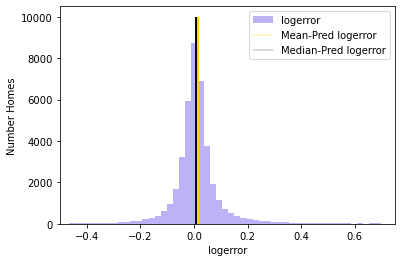

In [378]:
# plot to visualize actual vs predicted. 

plt.hist(y_train.logerror, color='mediumslateblue', bins=300, alpha=.5, label="logerror")
plt.vlines(y_train.logerror_baseline_mean, 0, 10000, color='gold', alpha=.3, label="Mean-Pred logerror")
plt.vlines(y_train.logerror_baseline_median, 0, 10000, color='black', alpha=.2, label="Median-Pred logerror")
plt.xlim(-0.5, 0.75)
plt.xlabel("logerror")
plt.ylabel("Number Homes")
plt.legend()
plt.show()

***I will move forward with the median as it is performing better.***

In [379]:
# 3. RMSE of hv_pred_median
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_baseline_median) ** (0.5)
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_baseline_median) ** (0.5)

print(f"""
      BASELINE:
      RMSE using Median
      Train/In-Sample: {round(rmse_train, 2)}
      Validate/Out-of-Sample: {round(rmse_validate, 2)}
        """)


      BASELINE:
      RMSE using Median
      Train/In-Sample: 0.16
      Validate/Out-of-Sample: 0.17
        


In [380]:
from sklearn.metrics import explained_variance_score
metric_df = pd.DataFrame(data=[{
    'model': 'median_baseline',
    'RMSE_train': round(rmse_train, 2),    
    'RMSE_validate': round(rmse_validate, 2),
    'r^2_validate': explained_variance_score(y_validate.logerror, y_validate.logerror_baseline_median)}])

In [381]:
metric_df = metric_df.set_index("model")

In [382]:
metric_df

RMSE_train  RMSE_validate  r^2_validate
model                                                   
median_baseline        0.16           0.17           0.0

In [402]:
def select_kbest(X, y, n):
    '''
    select_kbest takes in the 
    predictors (X), 
    the target (y), and 
    the number of features to select (k) and 
    returns the names of the top k selected features based on the SelectKBest class
    '''
    
    # parameters: f_regression stats test
    f_selector = SelectKBest(f_regression, k= n)
    
    # find the top 2 X-feats correlated with y
    f_selector.fit(X, y)
    
    # boolean mask of whether the column was selected or not. 
    feature_mask = f_selector.get_support()
    
    # get list of top K features. 
    f_feature = X.iloc[:,feature_mask].columns.tolist()
    
    return f_feature

In [403]:
def rfe(X, y, n):
    '''
    rfe takes in the 
    predictors (X), 
    the target (y), and 
    the number of features to select (k) and 
    returns the names of the top k selected features based on the SelectKBest class
    '''
    
    # initialize the ML algorithm
    lm = LinearRegression()
    
    # create the rfe object, indicating the ML object (lm) and the number of features I want to end up with. 
    rfe = RFE(lm, n)
    
    # fit the data using RFE
    rfe.fit(X,y)  
    
    # get the mask of the columns selected
    feature_mask = rfe.support_
    
    # get list of the column names. 
    rfe_feature = X.iloc[:,feature_mask].columns.tolist()
    
    return rfe_feature


In [410]:
y_train = y_train['logerror'].squeeze()

In [411]:
y_train

parcelid
14412168    0.013504
14613733    0.028000
13001890   -0.014972
14606294   -0.001737
11624931    0.073019
              ...   
12156787   -0.129673
13834740   -0.011071
12127048   -0.005504
11877531   -0.290877
12401020   -0.071271
Name: logerror, Length: 40217, dtype: float64

In [421]:
#feature importance

# get the features
f_feature = select_kbest(X_train_scaled, y_train, 3)
f_feature

['bedrooms', 'sqft', 'lsxsqftcluster']

In [422]:
rfe_feature = rfe(X_train_scaled, y_train, 3)
rfe_feature 

['lsxsqftcluster', 'smlot_smhome', 'smlot_avghome']

In [384]:
smlot_smhome_df = df[df.cluster == 0]
smlot_avghome_df = df[df.cluster == 1]
smlot_lghome_df = df[df.cluster == 2]
mdlot_df = df[df.cluster == 3]
lglot_df = df[df.cluster == 4]
xllot_df = df[df.cluster == 5]

In [385]:
xllot_df.head(2)

bathrooms  bedrooms  property_quality    sqft  fips    latitude  \
parcelid                                                                    
10711855        2.0         3                 8  2107.0  6037  34222559.0   
10711877        2.0         4                 8  1882.0  6037  34220261.0   

            longitude  lot_sqft  rawcensustractandblock  regionidcity  ...  \
parcelid                                                               ...   
10711855 -118617387.0    9158.0            6.037113e+07       12447.0  ...   
10711877 -118616409.0    9035.0            6.037113e+07       12447.0  ...   

          old_smhome  young_avghome  veteran_avghome  lghome  smlot_smhome  \
parcelid                                                                     
10711855           0              0                0       1             0   
10711877           0              0                0       1             0   

          smlot_avghome  smlot_lghome  mdlot  lglot xllot  
parcelid                                                   
10711855              1             0      0      0     0  
10711877              1             0      0      0     0  

[2 rows x 37 columns]

In [386]:
object_cols = get_object_cols(xllot_df)
object_cols

['transactiondate', 'county', 'logerror_quartiles']

In [414]:
smlot_avghome_df, slaftrain, slafvalidate, slaftest = w.split_zillow(smlot_avghome_df)

In [388]:
numeric_cols = get_numeric_X_cols(xlltrain, object_cols)

In [389]:
numeric_cols

['bathrooms',
 'bedrooms',
 'property_quality',
 'sqft',
 'fips',
 'latitude',
 'longitude',
 'lot_sqft',
 'rawcensustractandblock',
 'regionidcity',
 'zip_code',
 'roomcnt',
 'unitcnt',
 'yearbuilt',
 'structure_value',
 'home_value',
 'land_value',
 'taxamount',
 'logerror',
 'home_age',
 'cluster',
 'lsxsqftcluster',
 'young_smhome',
 'middleaged_smhome',
 'old_smhome',
 'young_avghome',
 'veteran_avghome',
 'lghome',
 'smlot_smhome',
 'smlot_avghome',
 'smlot_lghome',
 'mdlot',
 'lglot',
 'xllot']

In [390]:
numeric_cols = ['bathrooms',
 'bedrooms',
 'property_quality',
 'sqft',
 'fips',
 'latitude',
 'longitude',
 'lot_sqft',
 'rawcensustractandblock',
 'regionidcity',
 'zip_code',
 'roomcnt',
 'unitcnt',
 'yearbuilt',
 'structure_value',
 'home_value',
 'land_value',
 'taxamount',
 'home_age',
 'cluster',
 'lsxsqftcluster',
 'young_smhome',
 'middleaged_smhome',
 'old_smhome',
 'young_avghome',
 'veteran_avghome',
 'lghome',
 'smlot_smhome',
 'smlot_avghome',
 'smlot_lghome',
 'mdlot',
 'lglot',
 'xllot']

In [415]:
X_trainslaf, y_trainslaf, X_validateslaf, y_validateslaf, X_testslaf, y_testslaf = features_target_split(smlot_avghome_df, "logerror")

In [416]:
scaler, X_train_scaledslaf, X_validate_scaledslaf, X_test_scaledslaf = Standard_Scaler(X_trainslaf, X_validateslaf, X_testslaf)

In [417]:
X_train_scaledslaf.head(2).T

parcelid                14412168  14613733
bathrooms               0.245687  0.245687
bedrooms               -0.019039 -1.023891
property_quality        0.180630  0.180630
sqft                   -0.362494 -0.501328
fips                    0.453215  0.453215
latitude               -1.799118 -1.639367
longitude               1.392472  1.317247
lot_sqft               -0.201040 -0.230186
rawcensustractandblock  0.444227  0.445194
regionidcity           -0.174458  0.078233
zip_code                0.093933  0.090699
roomcnt                -0.542668 -0.542668
unitcnt                 0.000000  0.000000
yearbuilt               0.759714  1.109119
structure_value        -0.054188 -0.164230
home_value              0.486809 -0.135770
land_value              0.711359 -0.100047
taxamount               0.245368 -0.306997
home_age               -0.759714 -1.109119
cluster                 0.477798  0.477798
lsxsqftcluster         -0.575156 -0.575156
young_smhome           -0.409603 -0.409603
middleaged_smhome      -0.637869 -0.637869
old_smhome             -0.313696 -0.313696
young_avghome           1.572854  1.572854
veteran_avghome        -0.220890 -0.220890
lghome                 -0.408734 -0.408734
smlot_smhome            0.778819  0.778819
smlot_avghome          -0.643854 -0.643854
smlot_lghome           -0.023395 -0.023395
mdlot                  -0.146233 -0.146233
lglot                  -0.259208 -0.259208
xllot                  -0.007052 -0.007052

In [418]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_trainslaf = pd.DataFrame(y_trainslaf)
y_validateslaf = pd.DataFrame(y_validateslaf)

In [419]:
y_trainslaf.head()

logerror
parcelid          
14412168  0.013504
14613733  0.028000
13001890 -0.014972
14606294 -0.001737
11624931  0.073019

### • Train / Validate
#### Modeling: LinearRegression (OLS)

In [420]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train_scaledslaf, y_trainslaf.logerror)

# predict train
y_trainslaf['logerror_pred_lm'] = lm.predict(X_train_scaledslaf)

# evaluate: rmse
rmse_train_lm = mean_squared_error(y_trainslaf.logerror, y_trainslaf.logerror_pred_lm)**(0.5)

# predict validate
y_validateslaf['logerror_pred_lm'] = lm.predict(X_validate_scaledslaf)

# evaluate: rmse
rmse_validate_lm = mean_squared_error(y_validateslaf.logerror, y_validateslaf.logerror)**(0.5)

print(f"""
              BASELINE:
              
              RMSE using Median
              Train/In-Sample: {round(rmse_train, 2)}
              Validate/Out-of-Sample: {round(rmse_validate, 2)}

    RMSE for OLS using LinearRegression
    
    Training/In-Sample: {round(rmse_train_lm, 2)}
    Validation/Out-of-Sample: {round(rmse_validate_lm, 2)}
""")


              BASELINE:
              
              RMSE using Median
              Train/In-Sample: 0.16
              Validate/Out-of-Sample: 0.17

    RMSE for OLS using LinearRegression
    
    Training/In-Sample: 0.16
    Validation/Out-of-Sample: 0.0



In [435]:
y_testslaf = pd.DataFrame(y_testslaf)

#predict on test
y_testslaf['logerror_pred_lars'] = lm.predict(X_test_scaledslaf)

# evaluate: rmse
rmse_test = mean_squared_error(y_testslaf.logerror, y_testslaf.logerror_pred_lars)**(0.5)

print(f"""
    RMSE for OLS using LinearRegression
    
    Test/Out-of-Sample Performance: {rmse_test}
""")


    RMSE for OLS using LinearRegression
    
    Test/Out-of-Sample Performance: 0.16384543303712926



In [423]:
smlot_smhome_df, slshtrain, slshvalidate, slshtest = w.split_zillow(smlot_smhome_df)

In [424]:
X_trainslsh, y_trainslsh, X_validateslsh, y_validateslsh, X_testslsh, y_testslsh = features_target_split(smlot_smhome_df, "logerror")

In [433]:
X_testslsh.shape, y_testslsh.shape

((14364, 36), (14364, 1))

In [425]:
scaler, X_train_scaledslsh, X_validate_scaledslsh, X_test_scaledslsh = Standard_Scaler(X_trainslsh, X_validateslsh, X_testslsh)

In [426]:
X_train_scaledslsh.head(2).T

parcelid                14412168  14613733
bathrooms               0.245687  0.245687
bedrooms               -0.019039 -1.023891
property_quality        0.180630  0.180630
sqft                   -0.362494 -0.501328
fips                    0.453215  0.453215
latitude               -1.799118 -1.639367
longitude               1.392472  1.317247
lot_sqft               -0.201040 -0.230186
rawcensustractandblock  0.444227  0.445194
regionidcity           -0.174458  0.078233
zip_code                0.093933  0.090699
roomcnt                -0.542668 -0.542668
unitcnt                 0.000000  0.000000
yearbuilt               0.759714  1.109119
structure_value        -0.054188 -0.164230
home_value              0.486809 -0.135770
land_value              0.711359 -0.100047
taxamount               0.245368 -0.306997
home_age               -0.759714 -1.109119
cluster                 0.477798  0.477798
lsxsqftcluster         -0.575156 -0.575156
young_smhome           -0.409603 -0.409603
middleaged_smhome      -0.637869 -0.637869
old_smhome             -0.313696 -0.313696
young_avghome           1.572854  1.572854
veteran_avghome        -0.220890 -0.220890
lghome                 -0.408734 -0.408734
smlot_smhome            0.778819  0.778819
smlot_avghome          -0.643854 -0.643854
smlot_lghome           -0.023395 -0.023395
mdlot                  -0.146233 -0.146233
lglot                  -0.259208 -0.259208
xllot                  -0.007052 -0.007052

In [427]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_trainslsh = pd.DataFrame(y_trainslsh)
y_validateslsh = pd.DataFrame(y_validateslsh)

In [428]:
y_trainslsh.head()

logerror
parcelid          
14412168  0.013504
14613733  0.028000
13001890 -0.014972
14606294 -0.001737
11624931  0.073019

### • Train / Validate
#### Modeling: LinearRegression (OLS)

In [430]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train_scaledslsh, y_trainslsh.logerror)

# predict train
y_trainslsh['logerror_pred_lm'] = lm.predict(X_train_scaledslsh)

# evaluate: rmse
rmse_train_lm = mean_squared_error(y_trainslsh.logerror, y_trainslsh.logerror_pred_lm)**(0.5)

# predict validate
y_validateslsh['logerror_pred_lm'] = lm.predict(X_validate_scaledslsh)

# evaluate: rmse
rmse_validate_lm = mean_squared_error(y_validateslsh.logerror, y_validateslsh.logerror)**(0.5)

print(f"""
              BASELINE:
              
              RMSE using Median
              Train/In-Sample: {round(rmse_train, 2)}
              Validate/Out-of-Sample: {round(rmse_validate, 2)}

    RMSE for OLS using LinearRegression
    
    Training/In-Sample: {round(rmse_train_lm, 2)}
    Validation/Out-of-Sample: {rmse_validate_lm}
""")


              BASELINE:
              
              RMSE using Median
              Train/In-Sample: 0.16
              Validate/Out-of-Sample: 0.17

    RMSE for OLS using LinearRegression
    
    Training/In-Sample: 0.16
    Validation/Out-of-Sample: 0.0



#### LassoLars

In [437]:
# create the model object
# I will leave α as the defaulted 1 for now
# since DF has a small amt of features.
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train_scaledslsh, y_trainslsh.logerror)

# predict train
y_trainslsh['logerror_pred_lars'] = lars.predict(X_train_scaledslsh)

# evaluate: rmse
rmse_train_lars = mean_squared_error(y_trainslsh.logerror, y_trainslsh.logerror_pred_lars)**(0.5)

# predict validate
y_validateslsh['logerror_pred_lars'] = lars.predict(X_validate_scaledslsh)

# evaluate: rmse
rmse_validate_lars = mean_squared_error(y_validateslsh.logerror, y_validateslsh.logerror_pred_lars)**(0.5)

print(f"""
              BASELINE:
              
              RMSE using Median
              Train/In-Sample: {round(rmse_train, 2)}
              Validate/Out-of-Sample: {round(rmse_validate, 2)}
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: {round(rmse_train_lm, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_lm, 2)}

    RMSE for LassoLars
    
    Training/In-Sample: {round(rmse_train_lars, 2)}
    Validation/Out-of-Sample: {round(rmse_validate_lars, 2)}
""")


              BASELINE:
              
              RMSE using Median
              Train/In-Sample: 0.16
              Validate/Out-of-Sample: 0.17
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: 0.16
                Validation/Out-of-Sample: 0.0

    RMSE for LassoLars
    
    Training/In-Sample: 0.16
    Validation/Out-of-Sample: 0.17



#### TweedieRegressor (GLM)

In [438]:
# create the model object

glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train_scaledslsh, y_trainslsh.logerror)

# predict train
y_trainslsh['logerror_pred_glm'] = glm.predict(X_train_scaledslsh)

# evaluate: rmse
rmse_train_glm = mean_squared_error(y_trainslsh.logerror, y_trainslsh.logerror_pred_glm)**(0.5)

# predict validate
y_validateslsh['logerror_pred_glm'] = glm.predict(X_validate_scaledslsh)

# evaluate: rmse
rmse_validate_glm = mean_squared_error(y_validateslsh.logerror, y_validateslsh.logerror_pred_glm)**(0.5)

print(f"""
              BASELINE:
              
              RMSE using Median
              Train/In-Sample: {round(rmse_train, 2)}
              Validate/Out-of-Sample: {round(rmse_validate, 2)}
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: {round(rmse_train_lm, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_lm, 2)}

                RMSE for LassoLars
                
                Training/In-Sample: {round(rmse_train_lars, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_lars, 2)}
    
    RMSE for TweedieRegressor (GLM)
    power=1, alpha=0
    
    Training/In-Sample: {round(rmse_train_glm, 2)}
    Validation/Out-of-Sample: {round(rmse_validate_glm, 2)}
""")


ValueError: Some value(s) of y are out of the valid range for family TweedieDistribution

In [447]:
y_trainslsh.logerror.isnull().sum()

0

#### PolynomialFeatures

In [440]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train_scaledslsh)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate_scaledslsh)
X_test_degree2 = pf.transform(X_test_scaledslsh)

In [442]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_trainslsh.logerror)

# predict train
y_trainslsh['logerror_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train_lm2 = mean_squared_error(y_trainslsh.logerror, y_trainslsh.logerror_pred_lm2)**(0.5)

# predict validate
y_validateslsh['logerror_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate_lm2 = mean_squared_error(y_validateslsh.logerror, y_validateslsh.logerror_pred_lm2)**(0.5)

print(f"""
              BASELINE:
              
              RMSE using Median
              Train/In-Sample: {round(rmse_train, 5)}
              Validate/Out-of-Sample: {round(rmse_validate, 5)}
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: {round(rmse_train_lm, 5)}
                Validation/Out-of-Sample: {round(rmse_validate_lm, 5)}

                RMSE for LassoLars
                
                Training/In-Sample: {round(rmse_train_lars, 5)}
                Validation/Out-of-Sample: {round(rmse_validate_lars, 5)}

                
    
    RMSE for Polynomial Regressor
    degrees=2
    
    Training/In-Sample: {round(rmse_train_lm2, 5)}
    Validation/Out-of-Sample: {round(rmse_validate_lm2, 5)}
""")


              BASELINE:
              
              RMSE using Median
              Train/In-Sample: 0.16189
              Validate/Out-of-Sample: 0.17037
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: 0.1612
                Validation/Out-of-Sample: 0.0

                RMSE for LassoLars
                
                Training/In-Sample: 0.1616
                Validation/Out-of-Sample: 0.17012

                
    
    RMSE for Polynomial Regressor
    degrees=2
    
    Training/In-Sample: 0.1599
    Validation/Out-of-Sample: 1355312506254.8513



In [434]:
y_testslsh = pd.DataFrame(y_testslsh)

#predict on test
y_testslsh['logerror_pred_lars'] = lm.predict(X_test_scaledslsh)

# evaluate: rmse
rmse_test = mean_squared_error(y_testslsh.logerror, y_testslsh.logerror_pred_lars)**(0.5)

print(f"""
    RMSE for OLS using LinearRegression
    
    Test/Out-of-Sample Performance: {rmse_test}
""")


    RMSE for OLS using LinearRegression
    
    Test/Out-of-Sample Performance: 0.16384543303712926



### • Hypothesis testing

In [448]:
def correlation_test(nullh, alth, x, y):
    '''
    correlation_test will take in two arguments and 
    - plot a scatterplot of them
    - test the correlation
    return: the correlation coefficient, p, and if there is a linear relationship.
    '''
    
    splot = plt.scatter(x, y)
    
    null_hypothesis = nullh
    alternative_hypothesis = alth
    
    confidence_level = .95
    a = 1 - confidence_level 
    
    corr, p = stats.pearsonr(x, y)

    if p < a:
        print(f"Reject null statment: {null_hypothesis}")
        print("There is a linear relationship.")
        if 0 < corr < .6:
            print("Although, it is a positive weak one.")
        elif .6 < corr < 1:
            print("That is a stronger positive correlation.")
        elif -.6 < corr < 0:
            print("Although, it is a negative weak one.")
        elif -1 < corr < -.6:
            print("That is a stronger negative correlation.")
        
    else : 
        print("Fail to reject the null hypothesis.")
        
    print(f"""
    Correlation Coefficient: {corr}
    p: {p}
    
    """)
    return splot

TEST: There is a relationship between `home_age` and `logerror`.

In [451]:
#assign your null hypothesis
nullh = "No correlation between home_age and logerror."

#and your alternative hypothesis
alth = "There IS a correlation between home_age and logerror."

#the feature you are testing
x1 = X_train_scaled.home_age

#against your target
y1 = y_train

Reject null statment: No correlation between home_age and logerror.
There is a linear relationship.
Although, it is a negative weak one.

    Correlation Coefficient: -0.01137660866167712
    p: 0.02251957970464049
    
    


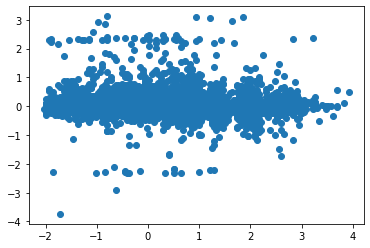

In [452]:
correlation_test(nullh, alth, x1, y1)

TEST: There is a relationship between lotsize and logerror.

In [454]:
#assign your null hypothesis
nullh = "No correlation between lot_sqft and logerror."

#and your alternative hypothesis
alth = "There IS a correlation between lot_sqft and logerror."

#the feature you are testing
x2 = X_train_scaled.lot_sqft

#against your target
y2 = y_train

Fail to reject the null hypothesis.

    Correlation Coefficient: 0.009421557906056874
    p: 0.05883837593317176
    
    


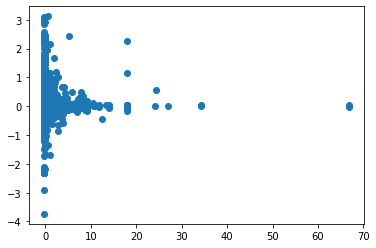

In [455]:
correlation_test(nullh, alth, x2, y2)

TEST: There is a relationship between home_value and logerror.

In [456]:
#assign your null hypothesis
nullh = "No correlation between home_value and logerror."

#and your alternative hypothesis
alth = "There IS a correlation between home_value and logerror."

#the feature you are testing
x3 = X_train_scaled.home_value

#against your target
y3 = y_train

Fail to reject the null hypothesis.

    Correlation Coefficient: 0.007797973221461495
    p: 0.11786583873958208
    
    


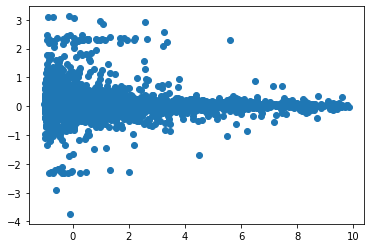

In [457]:
correlation_test(nullh, alth, x3, y3)

In [453]:
X_train_scaled.columns.to_list()

['bathrooms',
 'bedrooms',
 'property_quality',
 'sqft',
 'fips',
 'latitude',
 'longitude',
 'lot_sqft',
 'rawcensustractandblock',
 'regionidcity',
 'zip_code',
 'roomcnt',
 'unitcnt',
 'yearbuilt',
 'structure_value',
 'home_value',
 'land_value',
 'taxamount',
 'home_age',
 'cluster',
 'lsxsqftcluster',
 'young_smhome',
 'middleaged_smhome',
 'old_smhome',
 'young_avghome',
 'veteran_avghome',
 'lghome',
 'smlot_smhome',
 'smlot_avghome',
 'smlot_lghome',
 'mdlot',
 'lglot',
 'xllot']

TEST: `smlot_smhome` affects `logerror` more than `smlot_avghome`. 

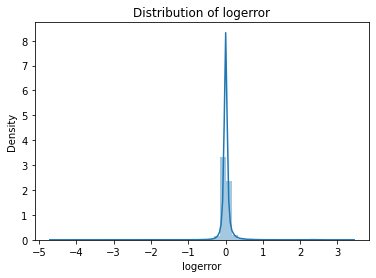

In [474]:
# T-tests assume that the continous variable is normally distributed; quick check of this.

sns.distplot(df.logerror)
plt.title('Distribution of logerror')
plt.show()

In [475]:
print(f'The mean is: {df.logerror.mean()}, and the median is {df.logerror.median()}')
print('This is close enough to normal to continue.')

The mean is: 0.01633163265277311, and the median is 0.00658498373551
This is close enough to normal to continue.


In [476]:
null_hypothesis = "Mean logerror is the same for small home on small lots & Average sized homes on small lots."
alternative_hypothesis = "Mean logerror for small home on small lots & Average sized homes on small lots are different."
confidence_level = .95
a = 1 - confidence_level

In [477]:
t, p = stats.ttest_ind(smlot_smhome_df.logerror, smlot_avghome_df.logerror)
t, p

(0.19897597867023856, 0.8422828369264148)

In [478]:
if (p/2) < a and t > 0:
    print(f"We reject the null hypothesis: {null_hypothesis}")
else:
    print("We fail to reject the null hypothesis")
    print(f"Not enough evidence to support the claim: {null_hypothesis}")

We fail to reject the null hypothesis
Not enough evidence to support the claim: Mean logerror is the same for small home on small lots & Average sized homes on small lots.


## MODELING: for real this time...

In [479]:
object_cols

['transactiondate', 'county', 'logerror_quartiles']

In [480]:
numeric_cols

['bathrooms',
 'bedrooms',
 'property_quality',
 'sqft',
 'fips',
 'latitude',
 'longitude',
 'lot_sqft',
 'rawcensustractandblock',
 'regionidcity',
 'zip_code',
 'roomcnt',
 'unitcnt',
 'yearbuilt',
 'structure_value',
 'home_value',
 'land_value',
 'taxamount',
 'home_age',
 'cluster',
 'lsxsqftcluster',
 'young_smhome',
 'middleaged_smhome',
 'old_smhome',
 'young_avghome',
 'veteran_avghome',
 'lghome',
 'smlot_smhome',
 'smlot_avghome',
 'smlot_lghome',
 'mdlot',
 'lglot',
 'xllot']

In [481]:
X_train.shape, X_train_scaled.shape, y_train.shape, X_validate.shape, X_validate_scaled.shape, y_validate.shape, X_test.shape, X_test_scaled.shape, y_test.shape

((40217, 36),
 (40217, 33),
 (40217,),
 (17237, 36),
 (17237, 33),
 (17237, 3),
 (14364, 36),
 (14364, 33),
 (14364, 1))

In [482]:
X_train.columns.to_list()

['bathrooms',
 'bedrooms',
 'property_quality',
 'sqft',
 'fips',
 'latitude',
 'longitude',
 'lot_sqft',
 'rawcensustractandblock',
 'regionidcity',
 'zip_code',
 'roomcnt',
 'unitcnt',
 'yearbuilt',
 'structure_value',
 'home_value',
 'land_value',
 'taxamount',
 'transactiondate',
 'county',
 'home_age',
 'logerror_quartiles',
 'cluster',
 'lsxsqftcluster',
 'young_smhome',
 'middleaged_smhome',
 'old_smhome',
 'young_avghome',
 'veteran_avghome',
 'lghome',
 'smlot_smhome',
 'smlot_avghome',
 'smlot_lghome',
 'mdlot',
 'lglot',
 'xllot']

In [483]:
X_train_scaled.columns.to_list()

['bathrooms',
 'bedrooms',
 'property_quality',
 'sqft',
 'fips',
 'latitude',
 'longitude',
 'lot_sqft',
 'rawcensustractandblock',
 'regionidcity',
 'zip_code',
 'roomcnt',
 'unitcnt',
 'yearbuilt',
 'structure_value',
 'home_value',
 'land_value',
 'taxamount',
 'home_age',
 'cluster',
 'lsxsqftcluster',
 'young_smhome',
 'middleaged_smhome',
 'old_smhome',
 'young_avghome',
 'veteran_avghome',
 'lghome',
 'smlot_smhome',
 'smlot_avghome',
 'smlot_lghome',
 'mdlot',
 'lglot',
 'xllot']

In [484]:
# check the feature importance:
f_feature = select_kbest(X_train_scaled, y_train, 10)
f_feature

['bathrooms',
 'bedrooms',
 'sqft',
 'lsxsqftcluster',
 'young_avghome',
 'veteran_avghome',
 'lghome',
 'smlot_smhome',
 'smlot_lghome',
 'lglot']

In [485]:
# confirm feature importance:
rfe_feature = rfe(X_train_scaled, y_train, 10)
rfe_feature 

['home_value',
 'home_age',
 'lsxsqftcluster',
 'young_avghome',
 'veteran_avghome',
 'lghome',
 'smlot_smhome',
 'smlot_avghome',
 'mdlot',
 'lglot']

Looks like the new features will help the `logerror`

In [494]:
y_train.head()

parcelid
14412168    0.013504
14613733    0.028000
13001890   -0.014972
14606294   -0.001737
11624931    0.073019
Name: logerror, dtype: float64

In [491]:
y_validate = y_validate.drop(['logerror_baseline_median', 'logerror_baseline_mean'], axis=1)

In [492]:
y_validate.squeeze()

parcelid
17288772    0.062747
11504408   -0.003374
11060550   -0.006544
12139047   -0.026482
12963519   -0.054414
              ...   
17213634    0.051780
10940475    0.092076
11840006   -0.002345
14428627    0.135943
12887864    0.059696
Name: logerror, Length: 17237, dtype: float64

In [493]:
y_test.squeeze()

parcelid
11015844   -0.014486
13031361   -0.015373
10871028    0.043275
17194608    0.068372
12112110   -0.012800
              ...   
14599871   -0.014738
14172578   -0.029506
13876885   -0.008583
10971574   -0.032864
11733369   -0.030451
Name: logerror, Length: 14364, dtype: float64

In [496]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

In [497]:
#preview
y_train.head()

logerror
parcelid          
14412168  0.013504
14613733  0.028000
13001890 -0.014972
14606294 -0.001737
11624931  0.073019

### • ID Baseline

In [498]:
# 1. compute pred_median
logerror_baseline_median = y_train['logerror'].median()
y_train['logerror_baseline_median'] = logerror_baseline_median
y_validate['logerror_baseline_median'] = logerror_baseline_median

# 2. compute pred_mean
logerror_baseline_mean = y_train['logerror'].mean()
y_train['logerror_baseline_mean'] = logerror_baseline_mean
y_validate['logerror_baseline_mean'] = logerror_baseline_mean

#check to see which is better
y_train.head()

logerror  logerror_baseline_median  logerror_baseline_mean
parcelid                                                            
14412168  0.013504                  0.006313                 0.01603
14613733  0.028000                  0.006313                 0.01603
13001890 -0.014972                  0.006313                 0.01603
14606294 -0.001737                  0.006313                 0.01603
11624931  0.073019                  0.006313                 0.01603

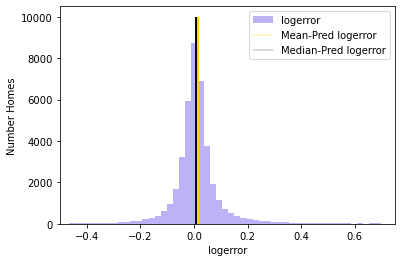

In [499]:
# plot to visualize actual vs predicted. 

plt.hist(y_train.logerror, color='mediumslateblue', bins=300, alpha=.5, label="logerror")
plt.vlines(y_train.logerror_baseline_mean, 0, 10000, color='gold', alpha=.3, label="Mean-Pred logerror")
plt.vlines(y_train.logerror_baseline_median, 0, 10000, color='black', alpha=.2, label="Median-Pred logerror")
plt.xlim(-0.5, 0.75)
plt.xlabel("logerror")
plt.ylabel("Number Homes")
plt.legend()
plt.show()

***I will move forward with the median as it is performing better.***

In [500]:
# 3. RMSE of logerror_pred_median
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_baseline_median) ** (0.5)
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_baseline_median) ** (0.5)

print(f"""
      BASELINE:
      RMSE using Median
      Train/In-Sample: {round(rmse_train, 2)}
      Validate/Out-of-Sample: {round(rmse_validate, 2)}
        """)


      BASELINE:
      RMSE using Median
      Train/In-Sample: 0.16
      Validate/Out-of-Sample: 0.17
        


In [507]:
from sklearn.metrics import explained_variance_score
metric_df = pd.DataFrame(data=[{
    'model': 'median_baseline',
    'RMSE_train': round(rmse_train, 6),    
    'RMSE_validate': round(rmse_validate, 6),
    'r^2_validate': explained_variance_score(y_validate.logerror, y_validate.logerror_baseline_median)}])

In [508]:
metric_df = metric_df.set_index("model")

In [509]:
metric_df

RMSE_train  RMSE_validate  r^2_validate
model                                                   
median_baseline    0.161888       0.170367           0.0

### • Train / Validate
#### Modeling: LinearRegression (OLS)

In [506]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train_scaled, y_train.logerror)

# predict train
y_train['logerror_pred_lm'] = lm.predict(X_train_scaled)

# evaluate: rmse
rmse_train_lm = mean_squared_error(y_train.logerror, y_train.logerror_pred_lm)**(0.5)

# predict validate
y_validate['logerror_pred_lm'] = lm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate_lm = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lm)**(0.5)

print(f"""
              BASELINE:
              
              RMSE using Median
              Train/In-Sample: {round(rmse_train, 6)}
              Validate/Out-of-Sample: {round(rmse_validate, 6)}

    RMSE for OLS using LinearRegression
    
    Training/In-Sample: {round(rmse_train_lm, 6)}
    Validation/Out-of-Sample: {round(rmse_validate_lm, 6)}
""")


              BASELINE:
              
              RMSE using Median
              Train/In-Sample: 0.161888
              Validate/Out-of-Sample: 0.170367

    RMSE for OLS using LinearRegression
    
    Training/In-Sample: 0.161205
    Validation/Out-of-Sample: 0.169811



In [510]:
metric_df = metric_df.append({
    'model': 'LinearRegression (OLS)',
    'RMSE_train': round(rmse_train_lm, 6),    
    'RMSE_validate': round(rmse_validate_lm, 6),
    'r^2_validate': explained_variance_score(y_validate.logerror, y_validate.logerror_pred_lm)}, ignore_index=True)
metric_df

RMSE_train  RMSE_validate  r^2_validate                   model
0    0.161888       0.170367      0.000000                     NaN
1    0.161205       0.169811      0.003689  LinearRegression (OLS)

#### LassoLars

In [512]:
# create the model object
# I will leave α as the defaulted 1 for now
# since DF has a small amt of features.
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train_scaled, y_train.logerror)

# predict train
y_train['logerror_pred_lars'] = lars.predict(X_train_scaled)

# evaluate: rmse
rmse_train_lars = mean_squared_error(y_train.logerror, y_train.logerror_pred_lars)**(0.5)

# predict validate
y_validate['logerror_pred_lars'] = lars.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate_lars = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lars)**(0.5)

print(f"""
              BASELINE:
              
              RMSE using Median
              Train/In-Sample: {round(rmse_train, 6)}
              Validate/Out-of-Sample: {round(rmse_validate, 6)}
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: {round(rmse_train_lm, 6)}
                Validation/Out-of-Sample: {round(rmse_validate_lm, 6)}

    RMSE for LassoLars
    
    Training/In-Sample: {round(rmse_train_lars, 6)}
    Validation/Out-of-Sample: {round(rmse_validate_lars, 6)}
""")


              BASELINE:
              
              RMSE using Median
              Train/In-Sample: 0.161888
              Validate/Out-of-Sample: 0.170367
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: 0.161205
                Validation/Out-of-Sample: 0.169811

    RMSE for LassoLars
    
    Training/In-Sample: 0.161596
    Validation/Out-of-Sample: 0.170125



#### TweedieRegressor (GLM)

In [513]:
# create the model object

glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train_scaled, y_train.logerror)

# predict train
y_train['logerror_pred_glm'] = glm.predict(X_train_scaled)

# evaluate: rmse
rmse_train_glm = mean_squared_error(y_train.logerror, y_train.logerror_pred_glm)**(0.5)

# predict validate
y_validate['logerror_pred_glm'] = glm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate_glm = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_glm)**(0.5)

print(f"""
              BASELINE:
              
              RMSE using Median
              Train/In-Sample: {round(rmse_train, 6)}
              Validate/Out-of-Sample: {round(rmse_validate, 6)}
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: {round(rmse_train_lm, 6)}
                Validation/Out-of-Sample: {round(rmse_validate_lm, 6)}

                RMSE for LassoLars
                
                Training/In-Sample: {round(rmse_train_lars, 6)}
                Validation/Out-of-Sample: {round(rmse_validate_lars, 6)}
    
    RMSE for TweedieRegressor (GLM)
    power=1, alpha=0
    
    Training/In-Sample: {round(rmse_train_glm, 6)}
    Validation/Out-of-Sample: {round(rmse_validate_glm, 6)}
""")


ValueError: Some value(s) of y are out of the valid range for family TweedieDistribution

#### PolynomialFeatures

In [514]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train_scaled)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate_scaled)
X_test_degree2 = pf.transform(X_test_scaled)

In [515]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.logerror)

# predict train
y_train['logerror_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train_lm2 = mean_squared_error(y_train.logerror, y_train.logerror_pred_lm2)**(0.5)

# predict validate
y_validate['logerror_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate_lm2 = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lm2)**(0.5)

print(f"""
              BASELINE:
              
              RMSE using Median
              Train/In-Sample: {round(rmse_train, 6)}
              Validate/Out-of-Sample: {round(rmse_validate, 6)}
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: {round(rmse_train_lm, 6)}
                Validation/Out-of-Sample: {round(rmse_validate_lm, 6)}

                RMSE for LassoLars
                
                Training/In-Sample: {round(rmse_train_lars, 6)}
                Validation/Out-of-Sample: {round(rmse_validate_lars, 6)}

                
    
    RMSE for Polynomial Regressor
    degrees=2
    
    Training/In-Sample: {round(rmse_train_lm2, 6)}
    Validation/Out-of-Sample: {round(rmse_validate_lm2, 6)}
""")


              BASELINE:
              
              RMSE using Median
              Train/In-Sample: 0.161888
              Validate/Out-of-Sample: 0.170367
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: 0.161205
                Validation/Out-of-Sample: 0.169811

                RMSE for LassoLars
                
                Training/In-Sample: 0.161596
                Validation/Out-of-Sample: 0.170125

                
    
    RMSE for Polynomial Regressor
    degrees=2
    
    Training/In-Sample: 0.159904
    Validation/Out-of-Sample: 1355312506254.8513



#### Cubic function

In [519]:
# make the polynomial features to get a new set of features
pf3 = PolynomialFeatures(degree=3)

# fit and transform X_train_scaled
X_train_degree3 = pf3.fit_transform(X_train_scaled)

# transform X_validate_scaled & X_test_scaled
X_validate_degree3 = pf3.transform(X_validate_scaled)
X_test_degree3 = pf3.transform(X_test_scaled)

In [520]:
# create the model object
lm3 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm3.fit(X_train_degree3, y_train.logerror)

# predict train
y_train['logerror_pred_lm3'] = lm3.predict(X_train_degree3)

# evaluate: rmse
rmse_train_lm3 = mean_squared_error(y_train.logerror, y_train.logerror_pred_lm3)**(0.5)

# predict validate
y_validate['logerror_pred_lm3'] = lm3.predict(X_validate_degree3)

# evaluate: rmse
rmse_validate_lm3 = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lm3)**(0.5)

print(f"""
              BASELINE:
              
              RMSE using Median
              Train/In-Sample: {round(rmse_train, 6)}
              Validate/Out-of-Sample: {round(rmse_validate, 6)}
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: {round(rmse_train_lm, 6)}
                Validation/Out-of-Sample: {round(rmse_validate_lm, 6)}

                RMSE for LassoLars
                
                Training/In-Sample: {round(rmse_train_lars, 6)}
                Validation/Out-of-Sample: {round(rmse_validate_lars, 6)}

                RMSE for Polynomial Regressor
                degrees=2
        
                Training/In-Sample: {round(rmse_train_lm2, 6)}
                Validation/Out-of-Sample: {round(rmse_validate_lm2, 6)}
                
    RMSE for Polynomial Regressor
    degrees=3
    
    Training/In-Sample: {round(rmse_train_lm3, 6)}
    Validation/Out-of-Sample: {round(rmse_validate_lm3, 6)}              
""")


              BASELINE:
              
              RMSE using Median
              Train/In-Sample: 0.161888
              Validate/Out-of-Sample: 0.170367
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: 0.161205
                Validation/Out-of-Sample: 0.169811

                RMSE for LassoLars
                
                Training/In-Sample: 0.161596
                Validation/Out-of-Sample: 0.170125

                RMSE for Polynomial Regressor
                degrees=2
        
                Training/In-Sample: 0.159904
                Validation/Out-of-Sample: 1355312506254.8513
                
    RMSE for Polynomial Regressor
    degrees=3
    
    Training/In-Sample: 0.153904
    Validation/Out-of-Sample: 374197147885.60895              



In [518]:
df.head(2)

bathrooms  bedrooms  property_quality    sqft  fips    latitude  \
parcelid                                                                    
10711855        2.0         3                 8  2107.0  6037  34222559.0   
10711877        2.0         4                 8  1882.0  6037  34220261.0   

            longitude  lot_sqft  rawcensustractandblock  regionidcity  ...  \
parcelid                                                               ...   
10711855 -118617387.0    9158.0            6.037113e+07       12447.0  ...   
10711877 -118616409.0    9035.0            6.037113e+07       12447.0  ...   

          old_smhome  young_avghome  veteran_avghome  lghome  smlot_smhome  \
parcelid                                                                     
10711855           0              0                0       1             0   
10711877           0              0                0       1             0   

          smlot_avghome  smlot_lghome  mdlot  lglot xllot  
parcelid                                                   
10711855              1             0      0      0     0  
10711877              1             0      0      0     0  

[2 rows x 37 columns]

## Test on out-of-sample 

In [521]:
y_test = pd.DataFrame(y_test)

#predict on test
y_test['logerror_pred_lm'] = lm.predict(X_test_scaled)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.logerror, y_test.logerror_pred_lm)**(0.5)

print(f"""
    RMSE for OLS using LinearRegression
    
    Test/Out-of-Sample Performance: {rmse_test}
""")


    RMSE for OLS using LinearRegression
    
    Test/Out-of-Sample Performance: 0.16384543303712926



In [522]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71818 entries, 10711855 to 162960814
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   bathrooms               71818 non-null  float64 
 1   bedrooms                71818 non-null  int64   
 2   property_quality        71818 non-null  int64   
 3   sqft                    71818 non-null  float64 
 4   fips                    71818 non-null  int64   
 5   latitude                71818 non-null  float64 
 6   longitude               71818 non-null  float64 
 7   lot_sqft                71818 non-null  float64 
 8   rawcensustractandblock  71818 non-null  float64 
 9   regionidcity            71818 non-null  float64 
 10  zip_code                71818 non-null  int64   
 11  roomcnt                 71818 non-null  int64   
 12  unitcnt                 71818 non-null  int64   
 13  yearbuilt               71818 non-null  int64   
 14  structure_v